In [29]:
import os
import numpy as np
import pandas as pd
import OpenEXR
import Imath
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import norm, beta, arcsine, alpha, johnsonsb, t

# dictionary of noise types and params
noise_types = {
    'blistered': ['norm', 0.5, 0.12621],
    'box': ['norm', 0.5, 0.146],
    'buya': ['johnsonsb', 1.671, 0.536, 0.0, 1.017],
    'cell': [None],
    'cell_voronoi': ['norm', 0.5, 1.39],
    'cranal': ['beta', 22.88, 13.87, 0.0, 0.95],
    'dents': ['arcsine', -0.08, 0.83],
    'displaced_turbulence': ['norm', 0.5, 0.05],
    'displaced_voronoi': ['beta', 7.1, 4.98, -0.1, 1.18],
    'electric': ['beta', 2.7, 20.59, 0.0, 2.17],
    'fbm': ['norm', 0.5, 0.11],
    'fire': ['alpha', 0.0, -0.0055, 0.008],
    'gaseous': ['beta', 3.33, 6.41, 0.01, 0.97],
    'hama': ['johnsonsb', 1.373, 0.485, 0.0, 0.987],
    'luka': ['norm', 0.36, 0.152],
    'mod': ['norm', 0.5, 0.14],
    'naki': ['beta', 2.509, 3.483, 0.13, 0.77],
    'noise': ['norm', 0.5, 0.15],
    'nutous': ['johnsonsb', 1.482, 0.774, -0.001, 1.008],
    'ober': ['alpha', 5.041, -0.487, 3.523],
    'pezo': ['alpha', 3.132, 0.033, 0.293],
    'poxo': ['alpha', 3.515, -0.112, 0.943],
    'ridged_multi_fractal': ['beta', 0.704, 7313.088, 0.00, 509.664],
    'sema': ['t', 0.396, 0.025, 0.003],
    'sparse_convolution': ['norm', 0.5, 0.11],
    'stupl': ['norm', 0.5, 0.12],
    'turbulence': ['norm', 0.5, 0.1],
    'vl': ['norm', 0.5, 0.14],
    'voronoi1': ['norm', 0.576, 0.149],
    'voronoi2': ['norm', 0.716, 0.128],
    'voronoi3': ['beta', 1.1, 10.372, 0.00, 1.456],
    'wavy_turbulence': ['norm', 0.48, 0.13],
    'zada': ['t', 3.202, 0.616, 0.1],
}

common_thresholds = [0.1, 0.125, 0.2, 0.25, 0.3333, 0.4, 0.5, 0.6, 0.6667, 0.75, 0.8, 0.875, 0.9]
common_noises = ["fbm", "luka", "naki"]

def find_x(key: str , y: float) -> float:
    params = noise_types[key]
    dist_type = params[0]
    
    if dist_type == 'norm':
        loc = params[1]
        scale = params[2]
        x = norm.ppf(y , loc=loc , scale=scale)
        
    elif dist_type == 'beta':
        a = params[1]
        b = params[2]
        loc = params[3]
        scale = params[4]
        x = beta.ppf(y , a=a , b=b , loc=loc , scale=scale)
        
    elif dist_type == 'arcsine':
        loc = params[1]
        scale = params[2]
        x = arcsine.ppf(y , loc=loc , scale=scale)
        
    elif dist_type == 'alpha':
        a = params[1]
        loc = params[2]
        scale = params[3]
        x = alpha.ppf(y , a=a , loc=loc , scale=scale)
        
    elif dist_type == 'johnsonsb':
        a = params[1]
        b = params[2]
        loc = params[3]
        scale = params[4]
        x = johnsonsb.ppf(y , a=a , b=b , loc=loc , scale=scale)
        
    elif dist_type == 't':
        df = params[1]
        loc = params[2]
        scale = params[3]
        x = t.ppf(y , df=df , loc=loc , scale=scale)
        
    else:
        raise ValueError(f"Unsupported distribution type: {dist_type}")
    
    return x

def display_df(df: pd.DataFrame, title: str) -> None:
    pd.set_option('display.precision', 3)
    df = df.copy()
    df.columns = [f"{x:.3f}" for x in df.columns]
    display(df.style.set_caption(title).format("{:.3f}"))

In [30]:
THRESHOLDS =     [0.8]
NOISE_TYPES =   ["fbm"]

df = pd.DataFrame(columns=THRESHOLDS, index=NOISE_TYPES)
for noise_type in NOISE_TYPES:
    for threshold in THRESHOLDS:
        df.loc[noise_type, threshold] = find_x(noise_type, threshold)
display_df(df, "Threshold Values")

df_common = pd.DataFrame(columns=common_thresholds, index=common_noises)
for noise_type in common_noises:
    for threshold in common_thresholds:
        df_common.loc[noise_type, threshold] = find_x(noise_type, threshold)
display_df(df_common, "Common Threshold Values")

---
# Maxon Noise Value Distributions

name score     loc   scale                                       arg   
0          t 4.406   0.492   0.112                      (7.359453097050798,)  \
1      alpha 7.579  -3.617 128.432                     (31.272400382497676,)   
2  johnsonsb 8.132 -20.310  77.716  (118.12812205646287, 117.37539251692786)   
3       beta 8.180 -32.477 192.379   (53467.71310798568, 258514.58350458494)   
4       norm 8.237   0.493   0.130                                        ()   

                                                                             params   
0                     (7.359453097050798, 0.49150772072192117, 0.11153836074285996)  \
1                     (31.272400382497676, -3.6172273228169254, 128.43196291198797)   
2  (118.12812205646287, 117.37539251692786, -20.309963663719728, 77.71553728024185)   
3   (53467.71310798568, 258514.58350458494, -32.47665920463948, 192.37904166822238)   
4                                         (0.4933776793870109, 0.12979714378331927)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62636CD0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5BFED250>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64B13FD0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6571F340>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CF0310>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

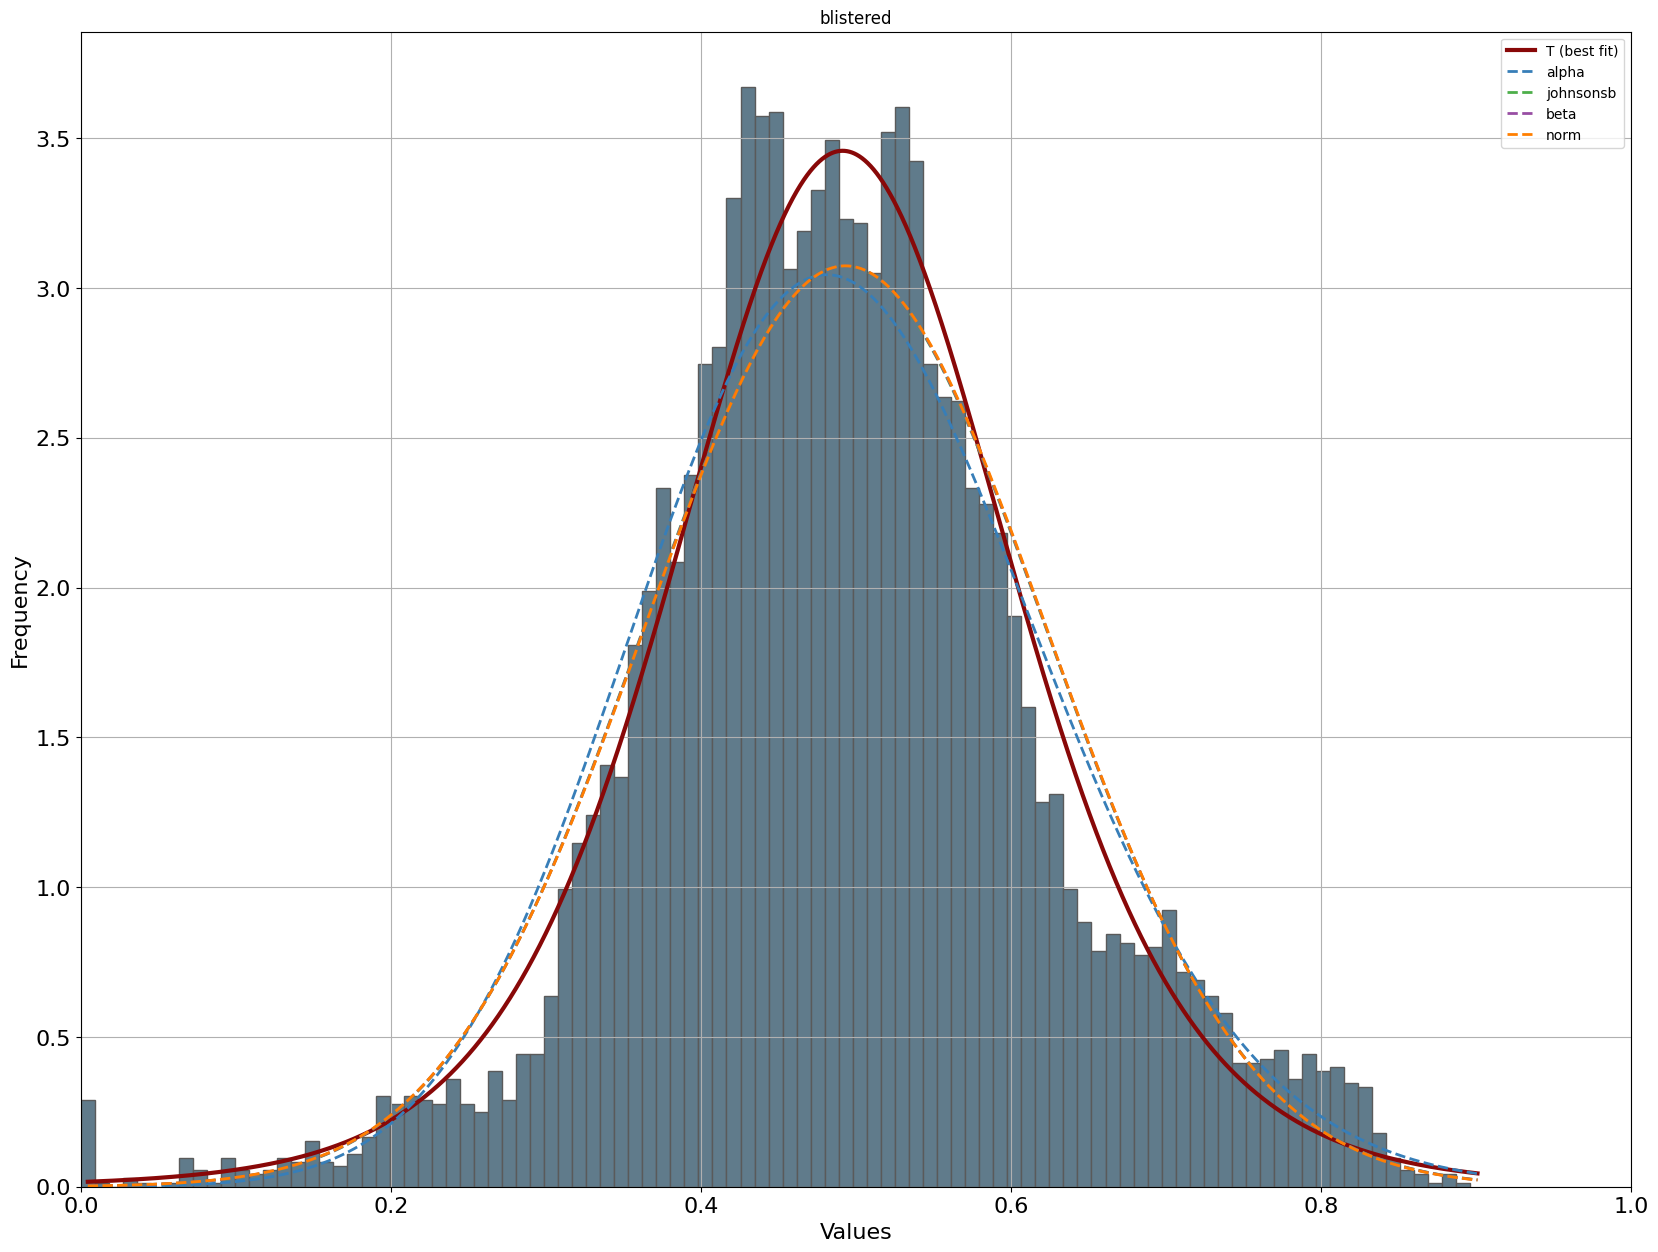

name  score    loc   scale                                        arg   
0  johnsonsb 16.343 -0.101   0.988  (-0.6233401260267287, 1.4942849179229907)  \
1       beta 16.764 -0.102   0.958    (5.691131586342298, 3.5848465582623237)   
2       norm 22.434  0.486   0.146                                         ()   
3          t 22.437  0.486   0.146                       (9125634.054862719,)   
4      alpha 26.738 -4.248 152.820                      (32.309707273736535,)   

                                                                                params   
0  (-0.6233401260267287, 1.4942849179229907, -0.10059651556769388, 0.9876968873963148)  \
1    (5.691131586342298, 3.5848465582623237, -0.10244686021675037, 0.9584441714204515)   
2                                            (0.48597445358801633, 0.1463851104938223)   
3                         (9125634.054862719, 0.4859636900443167, 0.14638118410563267)   
4                         (32.309707273736535, -4.248255974549551, 152.82031307737054)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68058760>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5BEBDA30>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5B5FEF40>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ACADAC0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5F572D90>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

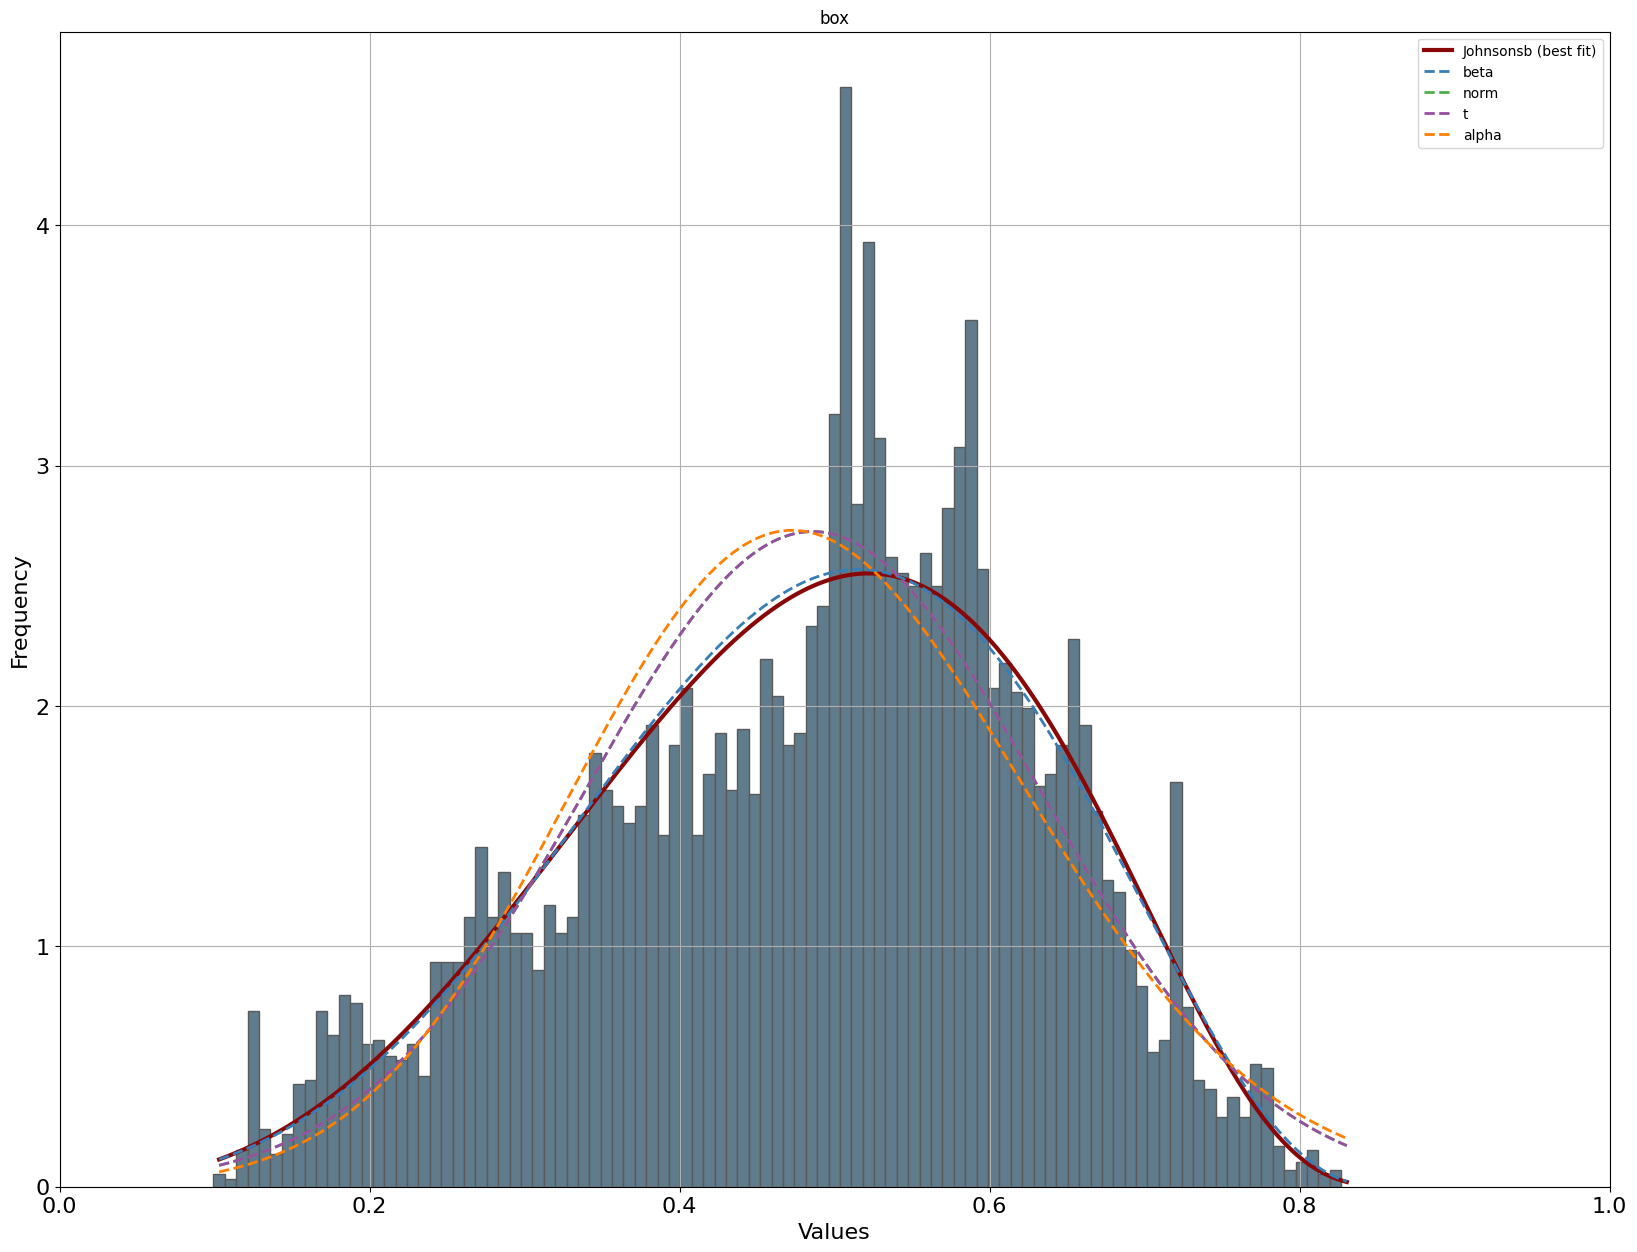

name   score    loc scale                                       arg   
0  johnsonsb  12.528  0.000 1.018  (1.6709589066006614, 0.5360161155278362)  \
1       beta  62.086  0.000 5.926  (0.5794397938338582, 30.096561543580954)   
2      alpha 127.429 -0.018 0.038                  (6.938276422765513e-07,)   
3          t 360.887  0.038 0.043                      (1.153944653843372,)   
4    arcsine 524.203  0.000 1.000                                        ()   

                                                                                params   
0  (1.6709589066006614, 0.5360161155278362, 9.248371828910016e-05, 1.0178305455886498)  \
1  (0.5794397938338582, 30.096561543580954, 0.00012877235712949184, 5.926149201378681)   
2                 (6.938276422765513e-07, -0.017531221027886422, 0.038143183848590265)   
3                        (1.153944653843372, 0.03767930303603716, 0.04292250832043329)   
4                                         (0.00012877235712949184, 1.0002516874933955)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F689FEEE0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69B20640>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62CDC9A0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62C2D8E0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69B20820>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

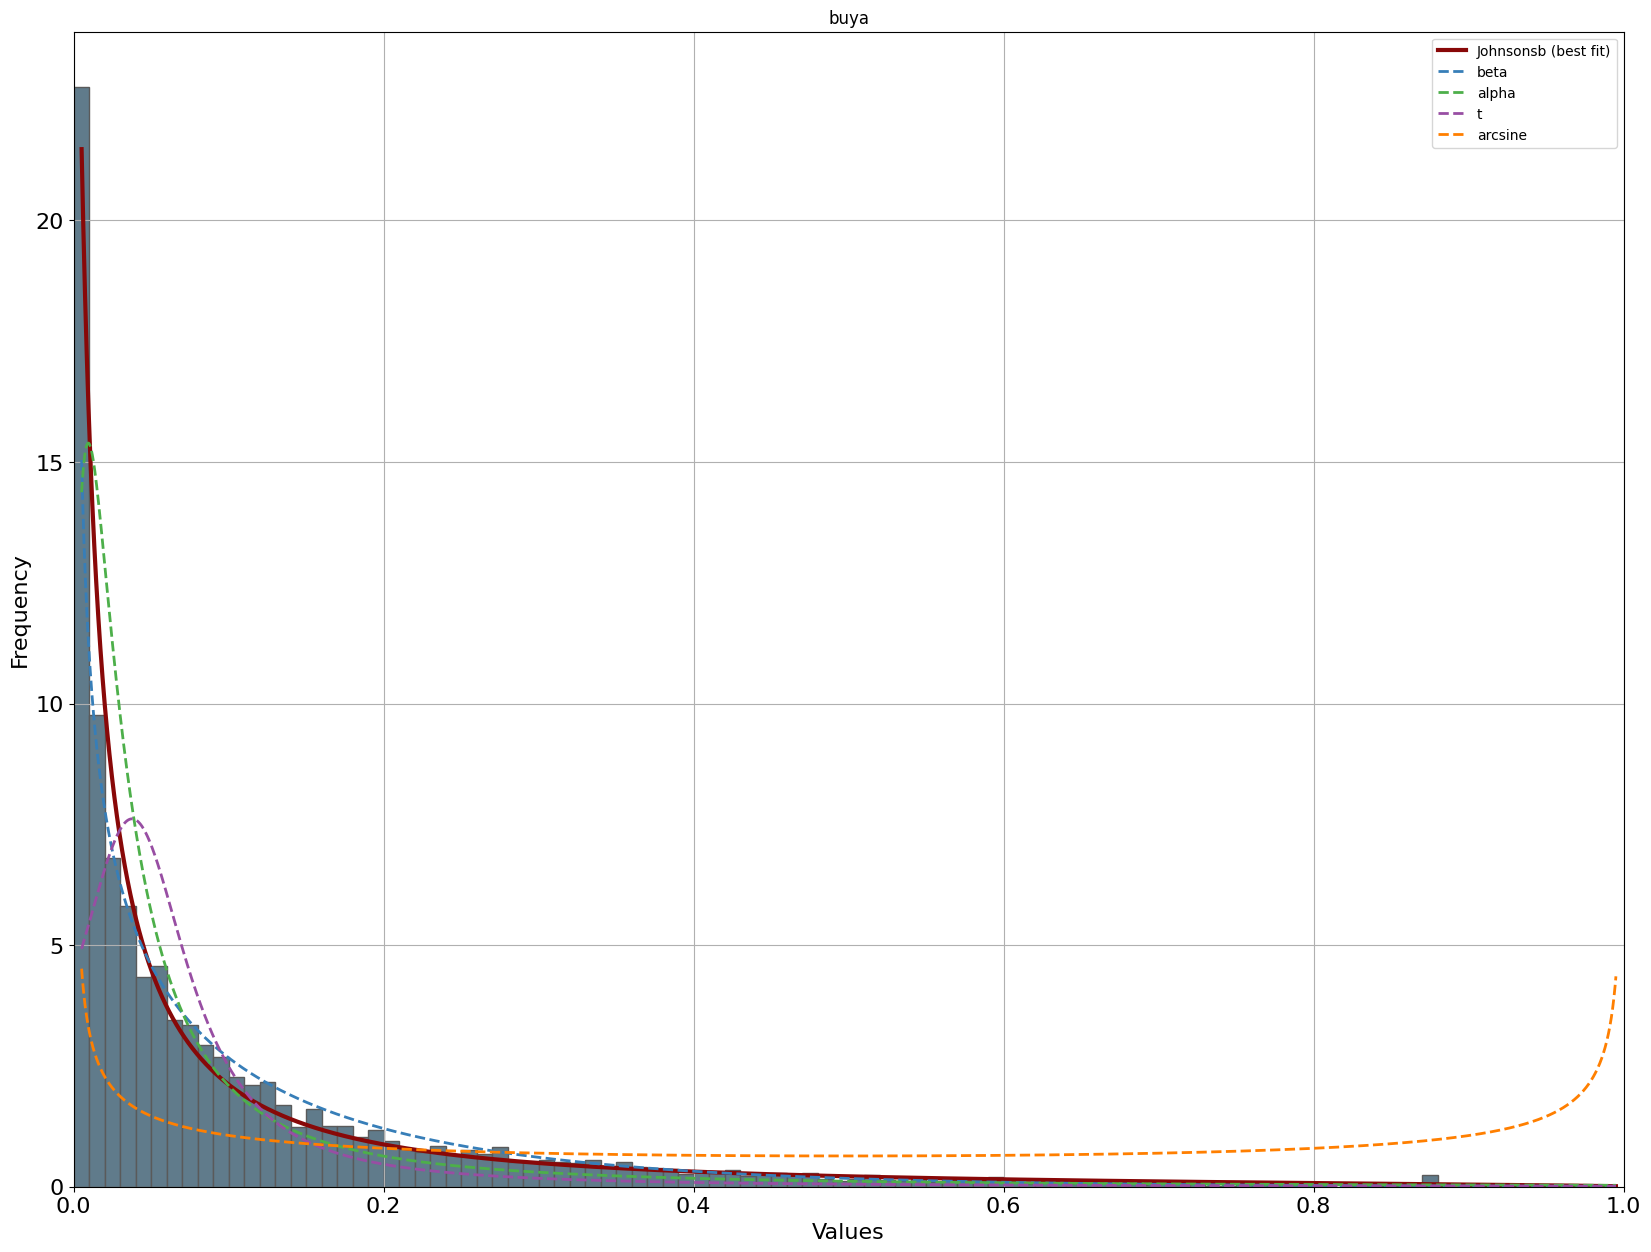

name   score    loc  scale                                        arg   
0      alpha 116.558 -2.166 48.666                      (18.404366715382835,)  \
1       norm 116.661  0.487  0.145                                         ()   
2          t 116.662  0.487  0.145                       (6243196.354016287,)   
3  johnsonsb 119.927  0.134  0.836  (0.44253953569688376, 1.2271032168241307)   
4       beta 121.193  0.189  0.728    (1.9853531078156392, 2.881025161059492)   

                                                                               params   
0                        (18.404366715382835, -2.165657221056474, 48.666112809035525)  \
1                                            (0.486729713505134, 0.14480396437837129)   
2                        (6243196.354016287, 0.4867354230781797, 0.14480460643707266)   
3  (0.44253953569688376, 1.2271032168241307, 0.13392608474133907, 0.8357773443846324)   
4     (1.9853531078156392, 2.881025161059492, 0.1889999251593249, 0.7278817192329282)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65761FD0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64AF8940>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5FB18CA0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F632F76D0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65761700>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

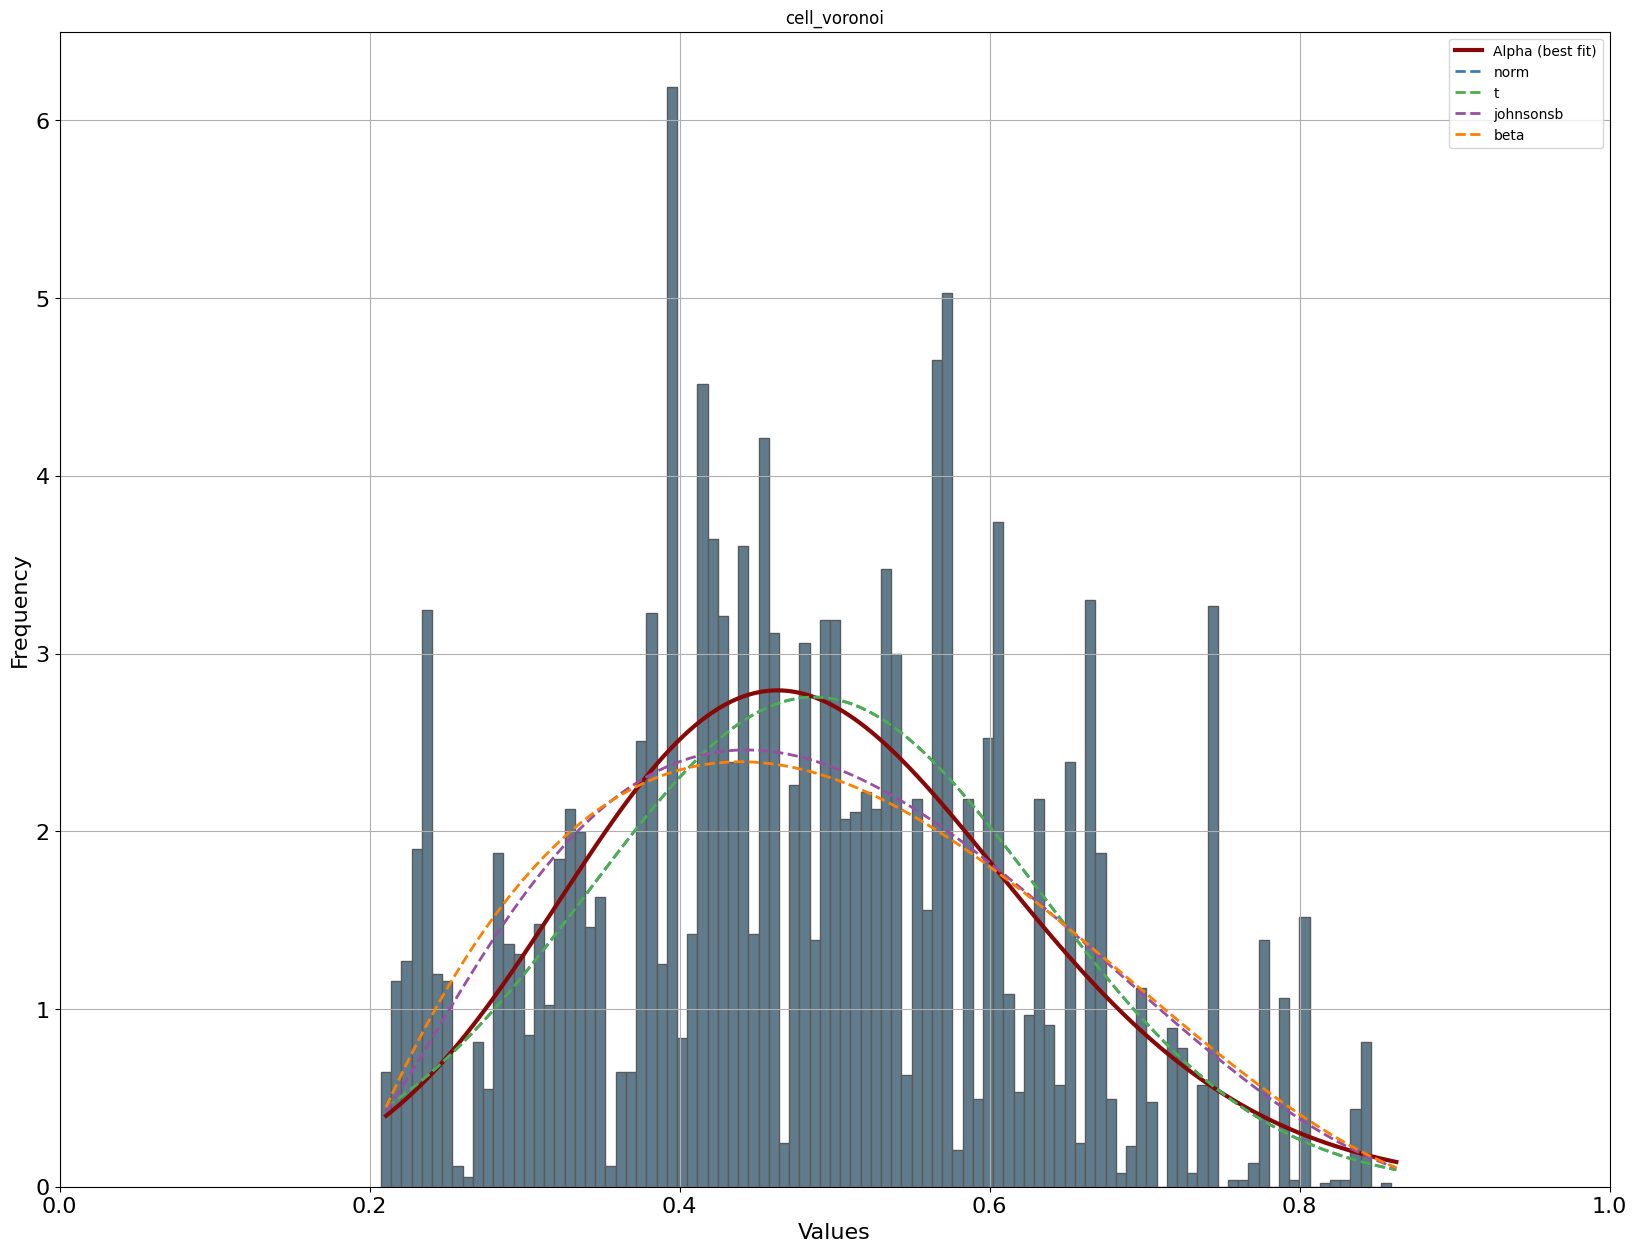

name  score    loc  scale                                        arg   
0  johnsonsb  9.613  0.182  0.722  (-0.3449739886932367, 2.1500590962244517)  \
1       beta  9.629  0.220  0.637      (8.185908357667076, 6.72956792439359)   
2       norm 11.486  0.570  0.079                                         ()   
3          t 11.488  0.570  0.079                       (5536208.736223213,)   
4      alpha 13.176 -1.691 63.935                      (28.307788366571913,)   

                                                                               params   
0  (-0.3449739886932367, 2.1500590962244517, 0.18175485655472656, 0.7217362349405021)  \
1       (8.185908357667076, 6.72956792439359, 0.22049336660256308, 0.637040774801686)   
2                                           (0.5700903764776886, 0.07941232862663748)   
3                        (5536208.736223213, 0.5700957527242501, 0.07940839890841422)   
4                        (28.307788366571913, -1.6912655222564172, 63.93507839340785)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F630D1850>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D68040>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6410B580>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5B399610>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62C2D6D0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

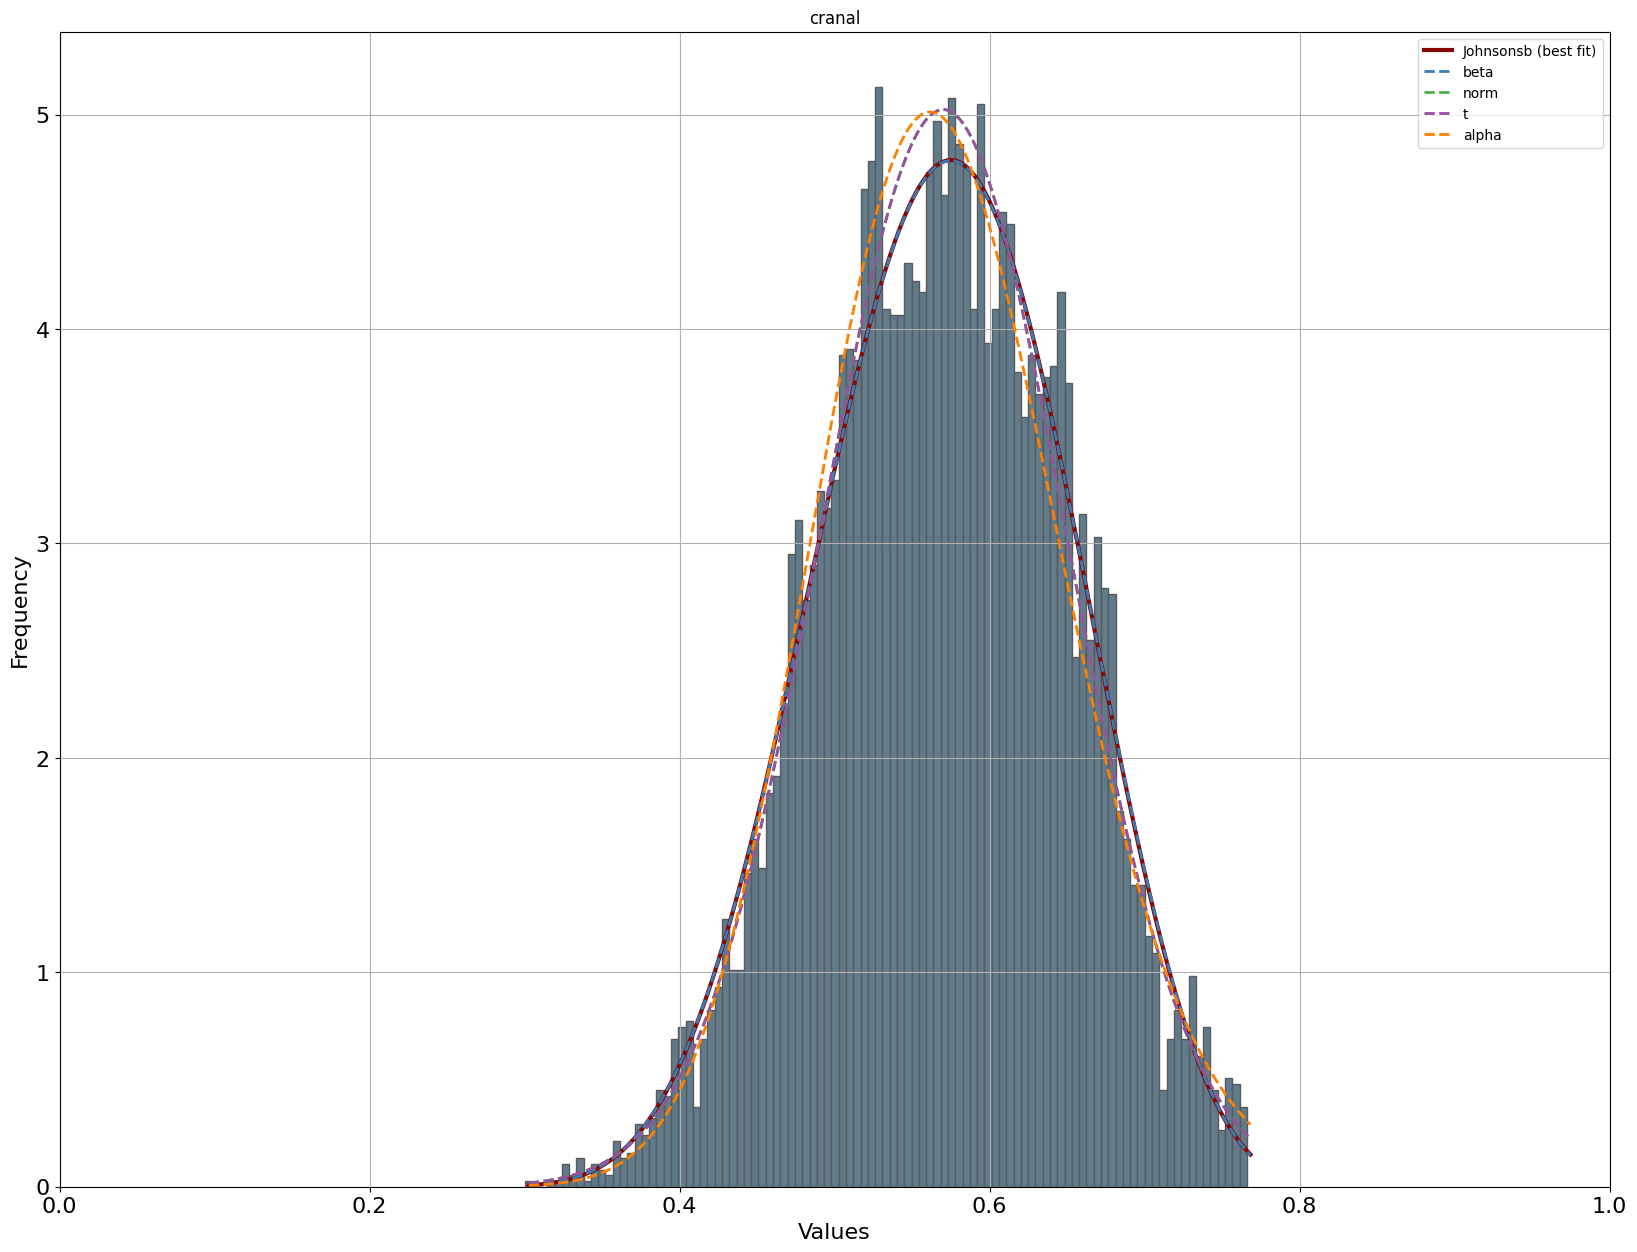

name   score    loc scale                                        arg   
0    arcsine 132.469 -0.082 0.832                                         ()  \
1  johnsonsb 155.530 -0.001 0.751  (-0.2422677371647649, 0.1197209086805905)   
2       beta 176.668 -0.044 0.794    (1.070797951170534, 0.8031334817113019)   
3      alpha 207.811 -1.126 9.410                       (6.539777749132387,)   
4       norm 216.188  0.348 0.232                                         ()   

                                                                                  params   
0                                             (-0.08154410925545776, 0.8315559109751234)  \
1  (-0.2422677371647649, 0.1197209086805905, -0.0009893641820412158, 0.7510011659017068)   
2      (1.070797951170534, 0.8031334817113019, -0.04369675692747815, 0.7937085586471438)   
3                            (6.539777749132387, -1.1260426993636146, 9.409701190222627)   
4                                              (0.3479260302965025, 0.23191679289790115)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F688ED760>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F688EDC70>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F689C31C0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F689EF940>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A838A60>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

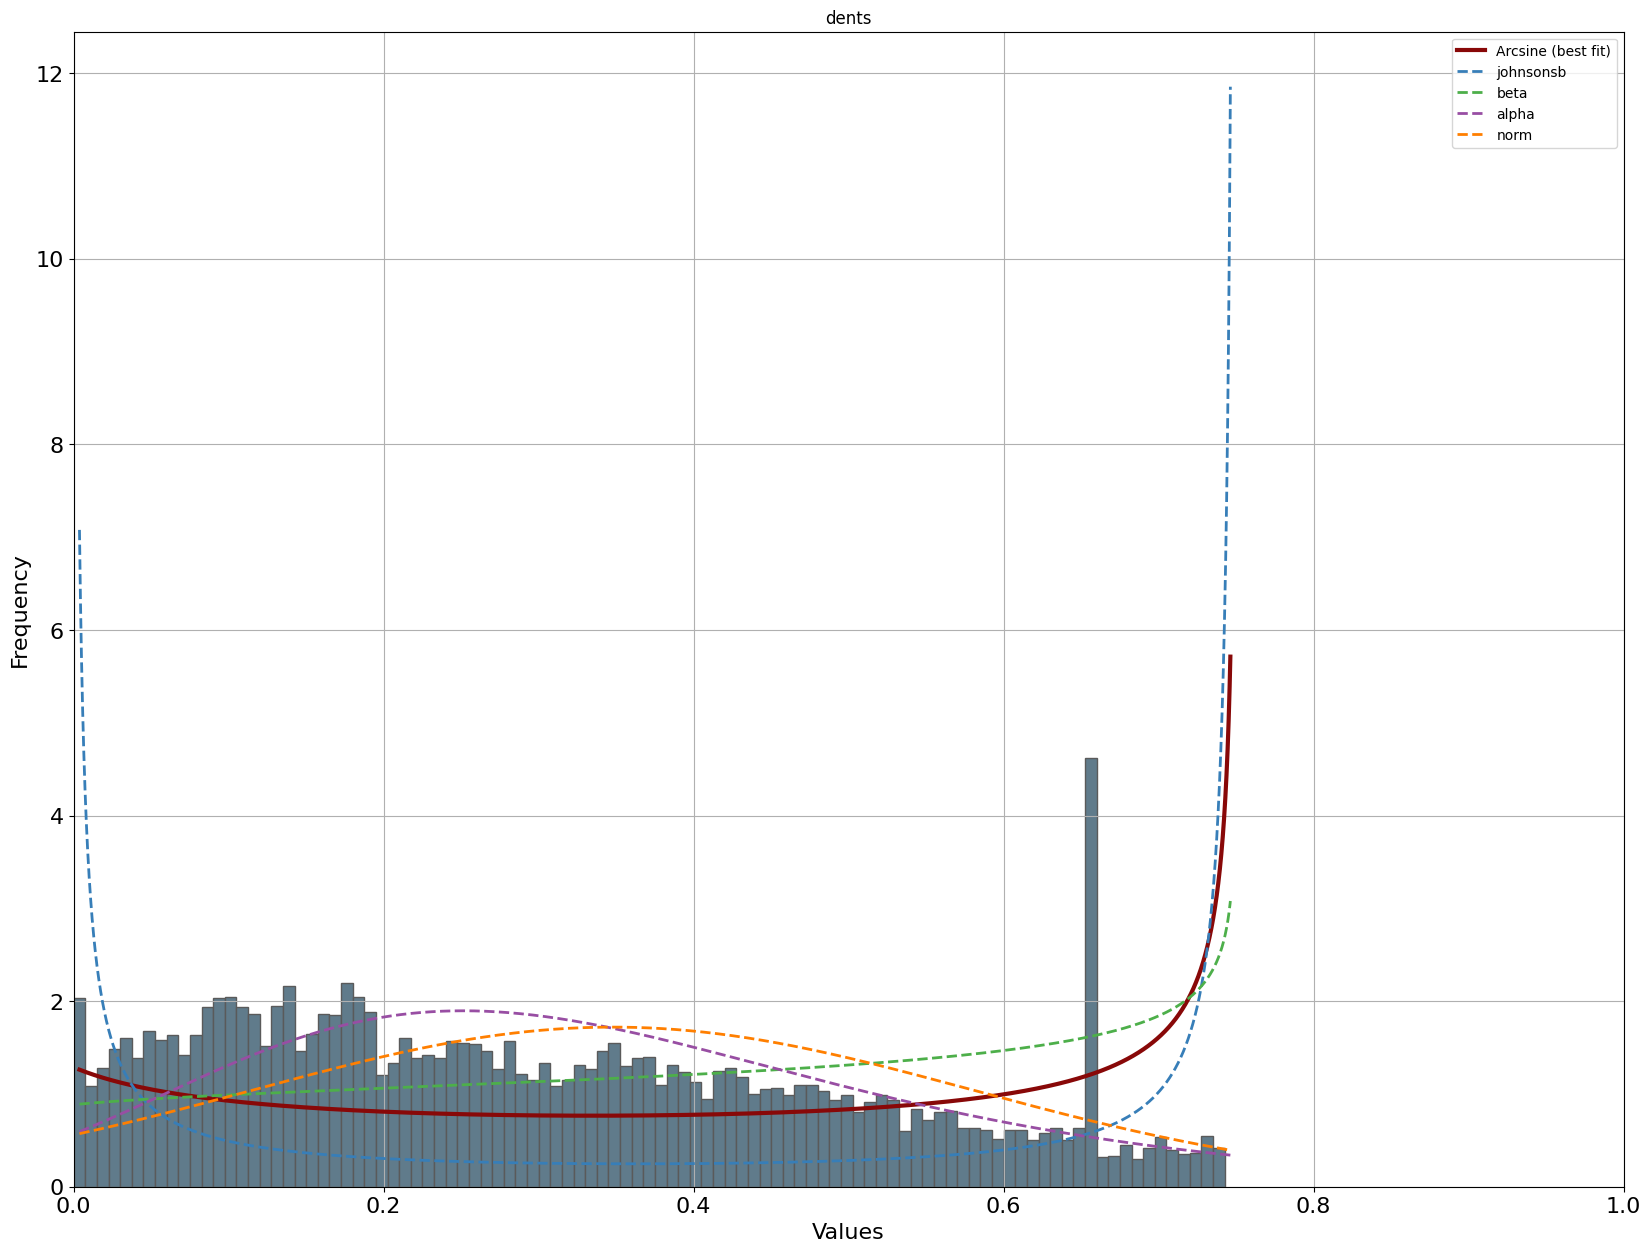

name  score    loc  scale                                     arg   
0      alpha 20.609 -1.085 43.559                    (27.72620632611985,)  \
1       beta 21.366 -0.089  1.653  (67.27785535328479, 125.2278202796174)   
2  johnsonsb 21.372 -0.175  1.696   (3.149256244045471, 7.09610127077627)   
3       norm 23.265  0.489  0.057                                      ()   
4          t 23.267  0.489  0.057                     (1566047.03071192,)   

                                                                             params   
0                       (27.72620632611985, -1.0845129392257578, 43.55881483578918)  \
1  (67.27785535328479, 125.2278202796174, -0.08895553372140798, 1.6534927833878257)   
2    (3.149256244045471, 7.09610127077627, -0.17480781957650568, 1.695996390348797)   
3                                        (0.48891537692397835, 0.05667759263387002)   
4                      (1566047.03071192, 0.4889176510707144, 0.056678596565576944)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64B08F10>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69CCB460>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69CCBDC0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F689CC7C0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D50250>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

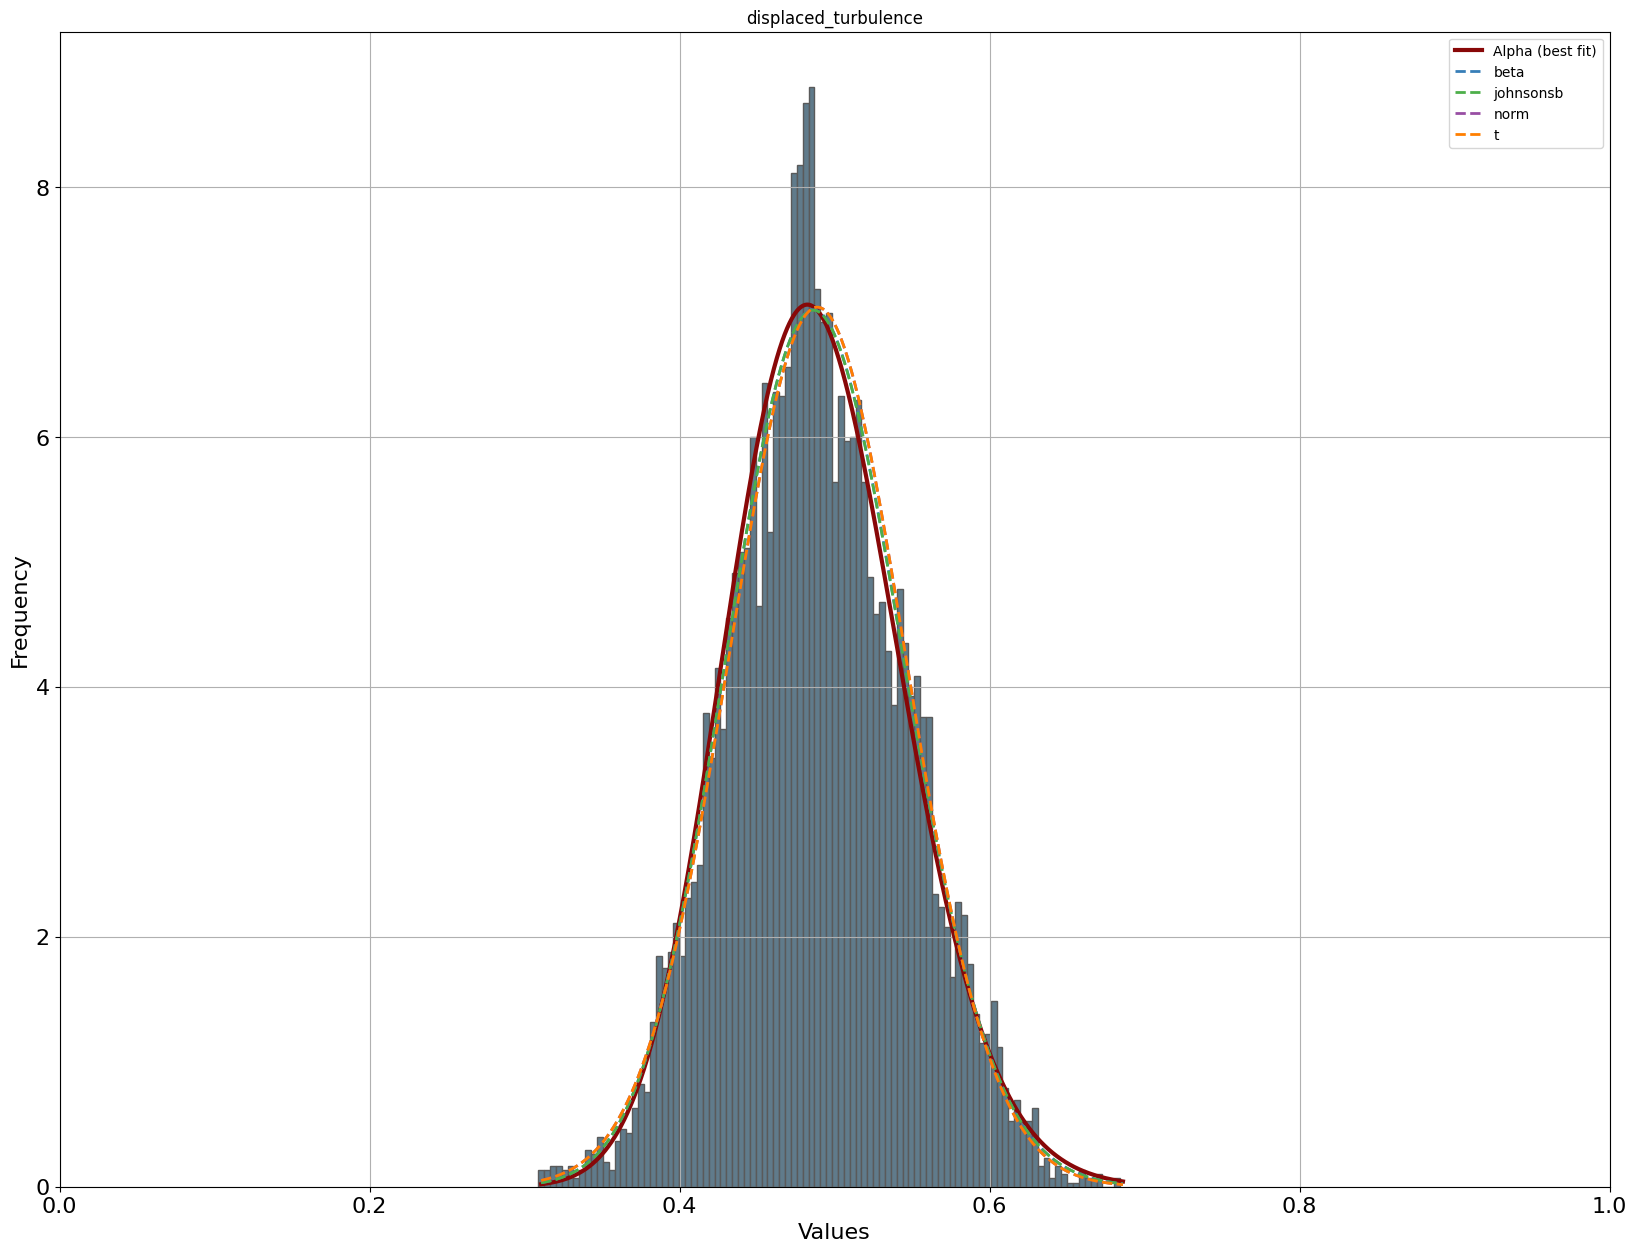

name score    loc   scale                                       arg   
0          t 3.749  0.573   0.147                      (2660078.365339879,)  \
1       norm 3.749  0.573   0.147                                        ()   
2  johnsonsb 4.221 -0.783   2.397  (-1.058700718103465, 3.9389253111203884)   
3       beta 4.274 -0.587   1.998   (25.44240500776875, 18.372352375630857)   
4      alpha 4.647 -3.626 118.884                     (28.357916360859747,)   

                                                                             params   
0                      (2660078.365339879, 0.5728871390310284, 0.14725398309416568)  \
1                                         (0.5728894722443074, 0.14725706174027783)   
2  (-1.058700718103465, 3.9389253111203884, -0.7834795870076465, 2.397397158808572)   
3  (25.44240500776875, 18.372352375630857, -0.5874545079356698, 1.9982514459254959)   
4                     (28.357916360859747, -3.6258415924833285, 118.88439482052394)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62DDEEE0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6346DA00>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F660F4E20>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62E7FAC0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62E55520>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

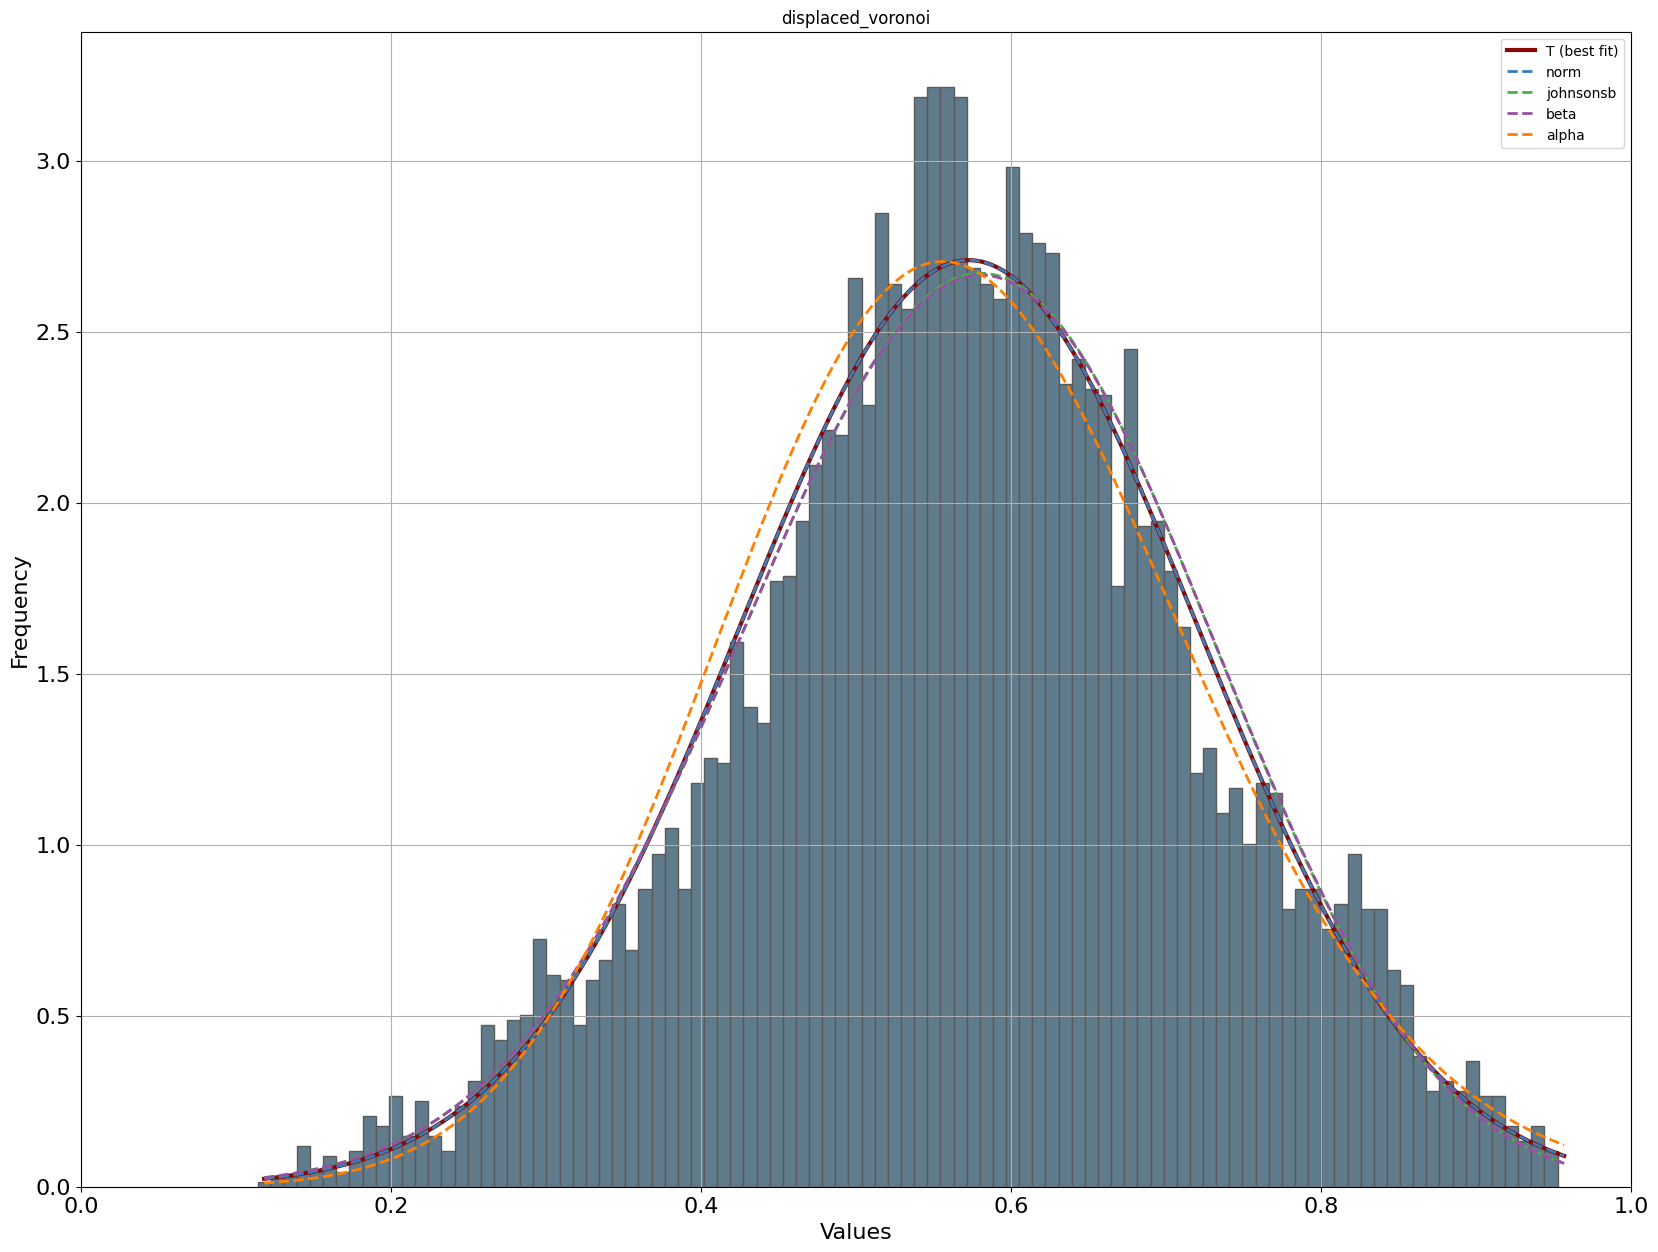

name  score   loc scale                                       arg   
0  johnsonsb 28.658 0.019 0.803  (0.8222549602861151, 0.9352047361892335)  \
1       beta 30.794 0.023 0.973    (1.731699293623195, 4.739623187447684)   
2       norm 55.500 0.282 0.162                                        ()   
3          t 55.503 0.282 0.162                      (3587838.415036913,)   
4      alpha 61.195 0.002 0.146                 (1.3071764657602828e-07,)   

                                                                               params   
0  (0.8222549602861151, 0.9352047361892335, 0.019026395643780752, 0.8029638564429549)  \
1     (1.731699293623195, 4.739623187447684, 0.02256547868592384, 0.9729866943137233)   
2                                           (0.28189762342511676, 0.1618163657829858)   
3                         (3587838.415036913, 0.2819051356354317, 0.1618225873926412)   
4                (1.3071764657602828e-07, 0.0020318159312324585, 0.14591993781236232)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62DC9FA0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62DC9F10>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62FE90A0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64C5A160>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64C5A1F0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

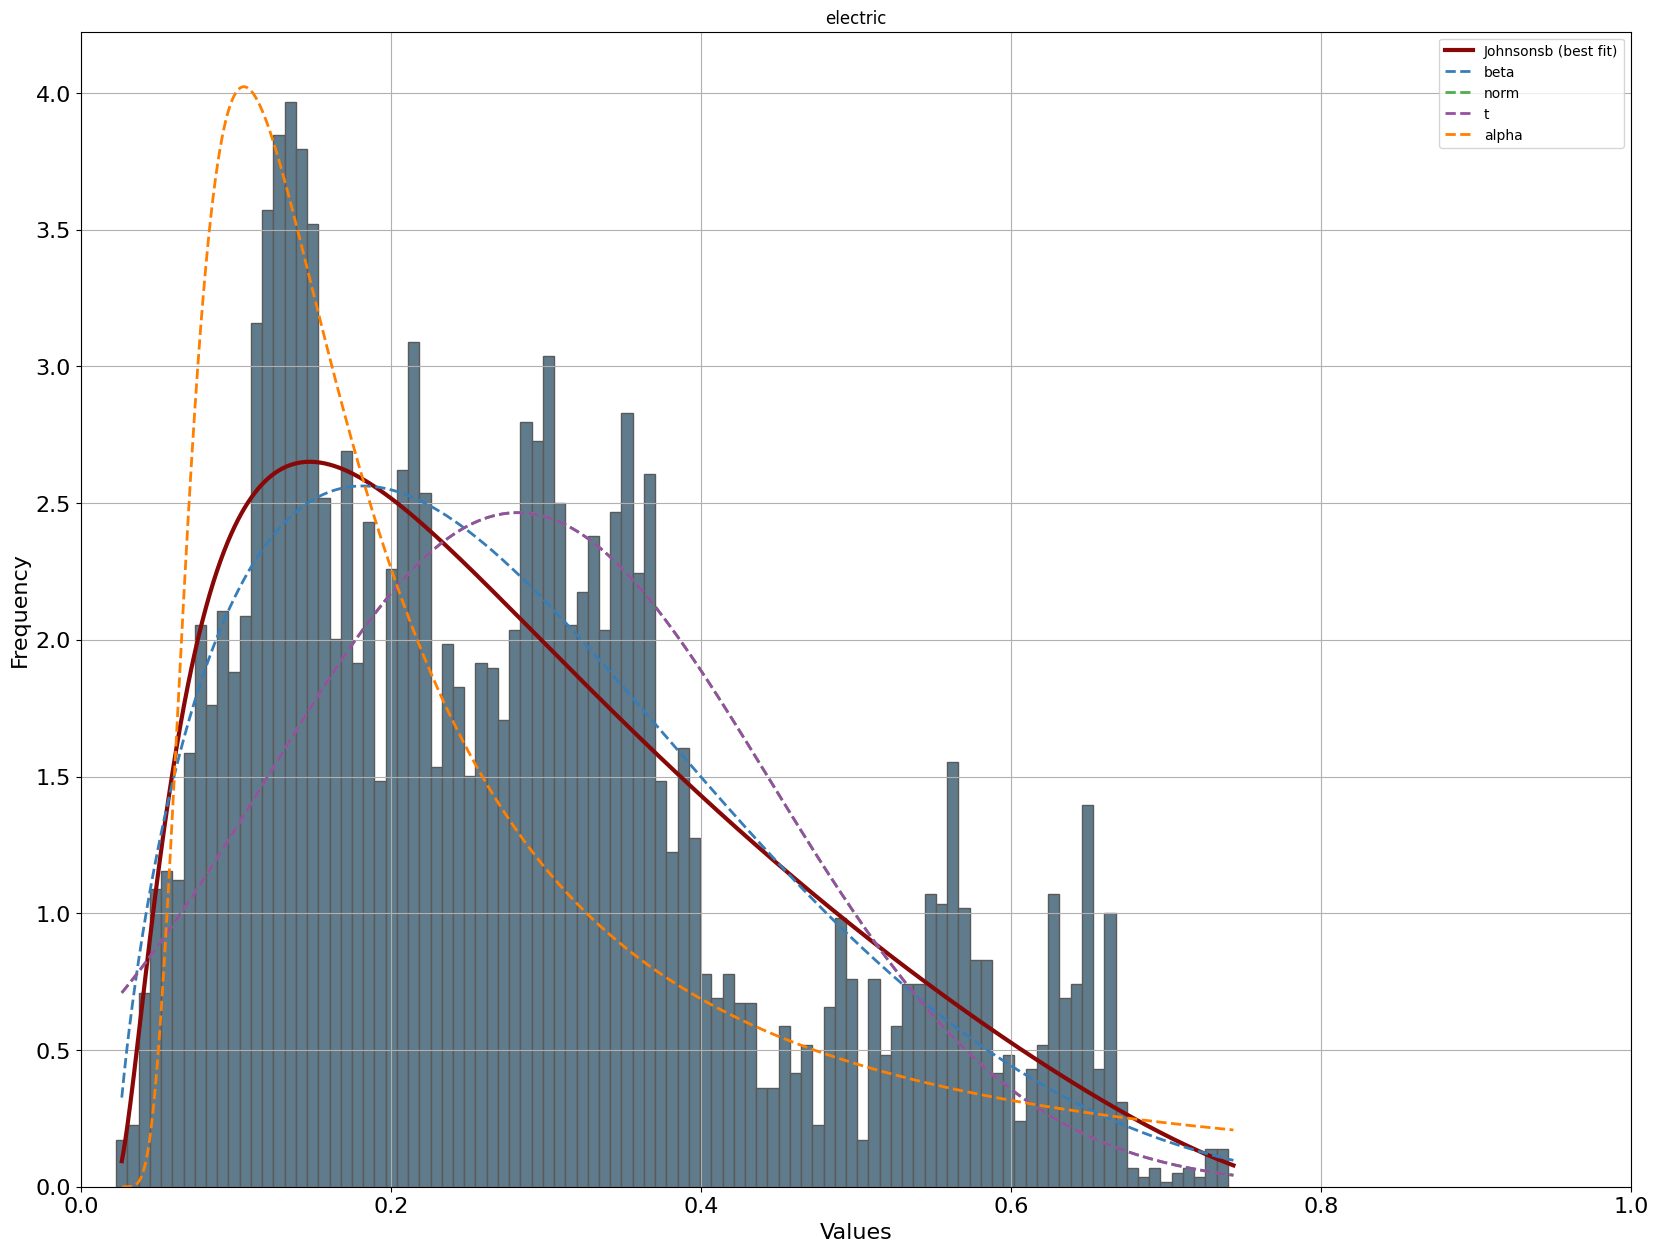

name score    loc   scale                                       arg   
0          t 2.791  0.490   0.112                      (724385.9830828989,)  \
1       norm 2.791  0.490   0.112                                        ()   
2  johnsonsb 3.147 -0.956   2.436  (-1.9757276554643273, 5.183291352874096)   
3       beta 3.163 -0.772   2.049   (47.78991805346297, 29.869084937355723)   
4      alpha 3.784 -2.922 101.985                     (29.940074030819424,)   

                                                                              params   
0                       (724385.9830828989, 0.4895883846756896, 0.11240842707003672)  \
1                                            (0.4895877462942153, 0.112408444874419)   
2  (-1.9757276554643273, 5.183291352874096, -0.9555229636913871, 2.4356138834220875)   
3     (47.78991805346297, 29.869084937355723, -0.7716134644459086, 2.04946445925946)   
4                       (29.940074030819424, -2.921800798833635, 101.98535697712387)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62C56A30>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62DDEDF0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62F08280>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A7AACD0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62C4C2E0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

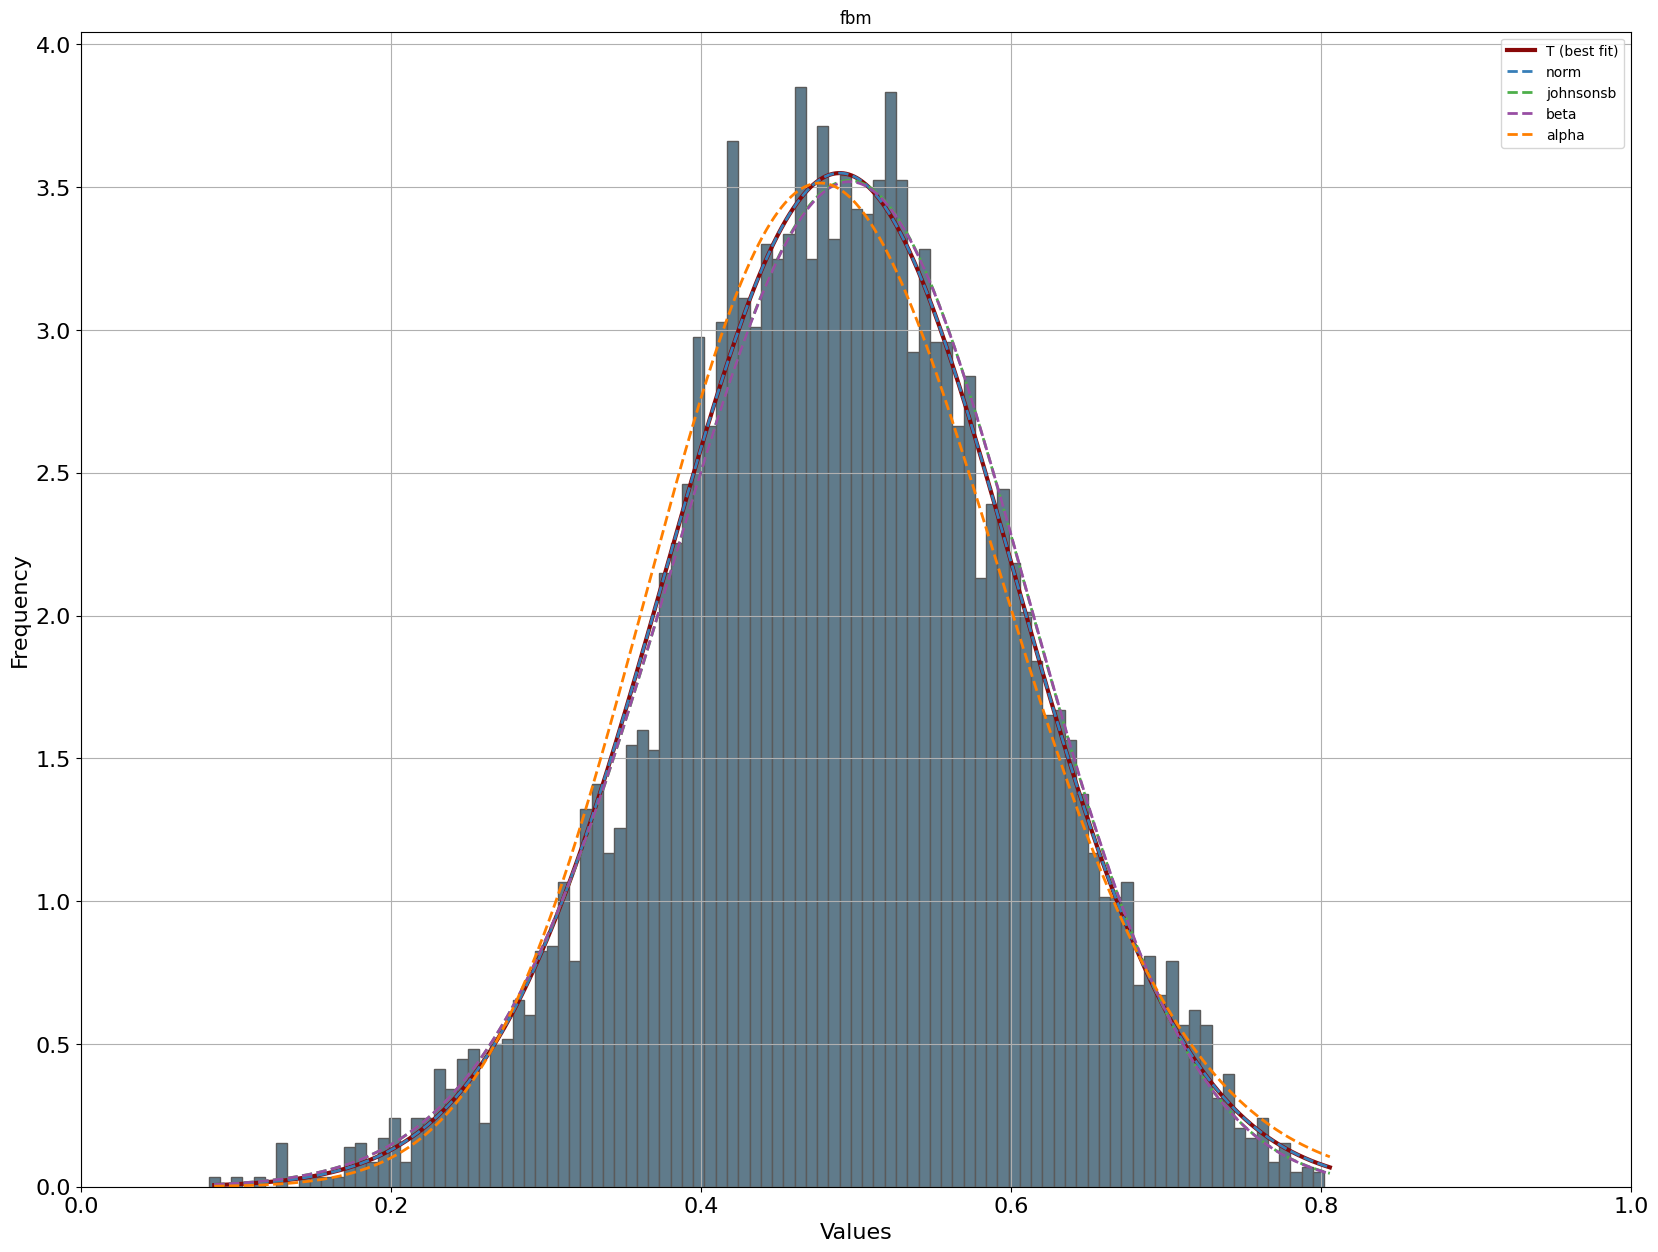

name    score    loc scale                                      arg   
0      alpha  241.047 -0.006 0.008                 (2.877291273151078e-07,)  \
1       beta 1604.459 -0.000 1.396  (0.5328447001014461, 2.296486560409421)   
2    arcsine 1955.439 -0.000 1.030                                       ()   
3  johnsonsb 2179.153 -0.000 1.208  (2.548507101474612, 0.1343958310501319)   
4       norm 2204.062  0.142 0.200                                       ()   

                                                                                 params   
0                    (2.877291273151078e-07, -0.00551299342814272, 0.00808923220909184)  \
1    (0.5328447001014461, 2.296486560409421, -7.035482926449147e-31, 1.396034253657552)   
2                                          (-1.029187698893561e-27, 1.0303503521919084)   
3  (2.548507101474612, 0.1343958310501319, -4.0303577402995694e-26, 1.2081597637985086)   
4                                            (0.14170035638709208, 0.20027106955182888)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62DDBAF0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C13E5B0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C13E1C0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F63F4C1F0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F632F7460>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

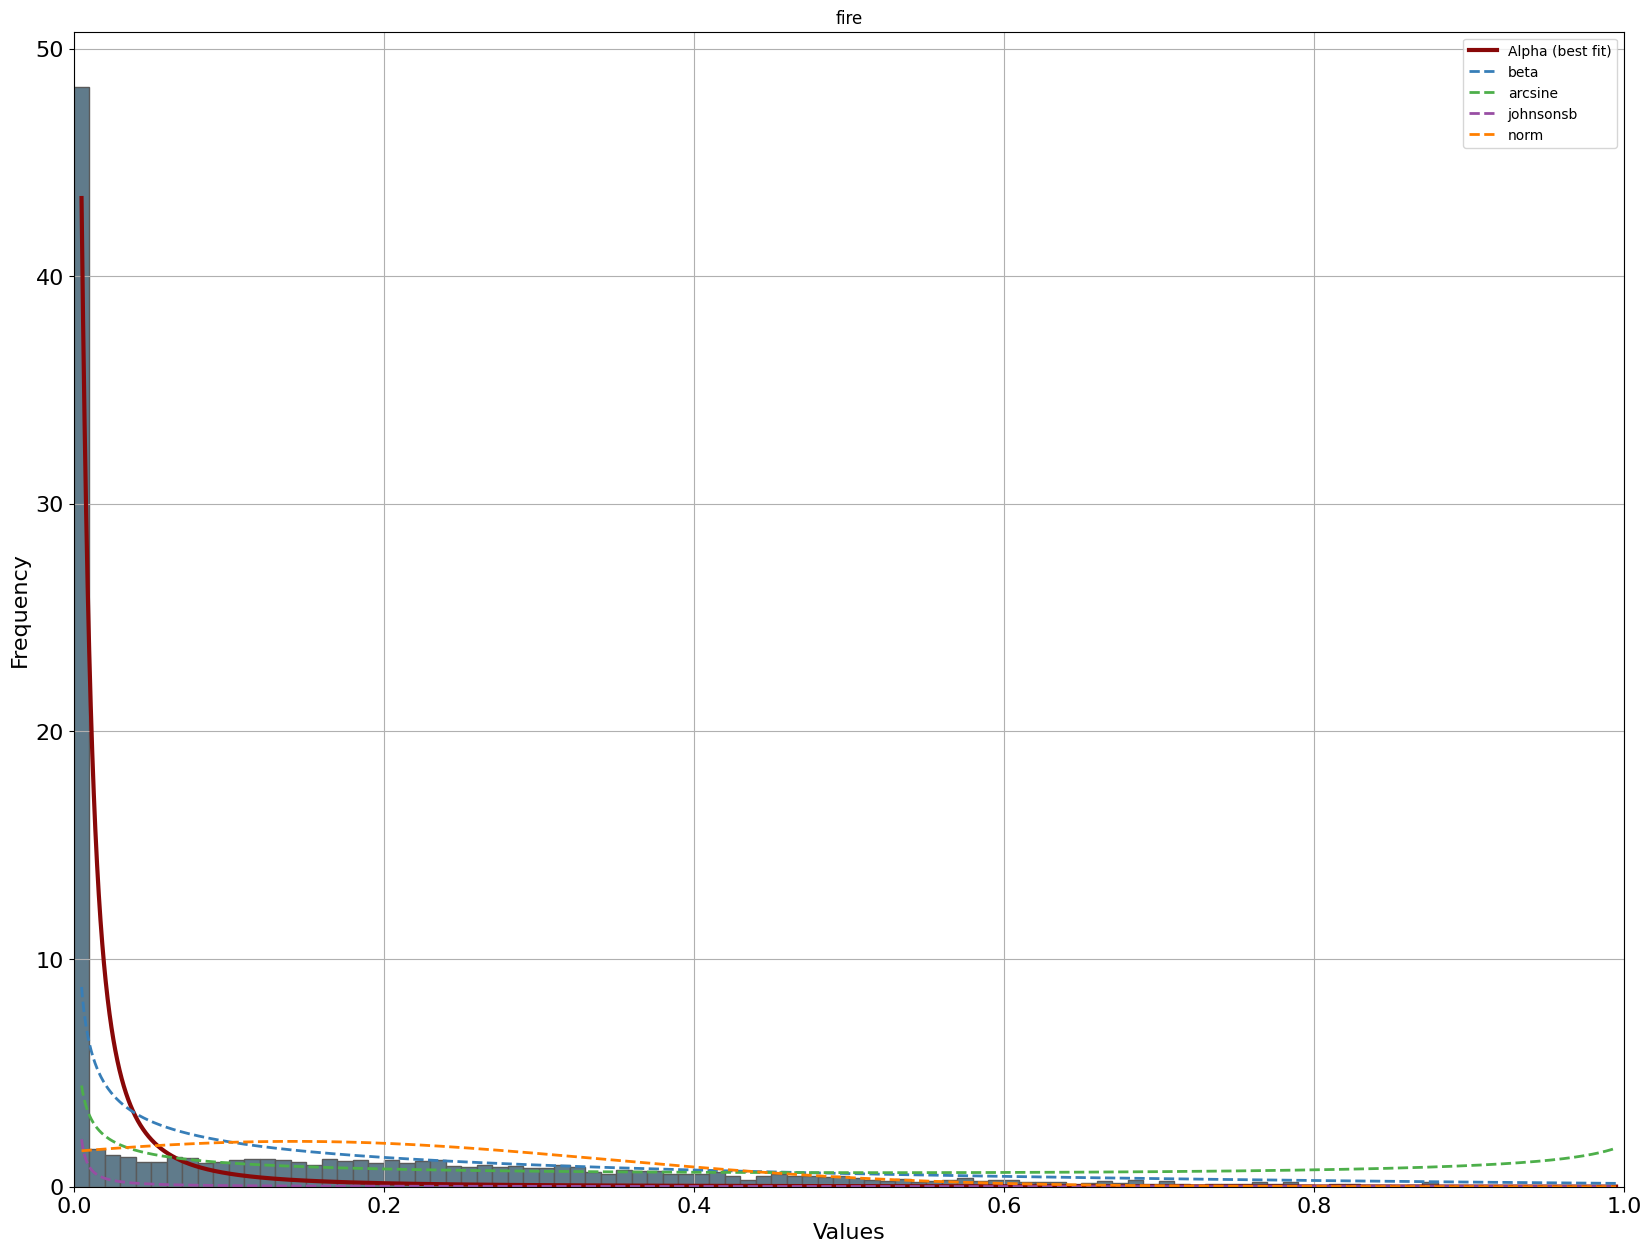

name score    loc  scale                                         arg   
0  johnsonsb 5.248 -0.094  0.915  (-0.01384183183397155, 1.8536452630279554)  \
1       beta 5.265 -0.044  0.812     (5.706510339168345, 5.6222907242673905)   
2       norm 5.971  0.365  0.116                                          ()   
3          t 5.972  0.365  0.116                        (7358564.673883535,)   
4      alpha 6.121 -2.350 63.260                        (23.34939010094663,)   

                                                                                params   
0  (-0.01384183183397155, 1.8536452630279554, -0.09365742447539387, 0.914765227057875)  \
1    (5.706510339168345, 5.6222907242673905, -0.04377288545236493, 0.8121857186457464)   
2                                              (0.36529823302757, 0.11556427792451696)   
3                         (7358564.673883535, 0.3653025147131241, 0.11556403805510476)   
4                         (23.34939010094663, -2.3498722598673334, 63.259654709606735)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69A95190>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D0F340>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64C5A4C0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62EA98E0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F655406D0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

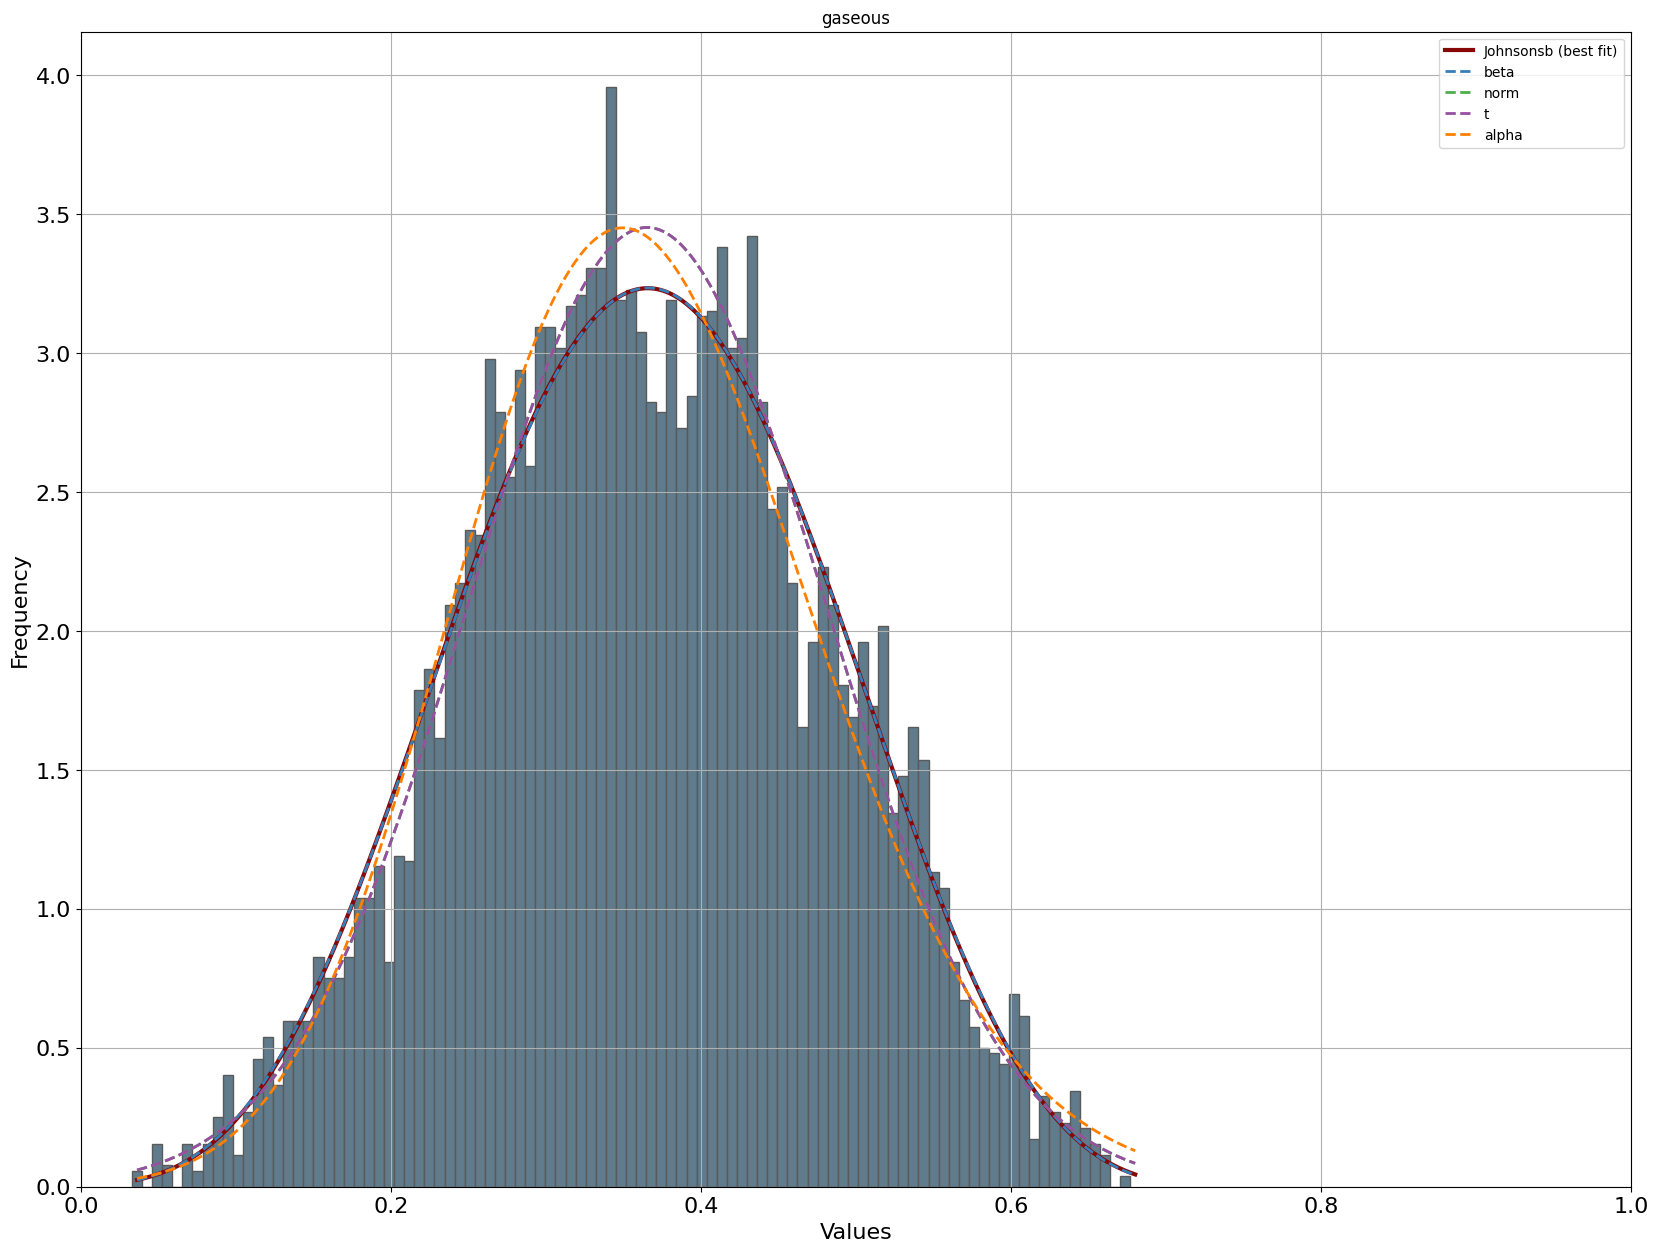

name   score    loc scale                                       arg   
0  johnsonsb  12.074  0.000 0.987  (1.3733754039755472, 0.4853779245420632)  \
1       beta  94.495  0.000 1.115   (0.5154439074965692, 3.140910149225896)   
2      alpha 157.165 -0.023 0.047                  (0.0053006476368380046,)   
3          t 358.034  0.042 0.052                     (1.0387951422911323,)   
4    arcsine 448.625  0.000 0.979                                        ()   

                                                                                params   
0  (1.3733754039755472, 0.4853779245420632, 9.888535271510272e-05, 0.9871069024378346)  \
1  (0.5154439074965692, 3.140910149225896, 0.00010905944509431718, 1.1146376904763786)   
2                   (0.0053006476368380046, -0.02254010357472439, 0.04713861185686335)   
3                      (1.0387951422911323, 0.041727703987372605, 0.05207045722438932)   
4                                         (0.00010905944509431718, 0.9788008479939041)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62CBA2B0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C17A490>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ACADEB0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ACAD340>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62CBA250>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

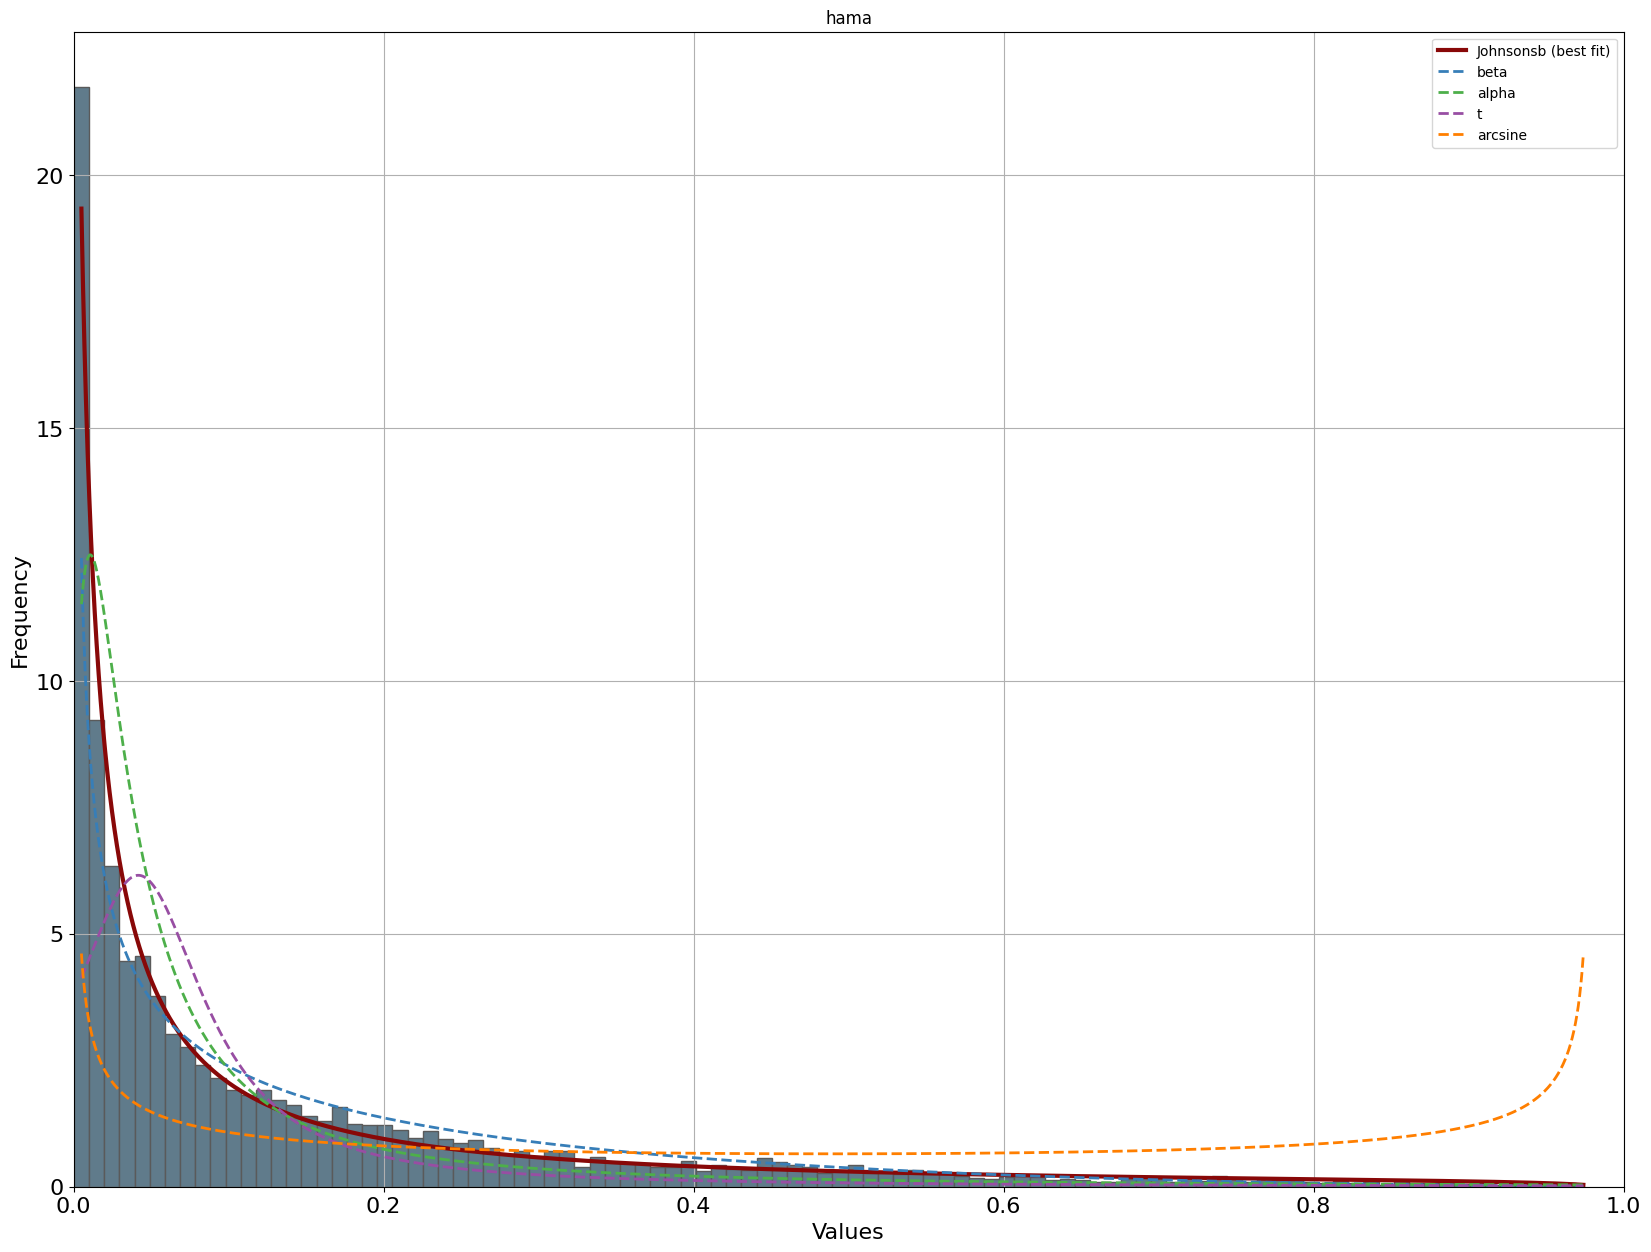

name score    loc      scale                                      arg   
0          t 4.196  0.357      0.144                    (19.986189056590028,)  \
1       norm 4.428  0.360      0.152                                       ()   
2      alpha 5.119 -1.326     18.995                    (11.351292589796977,)   
3       beta 5.393 -0.164 324600.015  (11.821040907446676, 7310592.457217895)   
4  johnsonsb 5.457 -0.122      1.694  (2.111320716300024, 2.1928480732822475)   

                                                                             params   
0                     (19.986189056590028, 0.3574683802083136, 0.14402928613300256)  \
1                                         (0.3604676911975257, 0.15185062402347446)   
2                      (11.351292589796977, -1.326170898545662, 18.994812521728356)   
3   (11.821040907446676, 7310592.457217895, -0.16439183189716447, 324600.015361915)   
4  (2.111320716300024, 2.1928480732822475, -0.12218291280852205, 1.693531871025332)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A7797F0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62EA95E0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69A6C7C0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ADD9FA0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C0C6100>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

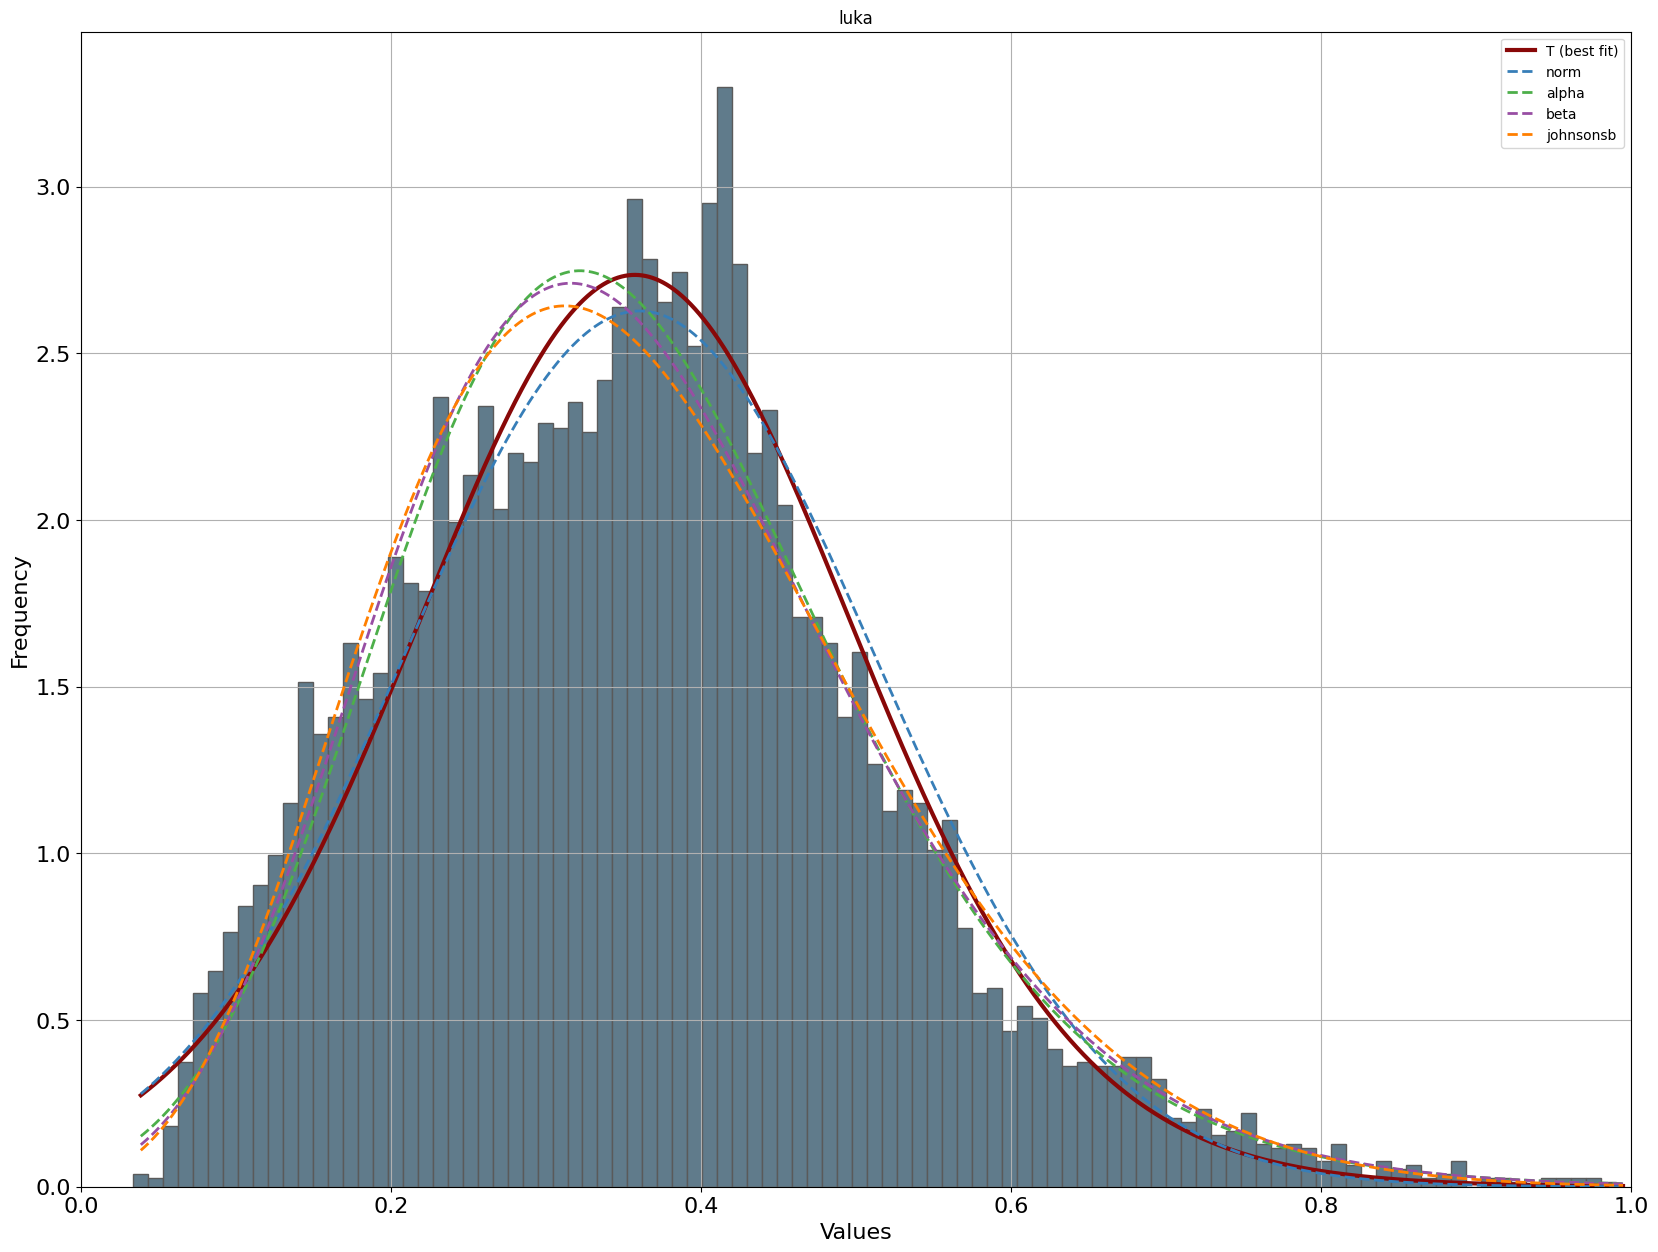

name   score    loc  scale                                       arg   
0      alpha 115.344 -2.869 82.058                     (24.448763609996476,)  \
1          t 115.809  0.494  0.136                      (797176.7580692014,)   
2       norm 115.809  0.494  0.136                                        ()   
3  johnsonsb 116.086 -1.215  2.958  (-1.6604312937488077, 5.246962097111558)   
4       beta 116.119 -1.071  2.573  (50.941412574393695, 32.822277022639796)   

                                                                              params   
0                       (24.448763609996476, -2.8691833600223973, 82.05761686738776)  \
1                      (797176.7580692014, 0.49419836572916365, 0.13632877542733507)   
2                                         (0.49419726760406046, 0.13632761585800995)   
3  (-1.6604312937488077, 5.246962097111558, -1.2146656441735986, 2.9576540718795927)   
4  (50.941412574393695, 32.822277022639796, -1.0705399370668442, 2.5727458096837967)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D3F730>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62FB8BB0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64B60370>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5AFBC6D0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F63306580>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

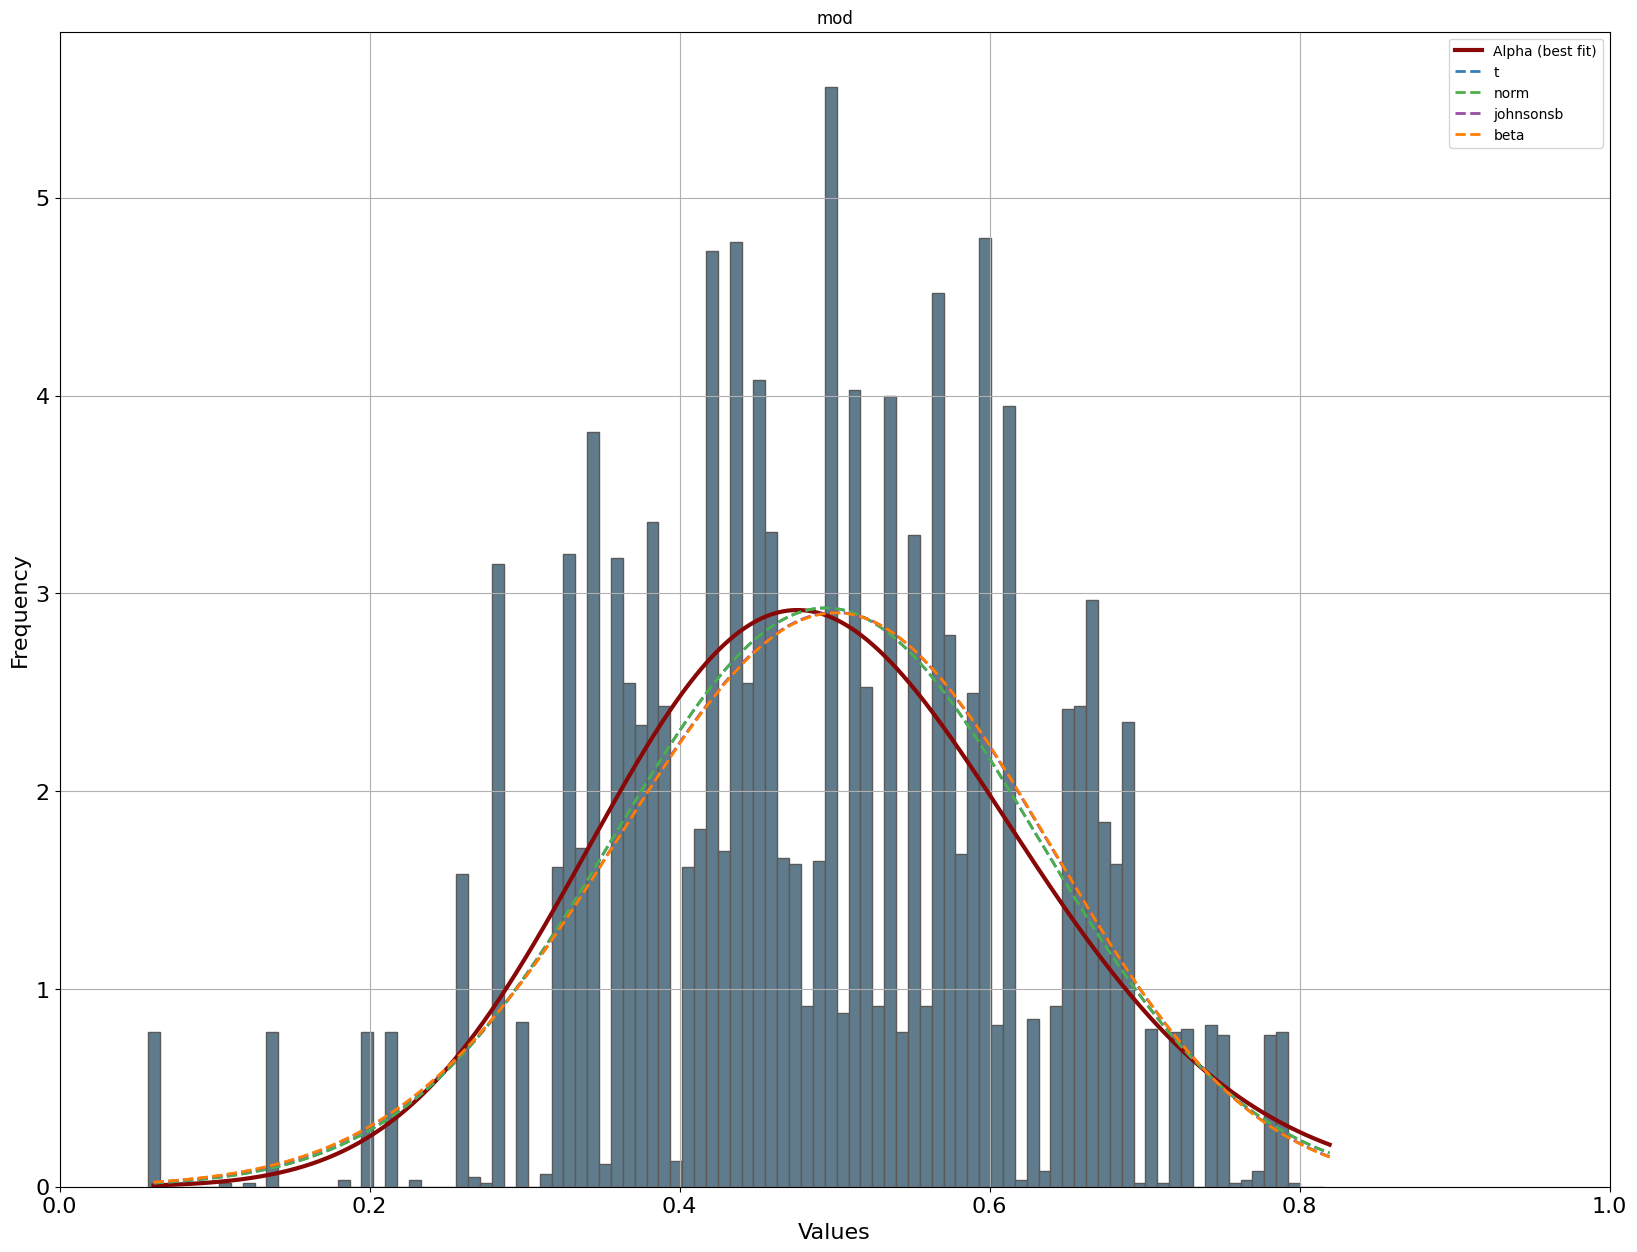

name score    loc  scale                                        arg   
0       beta 3.218  0.131  0.771   (2.5098469323337538, 3.4830057503591805)  \
1  johnsonsb 3.294  0.104  0.819  (0.40370539256521837, 1.2226984082508794)   
2      alpha 6.526 -1.991 41.639                       (17.08546674314485,)   
3       norm 7.407  0.454  0.144                                         ()   
4          t 7.408  0.454  0.144                       (6926150.353830071,)   

                                                                              params   
0  (2.5098469323337538, 3.4830057503591805, 0.13139736578895278, 0.7713432879019717)  \
1  (0.40370539256521837, 1.2226984082508794, 0.10357668889091431, 0.818636964670223)   
2                        (17.08546674314485, -1.9911842427258377, 41.63866443654629)   
3                                         (0.45437596161291005, 0.14389076246530513)   
4                        (6926150.353830071, 0.454377185096694, 0.14388658453291742)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D89910>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D893D0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F657C1880>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D02E20>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CED760>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

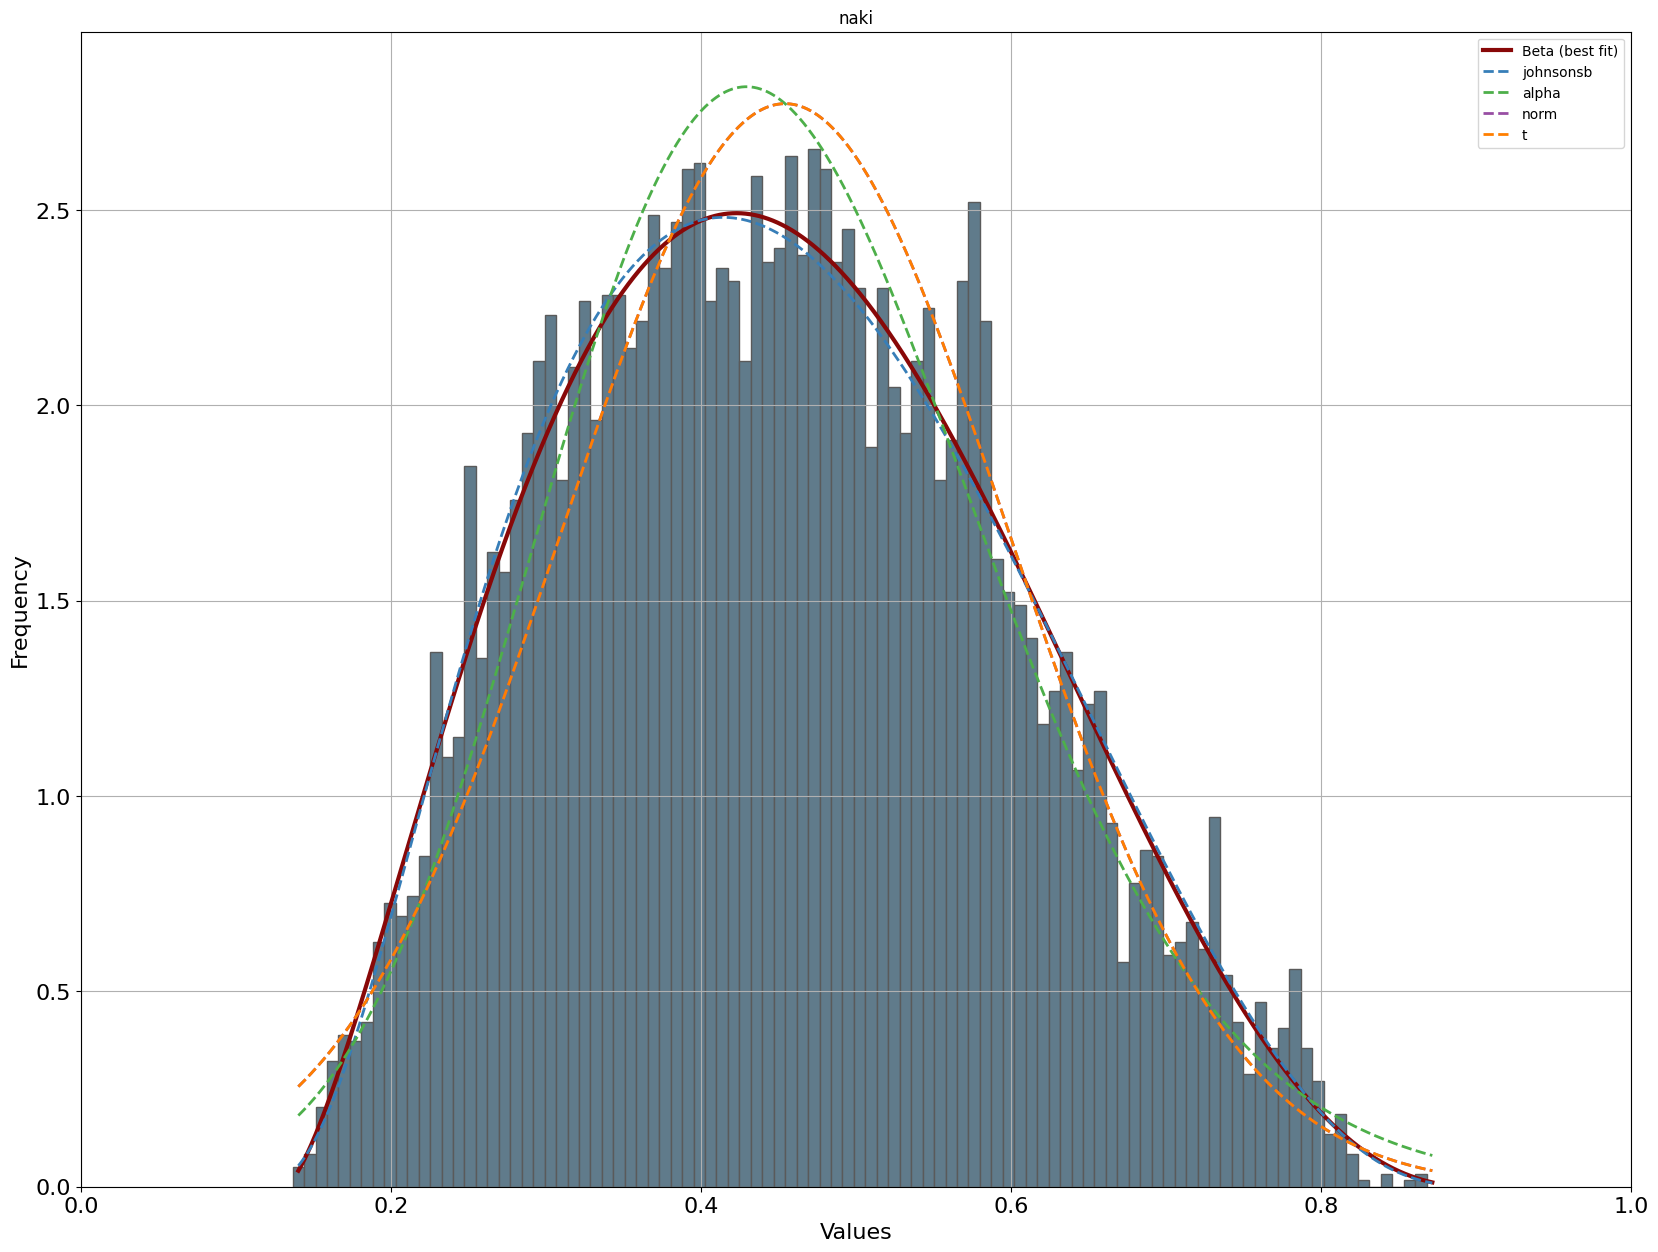

name score    loc   scale                                         arg   
0  johnsonsb 3.538 -0.367   1.582  (-0.49549530186394686, 2.5729712497700055)  \
1          t 3.541  0.497   0.147                       (3259960.7924031205,)   
2       norm 3.541  0.497   0.147                                          ()   
3       beta 3.545 -0.273   1.376      (11.49313792647804, 9.035608359821993)   
4      alpha 3.878 -3.427 102.991                         (26.2859405983657,)   

                                                                                 params   
0  (-0.49549530186394686, 2.5729712497700055, -0.36688589212043754, 1.5819105220028282)  \
1                         (3259960.7924031205, 0.4973245177593678, 0.14709624644108943)   
2                                              (0.4973252183808945, 0.1470960998544666)   
3      (11.49313792647804, 9.035608359821993, -0.27286766721669037, 1.3757619370318201)   
4                           (26.2859405983657, -3.4265457981947014, 102.99119596128344)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64AF6880>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5AB2E610>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5B578850>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5AB2E520>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C27A580>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

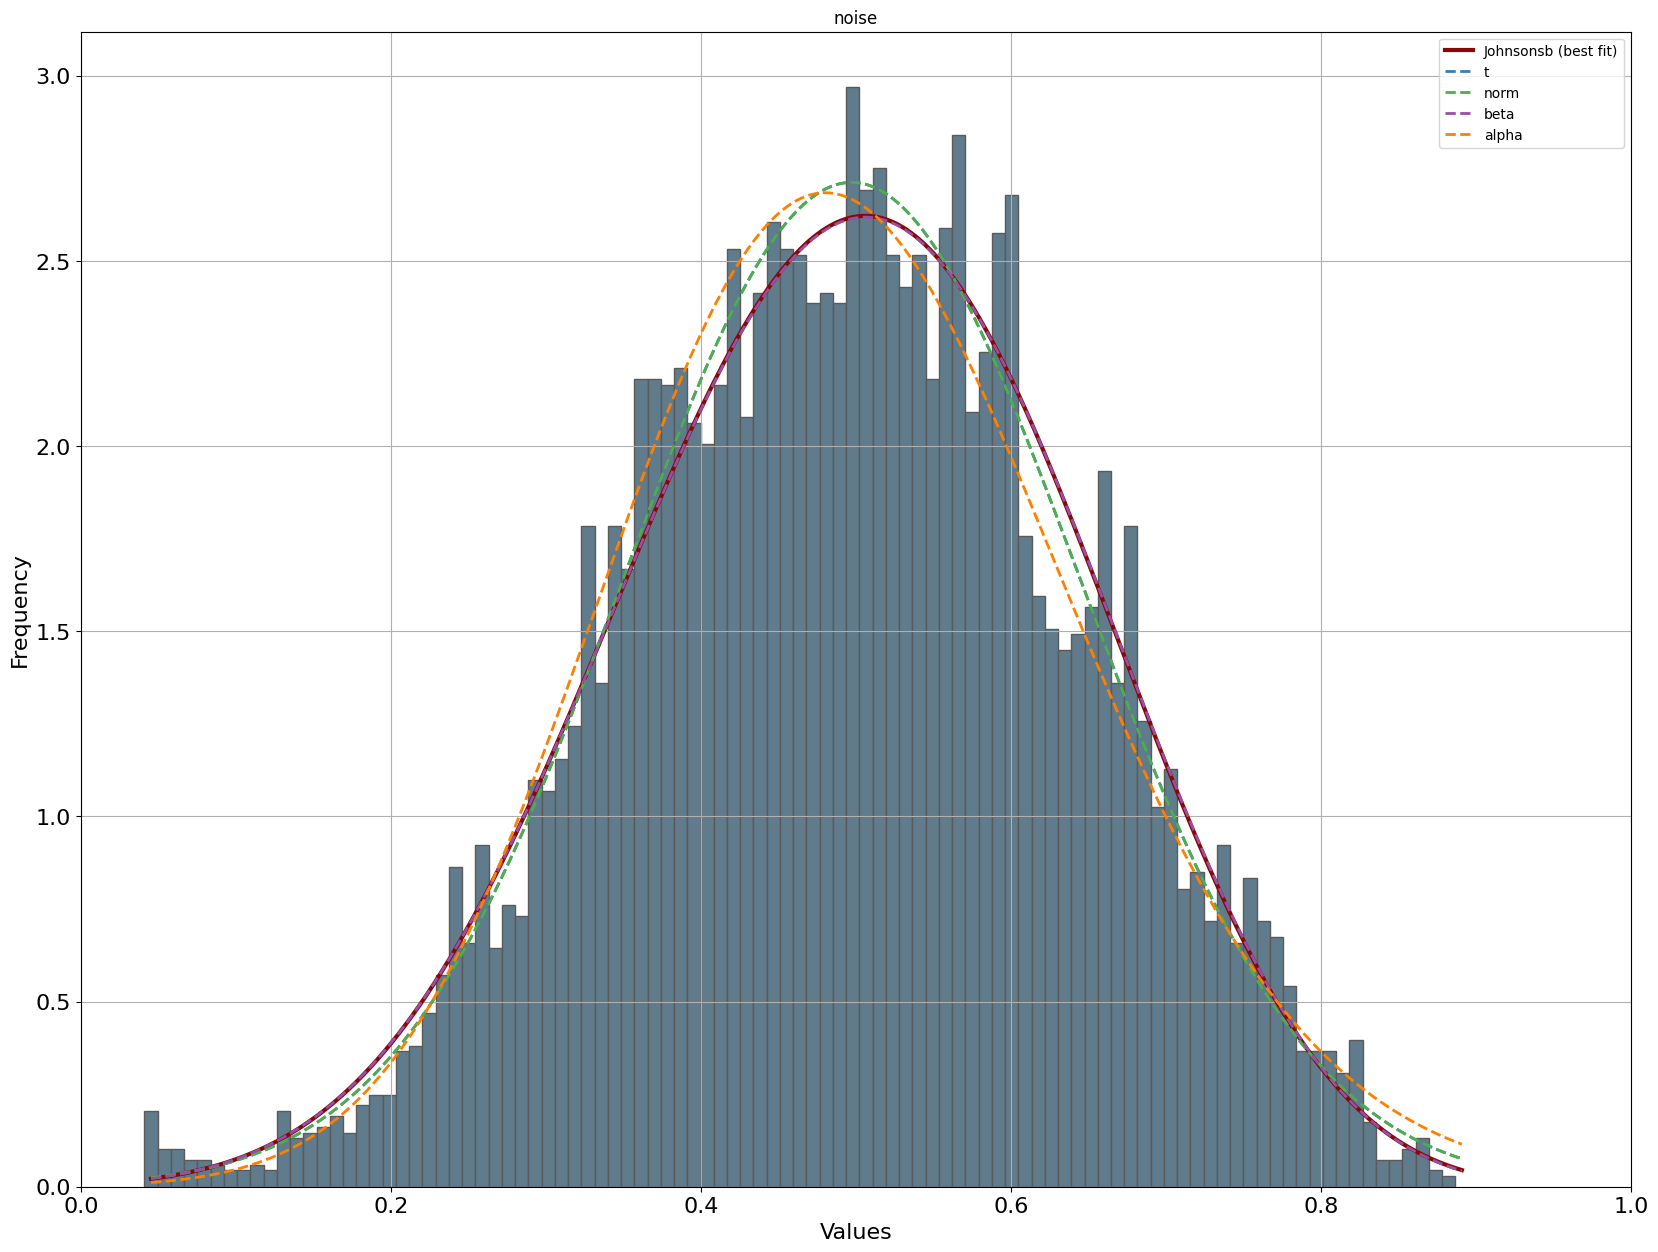

name  score    loc scale                                      arg   
0  johnsonsb  6.102 -0.001 1.008  (1.482281425759721, 0.7743320509730154)  \
1       beta  9.157  0.001 1.265    (1.00776858319538, 5.860615850731226)   
2      alpha 34.972 -0.209 0.992                    (2.8816739191511003,)   
3          t 69.535  0.165 0.136                     (6.421810364889804,)   
4       norm 75.219  0.187 0.162                                       ()   

                                                                               params   
0  (1.482281425759721, 0.7743320509730154, -0.0010668340062833545, 1.008054587113929)  \
1     (1.00776858319538, 5.860615850731226, 0.001227017996450912, 1.2646548660525025)   
2                      (2.8816739191511003, -0.20859401073588774, 0.9920087338254437)   
3                        (6.421810364889804, 0.1651085475655934, 0.13561306892531833)   
4                                          (0.18651121440519636, 0.16201458098068222)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F63417BB0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A773D60>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A4DB190>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65542190>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6610FDC0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

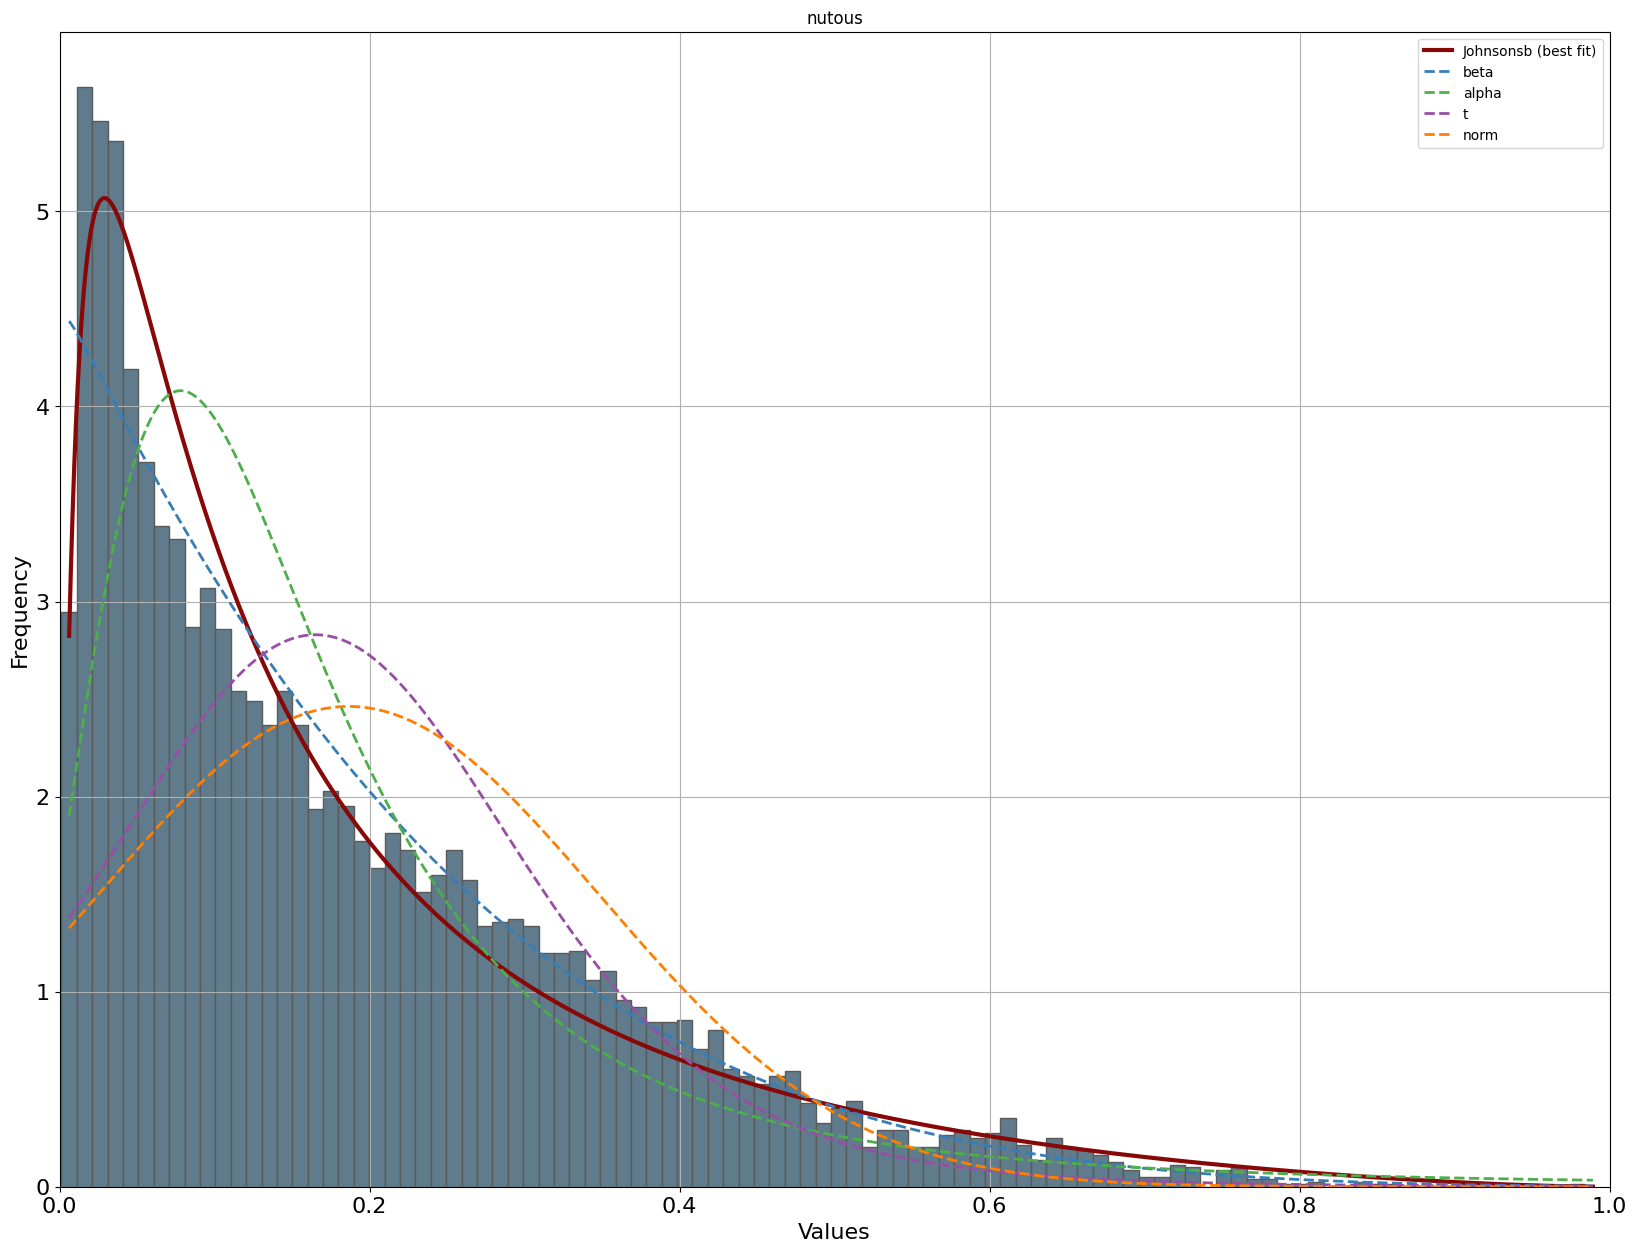

name  score    loc      scale   
0      alpha 15.747 -0.487      3.523  \
1  johnsonsb 15.898 -0.117      8.647   
2       beta 16.408 -0.035 237311.103   
3          t 19.219  0.221      0.121   
4       norm 27.010  0.244      0.165   

                                       arg   
0                     (5.040553241123917,)  \
1   (7.026063204636653, 2.174743883218472)   
2  (2.898346000190106, 2460608.5447702426)   
3                     (4.168336811666159,)   
4                                       ()   

                                                                             params   
0                        (5.040553241123917, -0.4865402694045311, 3.52343761408458)  \
1   (7.026063204636653, 2.174743883218472, -0.11692840091863888, 8.647101332738085)   
2  (2.898346000190106, 2460608.5447702426, -0.0354716450086863, 237311.10258832012)   
3                     (4.168336811666159, 0.22050716087629338, 0.12107740807614778)   
4                                         (0.24365446900121293, 0.1645432401017674)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68984F70>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69D56D90>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F66A17CA0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F634548E0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68AD60D0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

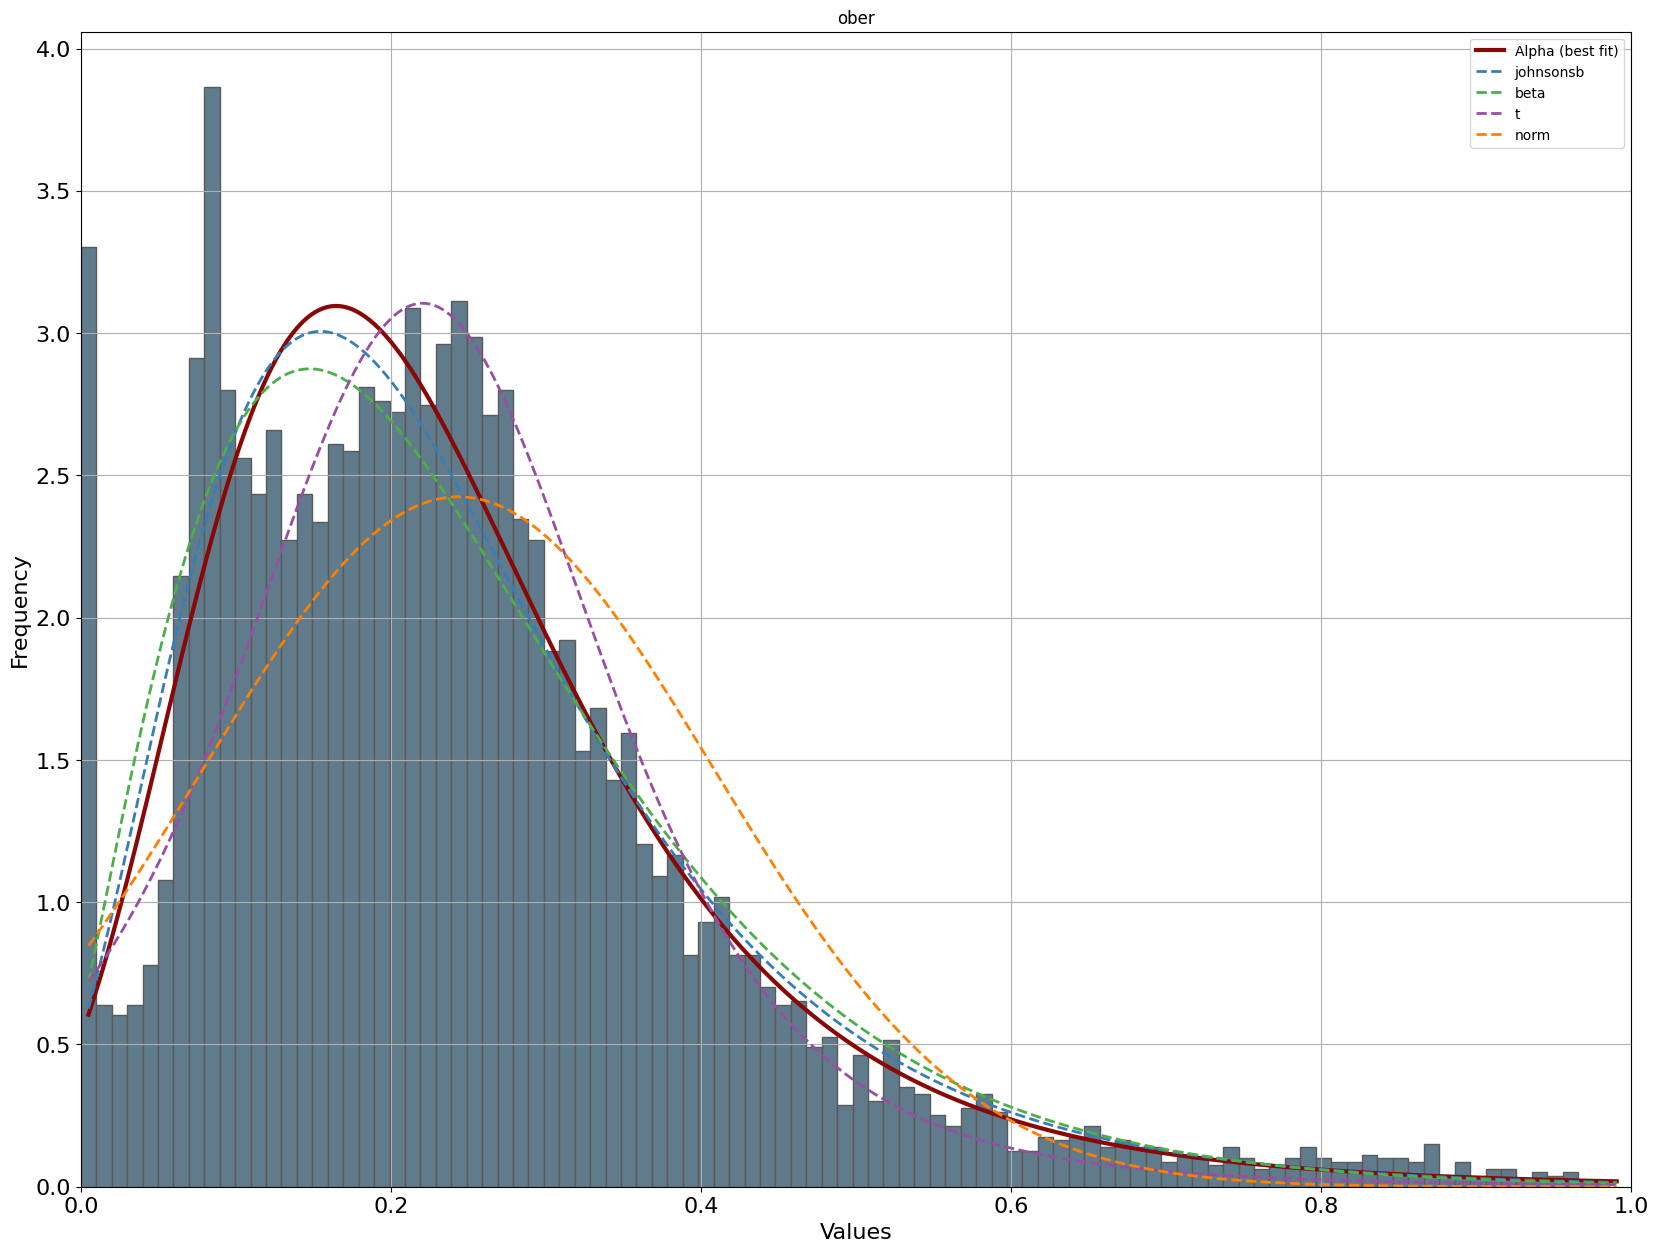

name   score   loc            scale   
0      alpha   4.333 0.033            0.293  \
1  johnsonsb  25.727 0.072           44.317   
2       beta  50.649 0.063 728332471895.081   
3          t  72.228 0.125            0.021   
4       norm 447.542 0.142            0.070   

                                        arg   
0                     (3.1316642418673517,)  \
1  (10.622101957935708, 1.5908095370239166)   
2     (4.77245026397588, 46908603923694.75)   
3                     (1.8652178862696065,)   
4                                        ()   

                                                                             params   
0                     (3.1316642418673517, 0.03256605097186971, 0.2933036632746644)  \
1  (10.622101957935708, 1.5908095370239166, 0.07210524010289743, 44.31667408137946)   
2     (4.77245026397588, 46908603923694.75, 0.06295478966016396, 728332471895.0806)   
3                   (1.8652178862696065, 0.12531538829619432, 0.021323441925670723)   
4                                        (0.14246246257517486, 0.07003764575388932)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68072EE0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F656846A0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F641FD8E0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F660B5E20>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F660B5460>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

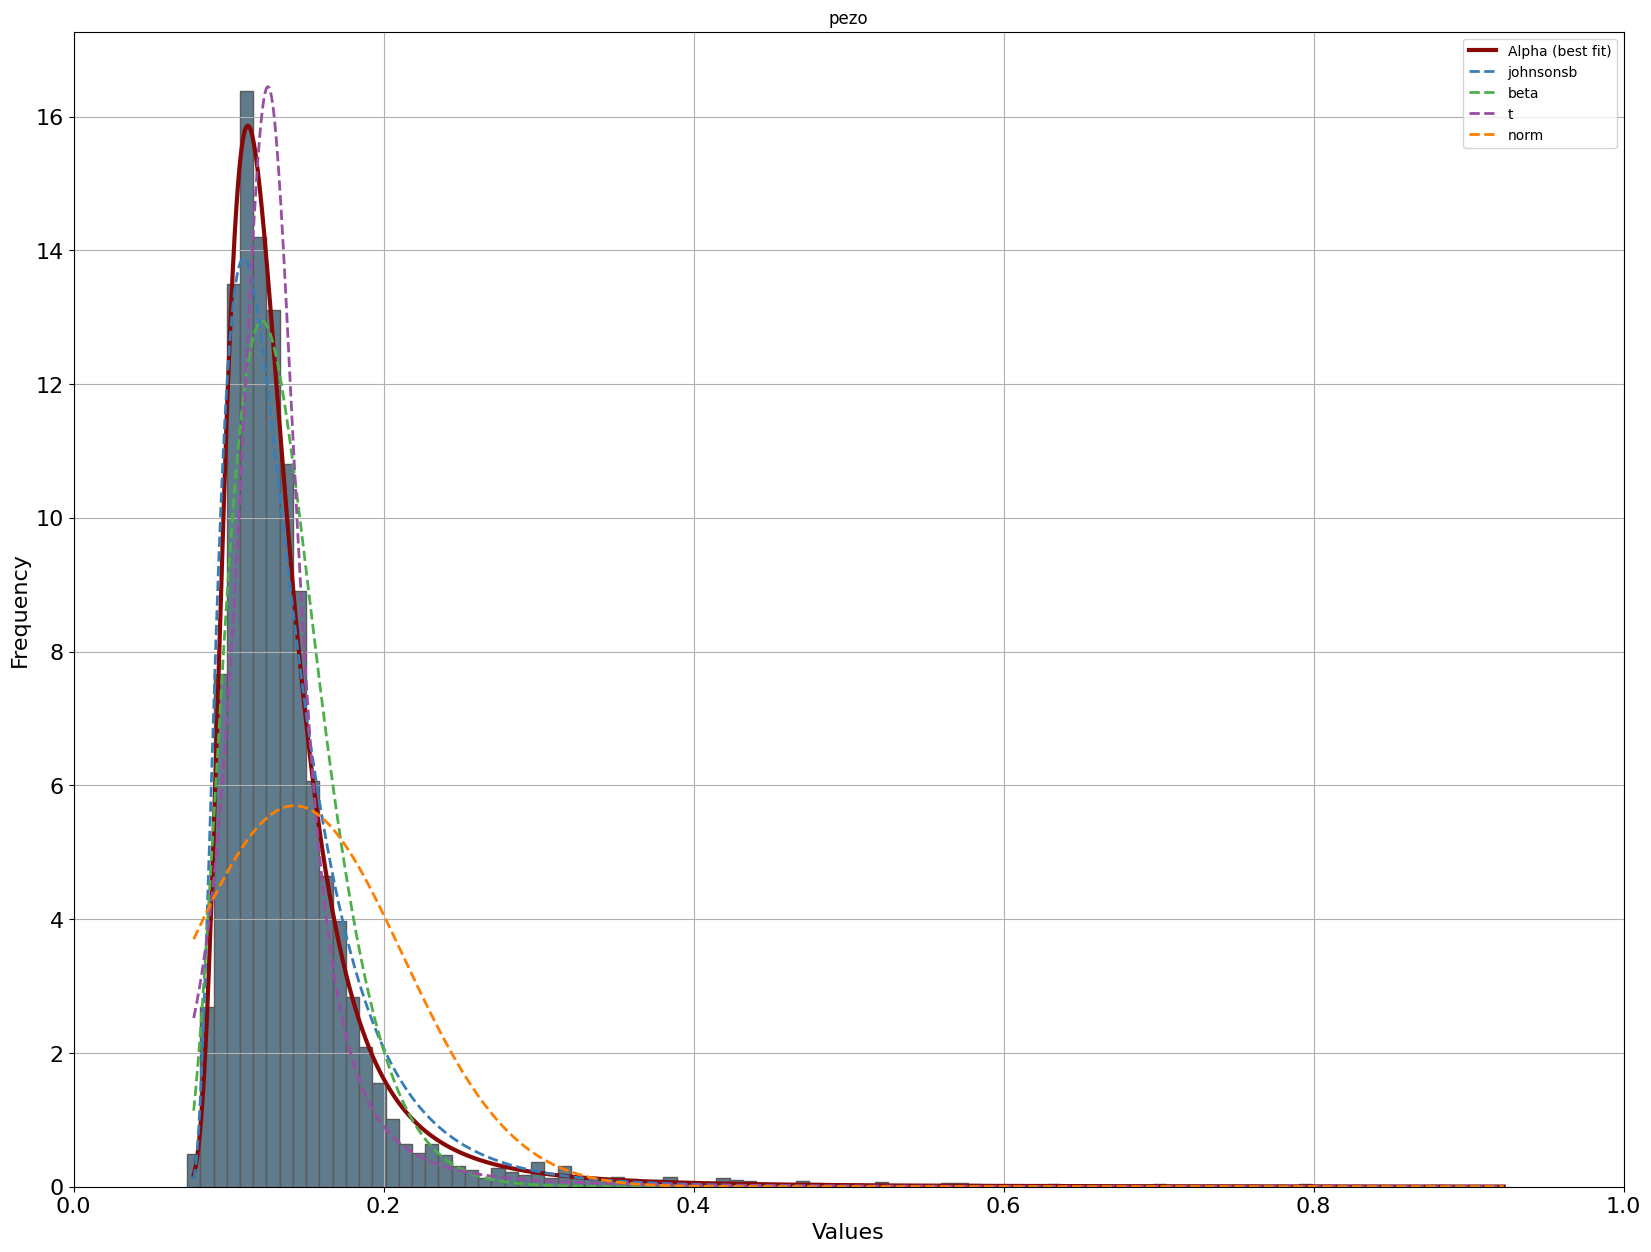

name  score    loc            scale   
0      alpha  1.939 -0.112            0.944  \
1  johnsonsb  2.397  0.017           23.065   
2       beta 12.733  0.026 114069790585.602   
3          t 30.147  0.157            0.063   
4       norm 78.578  0.185            0.111   

                                       arg   
0                      (3.51520761416372,)  \
1  (8.549913234017673, 1.6795477120864666)   
2  (2.522178288134744, 1801153158416.5308)   
3                    (2.5760320402949244,)   
4                                       ()   

                                                                              params   
0                       (3.51520761416372, -0.11175261691571309, 0.9436890736559169)  \
1  (8.549913234017673, 1.6795477120864666, 0.016640882957109665, 23.064519498800756)   
2  (2.522178288134744, 1801153158416.5308, 0.026277112995449756, 114069790585.60152)   
3                      (2.5760320402949244, 0.1571389393188506, 0.06316589278456249)   
4                                         (0.18492041428247466, 0.11065509568785699)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62D35190>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69C5A730>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6323C3D0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65537670>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CED730>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

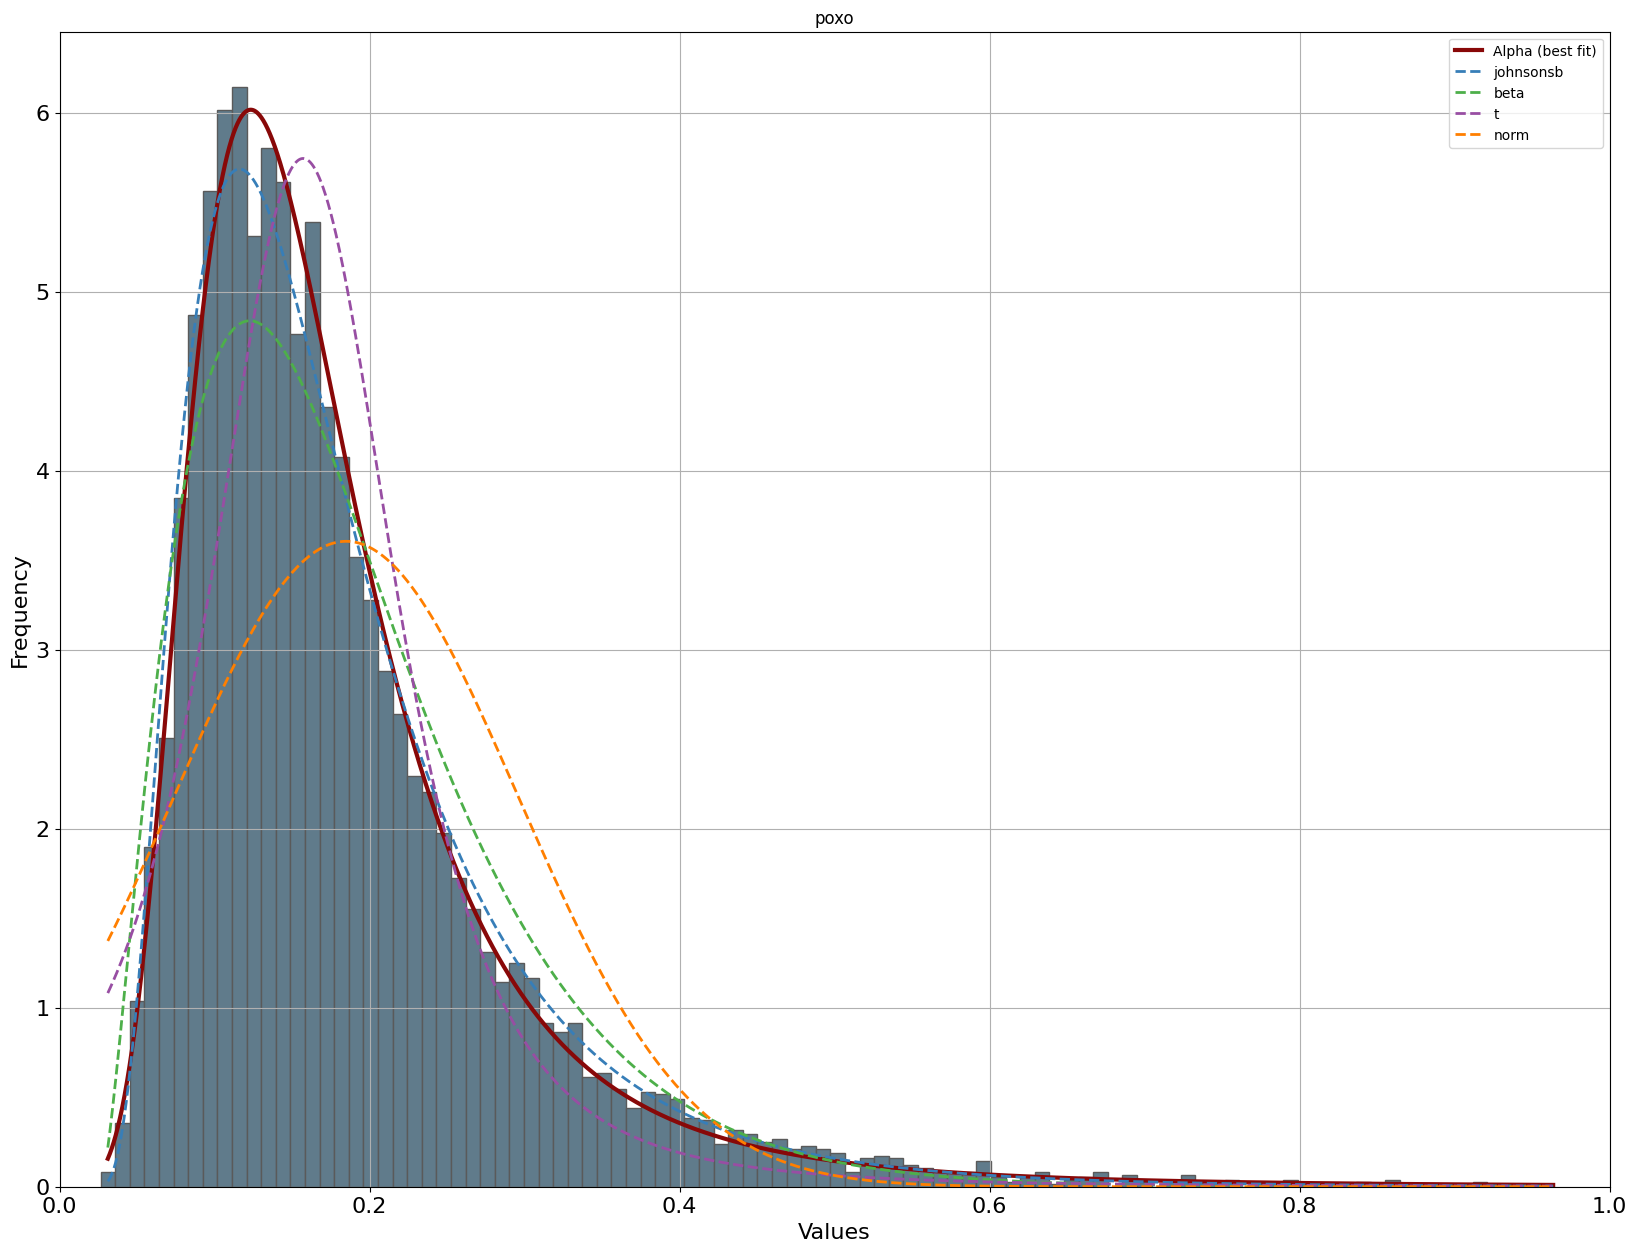

name    score    loc   scale   
0       beta   52.429  0.000 509.664  \
1  johnsonsb   67.625 -0.000   0.748   
2      alpha  275.008 -0.022   0.069   
3          t  690.183  0.029   0.028   
4       norm 1013.782  0.055   0.081   

                                        arg   
0   (0.7039739366063034, 7313.088137720826)  \
1  (2.0455240058566844, 0.6002941115850995)   
2                     (1.3909183225639685,)   
3                     (1.8194688674302046,)   
4                                        ()   

                                                                                  params   
0    (0.7039739366063034, 7313.088137720826, 1.0561284398136193e-05, 509.66444333726383)  \
1  (2.0455240058566844, 0.6002941115850995, -0.00032593231318340463, 0.7482328863971455)   
2                        (1.3909183225639685, -0.02196309029225836, 0.06914408936083083)   
3                        (1.8194688674302046, 0.029398109102417382, 0.02828209551991491)   
4                                             (0.05490301807115384, 0.08067268157730957)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F66A3DE20>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F66A51430>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62B857C0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62B849D0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5F398610>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

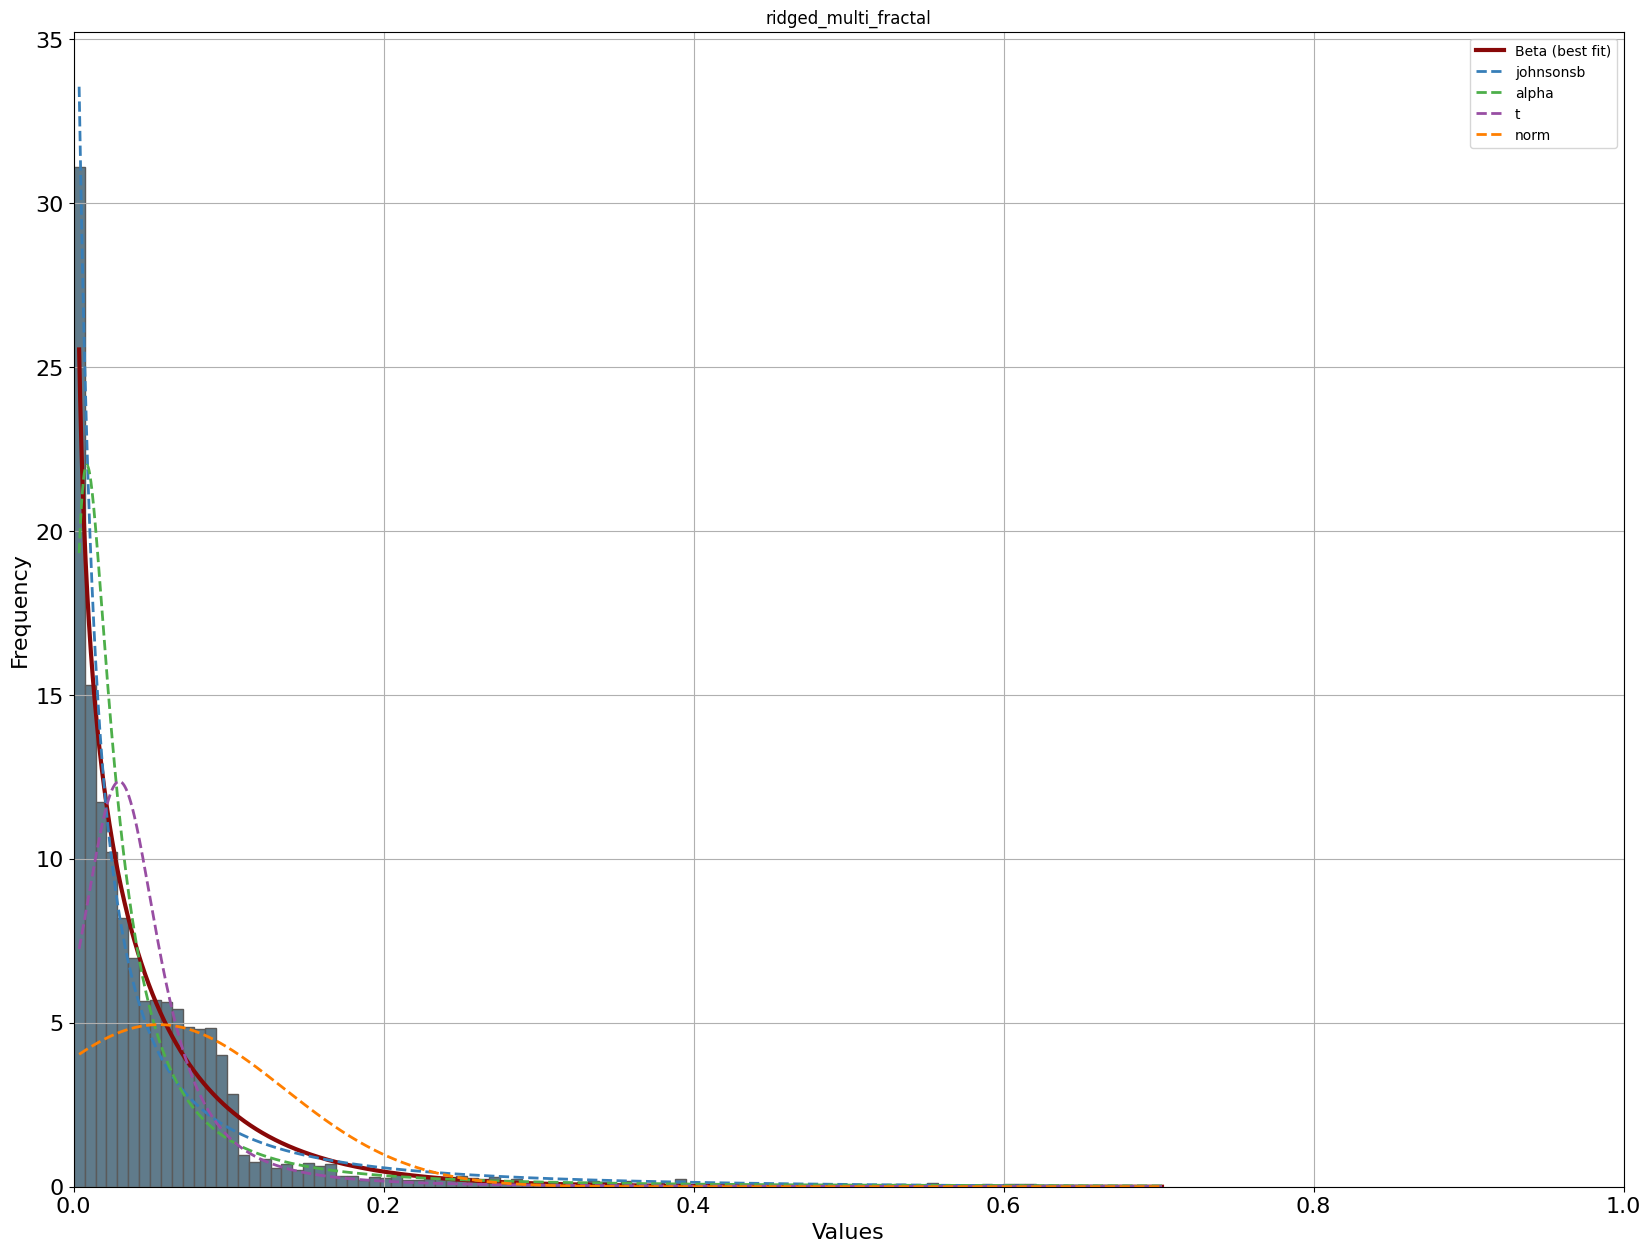

name    score   loc scale                                       arg   
0          t   77.404 0.025 0.003                    (0.39569640640139947,)  \
1      alpha  556.885 0.009 0.019                     (0.2016473974075998,)   
2  johnsonsb 1273.177 0.012 1.908  (2.1704893850252356, 0.5637713273407272)   
3       beta 1706.796 0.012 0.986    (0.238769867070224, 0.767102668995324)   
4    arcsine 2092.994 0.012 0.986                                        ()   

                                                                               params   
0                  (0.39569640640139947, 0.025080256474792367, 0.0033065840563813813)  \
1                    (0.2016473974075998, 0.008821784233335472, 0.019253469924693248)   
2  (2.1704893850252356, 0.5637713273407272, 0.011962567877367915, 1.9079940158191393)   
3    (0.238769867070224, 0.767102668995324, 0.011977113783359526, 0.9860280333859095)   
4                                           (0.011804475581867261, 0.986155853473919)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62EA2D30>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69A79190>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F669FA370>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62F8AFD0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F669E1CD0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

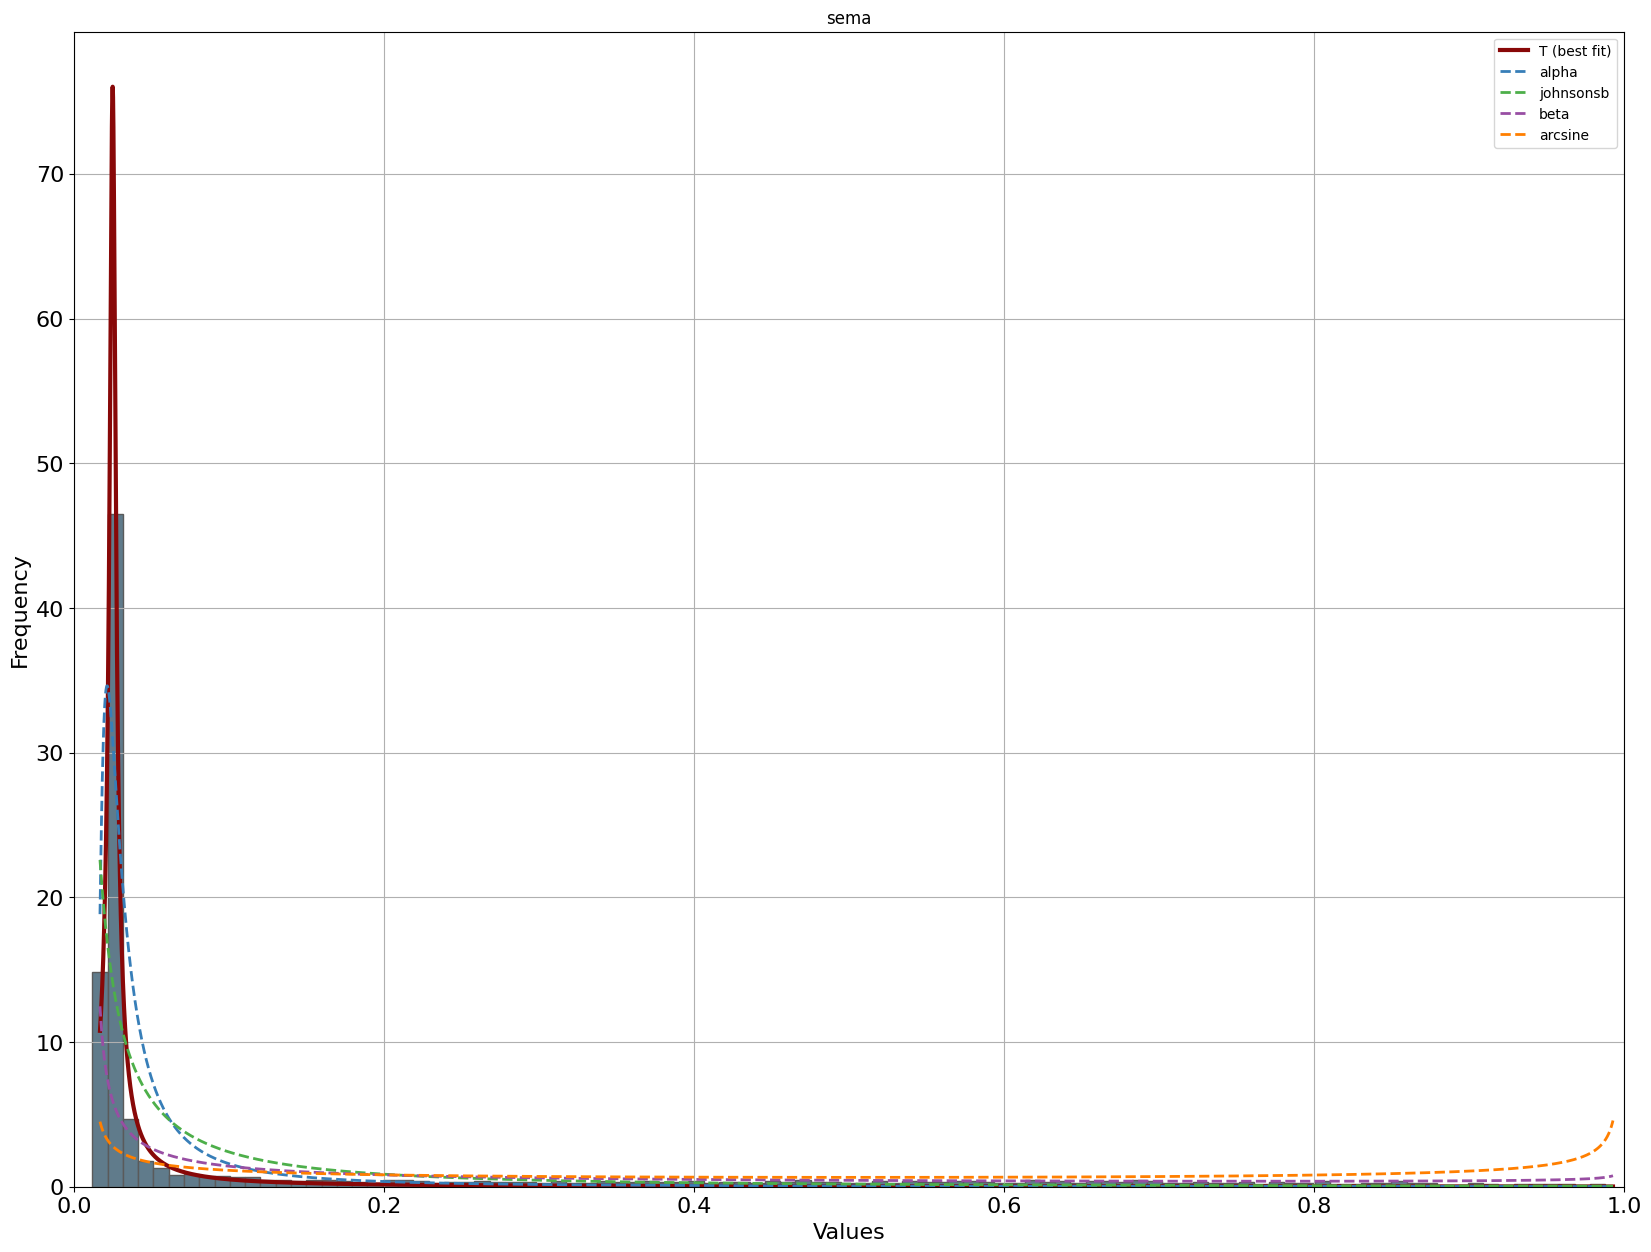

name  score    loc  scale                                        arg   
0          t 13.386  0.486  0.106                      (4200457.6301613785,)  \
1       norm 13.386  0.486  0.106                                         ()   
2  johnsonsb 14.172 -0.128  1.166  (-0.2891513752542696, 2.6550242996263957)   
3       beta 14.242 -0.047  0.997    (11.225956421831674, 9.790666174193202)   
4      alpha 14.449 -2.280 72.017                      (26.080585790688048,)   

                                                                                params   
0                        (4200457.6301613785, 0.4856041770191202, 0.10590819738298038)  \
1                                            (0.4856032115891576, 0.10590751074560587)   
2  (-0.2891513752542696, 2.6550242996263957, -0.12830426539214046, 1.1664751958614308)   
3    (11.225956421831674, 9.790666174193202, -0.04683039464505944, 0.9968219729291875)   
4                         (26.080585790688048, -2.2798449006695716, 72.01698609824825)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F669CB730>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69A5A880>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F67EAEBE0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F67EAEC40>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65580BE0>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

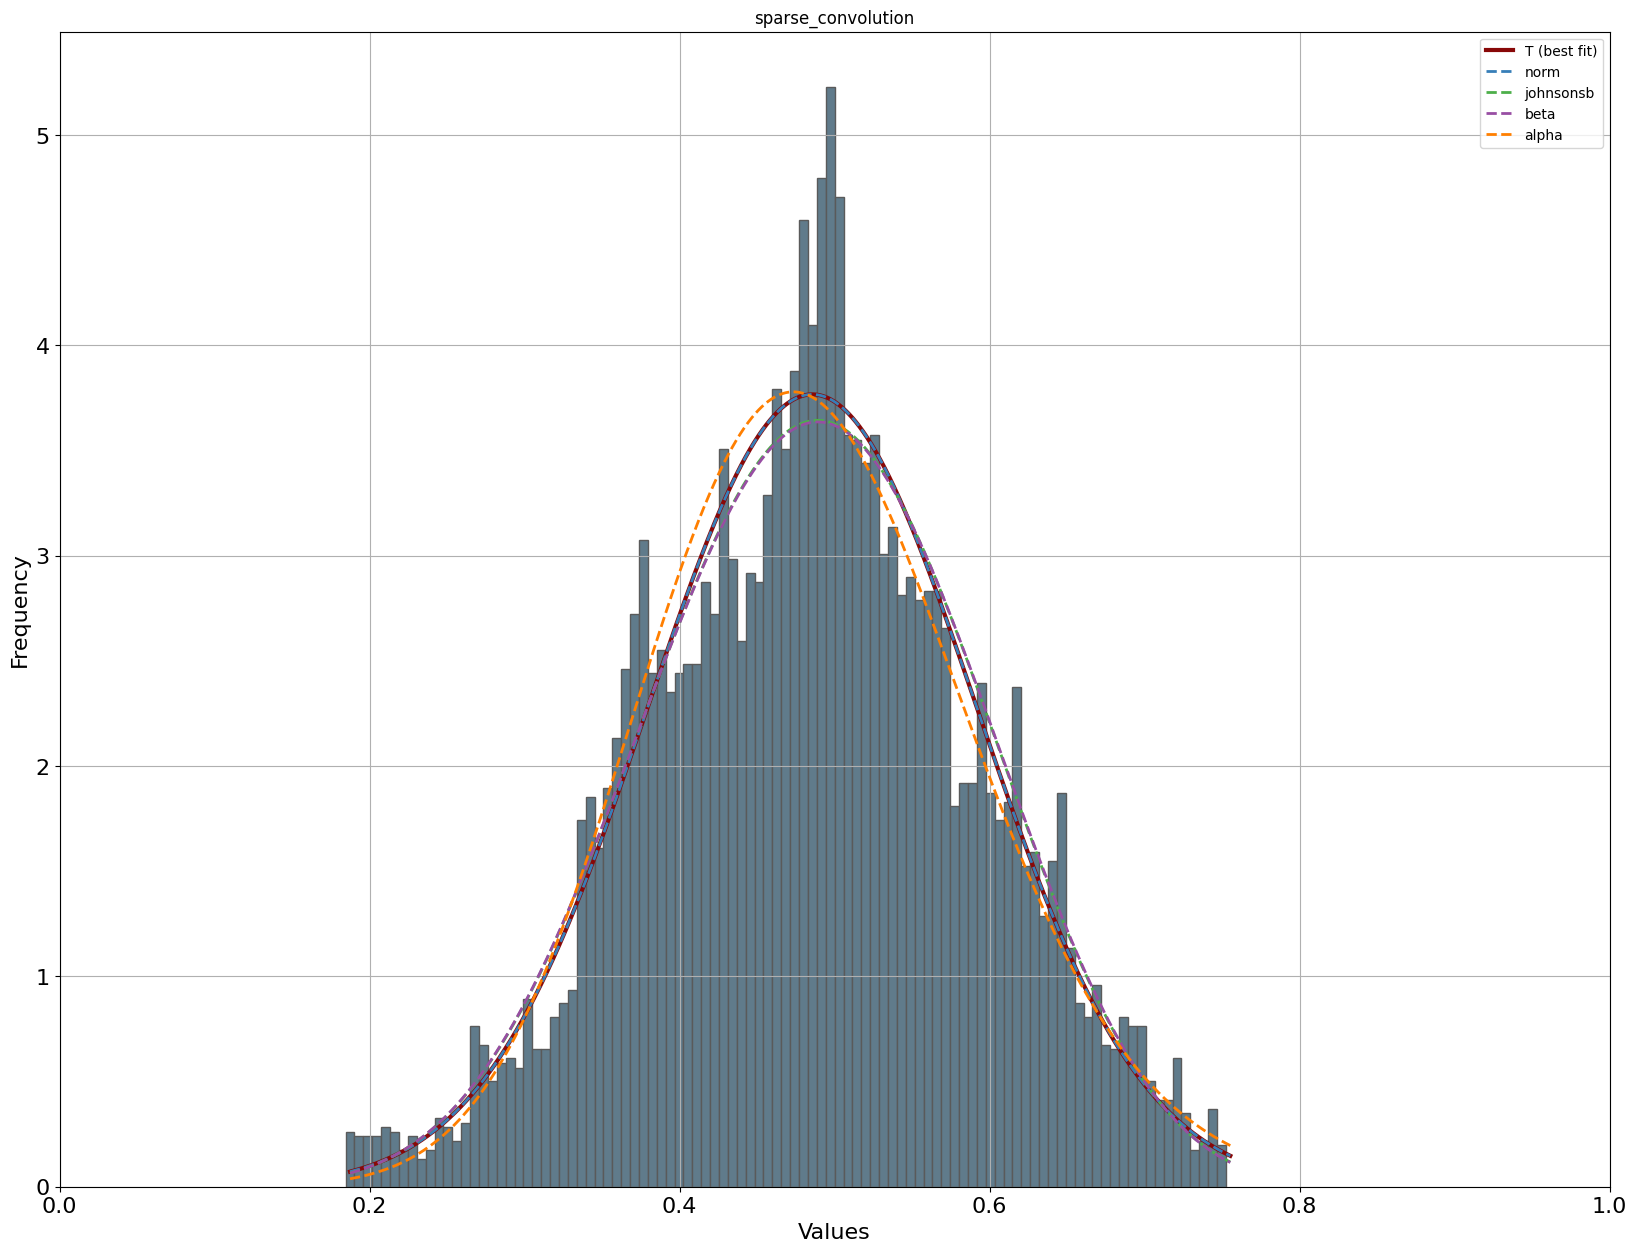

name score    loc     scale                                      arg   
0      alpha 1.899 -2.664    83.250                    (26.455692797973143,)  \
1       beta 1.930 -1.570 29779.962    (301.090035084186, 4359668.467825284)   
2  johnsonsb 2.006 -2.264    10.443  (17.60695638447364, 17.101565863716495)   
3       norm 2.341  0.486     0.118                                       ()   
4          t 2.351  0.486     0.117                     (66.98579181220217,)   

                                                                            params   
0                      (26.455692797973143, -2.664385555708675, 83.24974014973168)  \
1   (301.090035084186, 4359668.467825284, -1.5701004506095046, 29779.961960578454)   
2  (17.60695638447364, 17.101565863716495, -2.263581686822608, 10.443415874222655)   
3                                       (0.48643591096624733, 0.11840625872073657)   
4                    (66.98579181220217, 0.48628339840823037, 0.11662547431230261)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C29BBE0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64236F70>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F669C4910>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F669B9F40>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65579C40>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

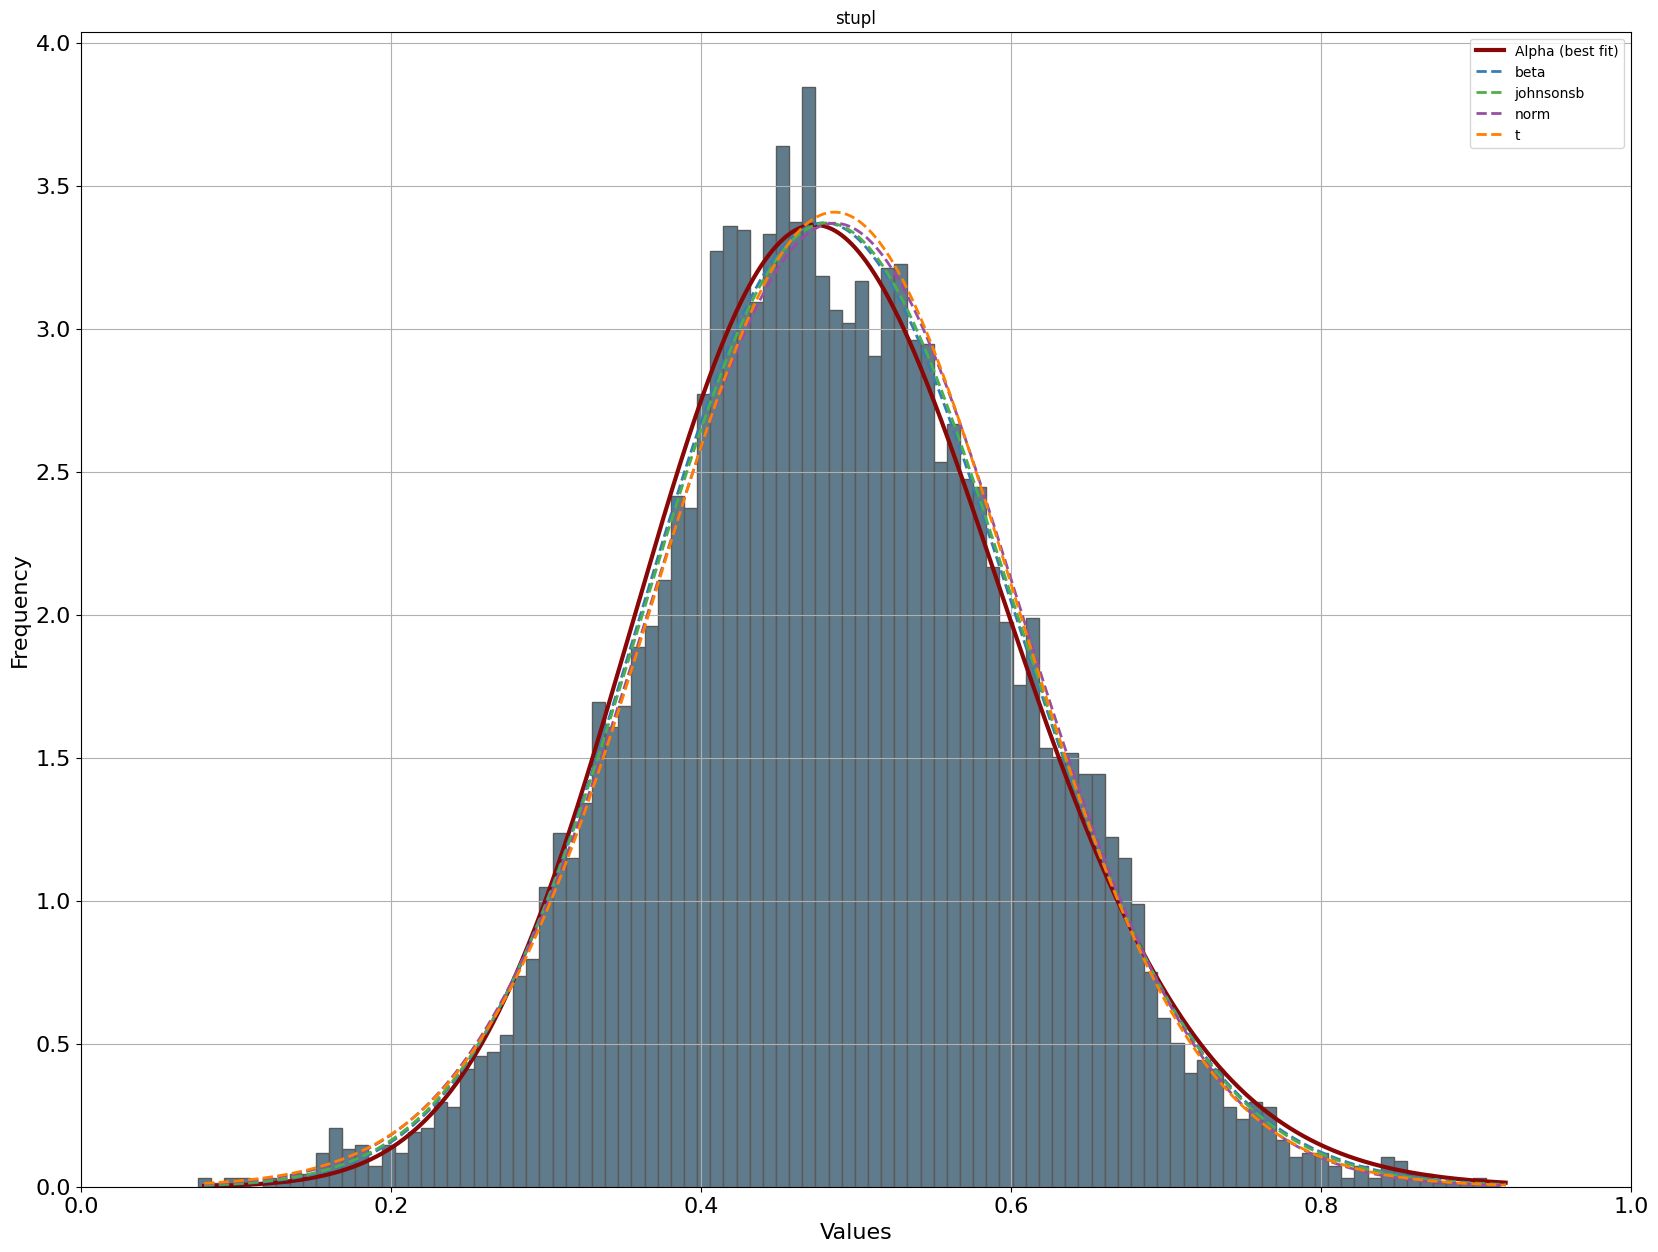

name score    loc    scale                                     arg   
0       beta 4.602 -4.027 1300.413   (2143.912985557199, 615297.310738821)  \
1          t 4.684  0.489    0.095                    (40.27884255274694,)   
2  johnsonsb 4.711 -8.685   35.547  (73.85282311050814, 69.93049393129247)   
3      alpha 4.730 -2.132   70.058                   (26.776401202604575,)   
4       norm 4.835  0.489    0.097                                      ()   

                                                                          params   
0   (2143.912985557199, 615297.310738821, -4.026675905214106, 1300.412567485137)  \
1                    (40.27884255274694, 0.4886030247733846, 0.0948781947429975)   
2  (73.85282311050814, 69.93049393129247, -8.684837896976772, 35.54706465171625)   
3                    (26.776401202604575, -2.1323290363406624, 70.0582479954142)   
4                                     (0.48868790606968104, 0.09732129189780869)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69D4E070>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62BAFF40>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62E67A00>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CFF400>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64236D00>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

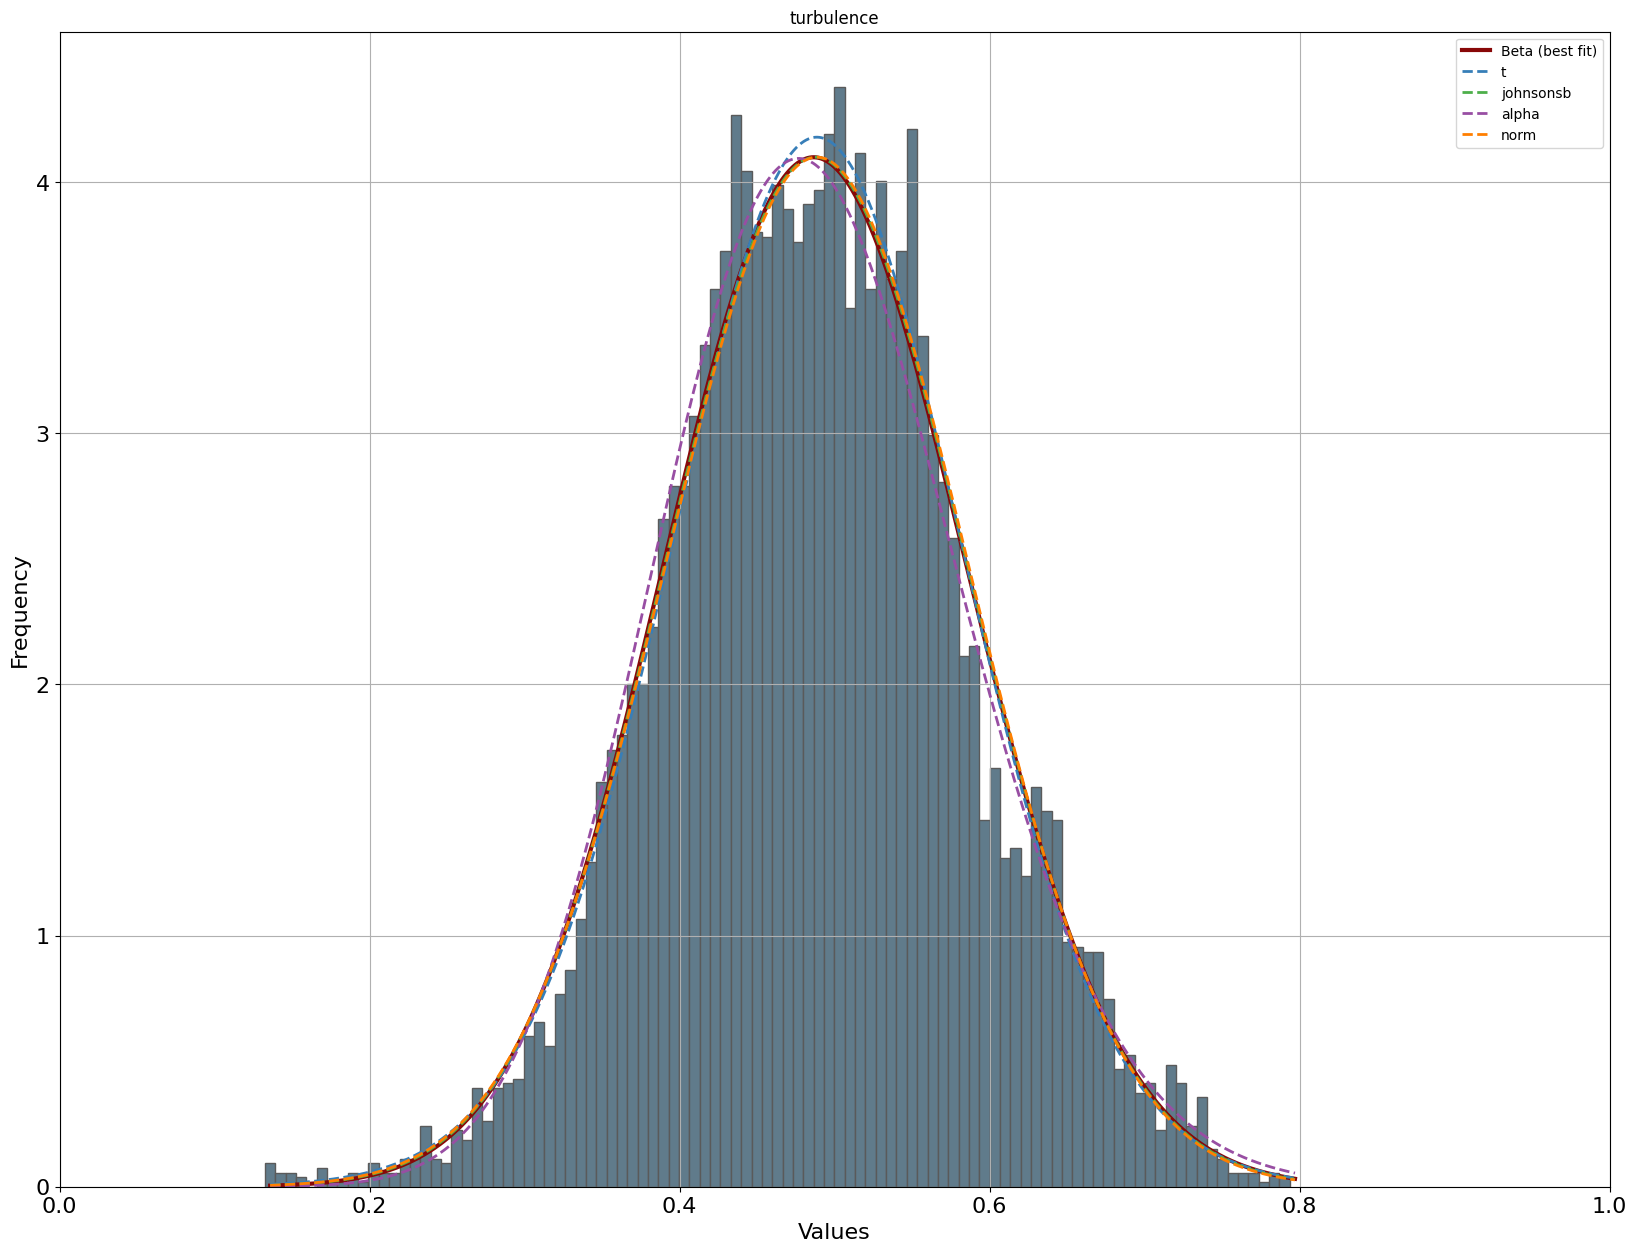

name score    loc  scale                                       arg   
0       beta 6.591 -0.038  1.291    (7.071901587511851, 10.12971935245937)  \
1  johnsonsb 6.614 -0.107  1.401  (0.6685239124896054, 2.2008443611382296)   
2      alpha 6.902 -2.688 67.901                     (21.394144946710078,)   
3       norm 7.137  0.493  0.149                                        ()   
4          t 7.138  0.493  0.149                      (4792491.515474793,)   

                                                                               params   
0    (7.071901587511851, 10.12971935245937, -0.03770947001096444, 1.2908592721434469)  \
1  (0.6685239124896054, 2.2008443611382296, -0.10688412506531256, 1.4011763277641616)   
2                        (21.394144946710078, -2.6880521692988877, 67.90097769252287)   
3                                            (0.4929334208006039, 0.1489866888858597)   
4                         (4792491.515474793, 0.49293810914783587, 0.148986298614514)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62BBF3A0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69D3BDC0>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CFFBE0>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62F7C610>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64B5E550>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

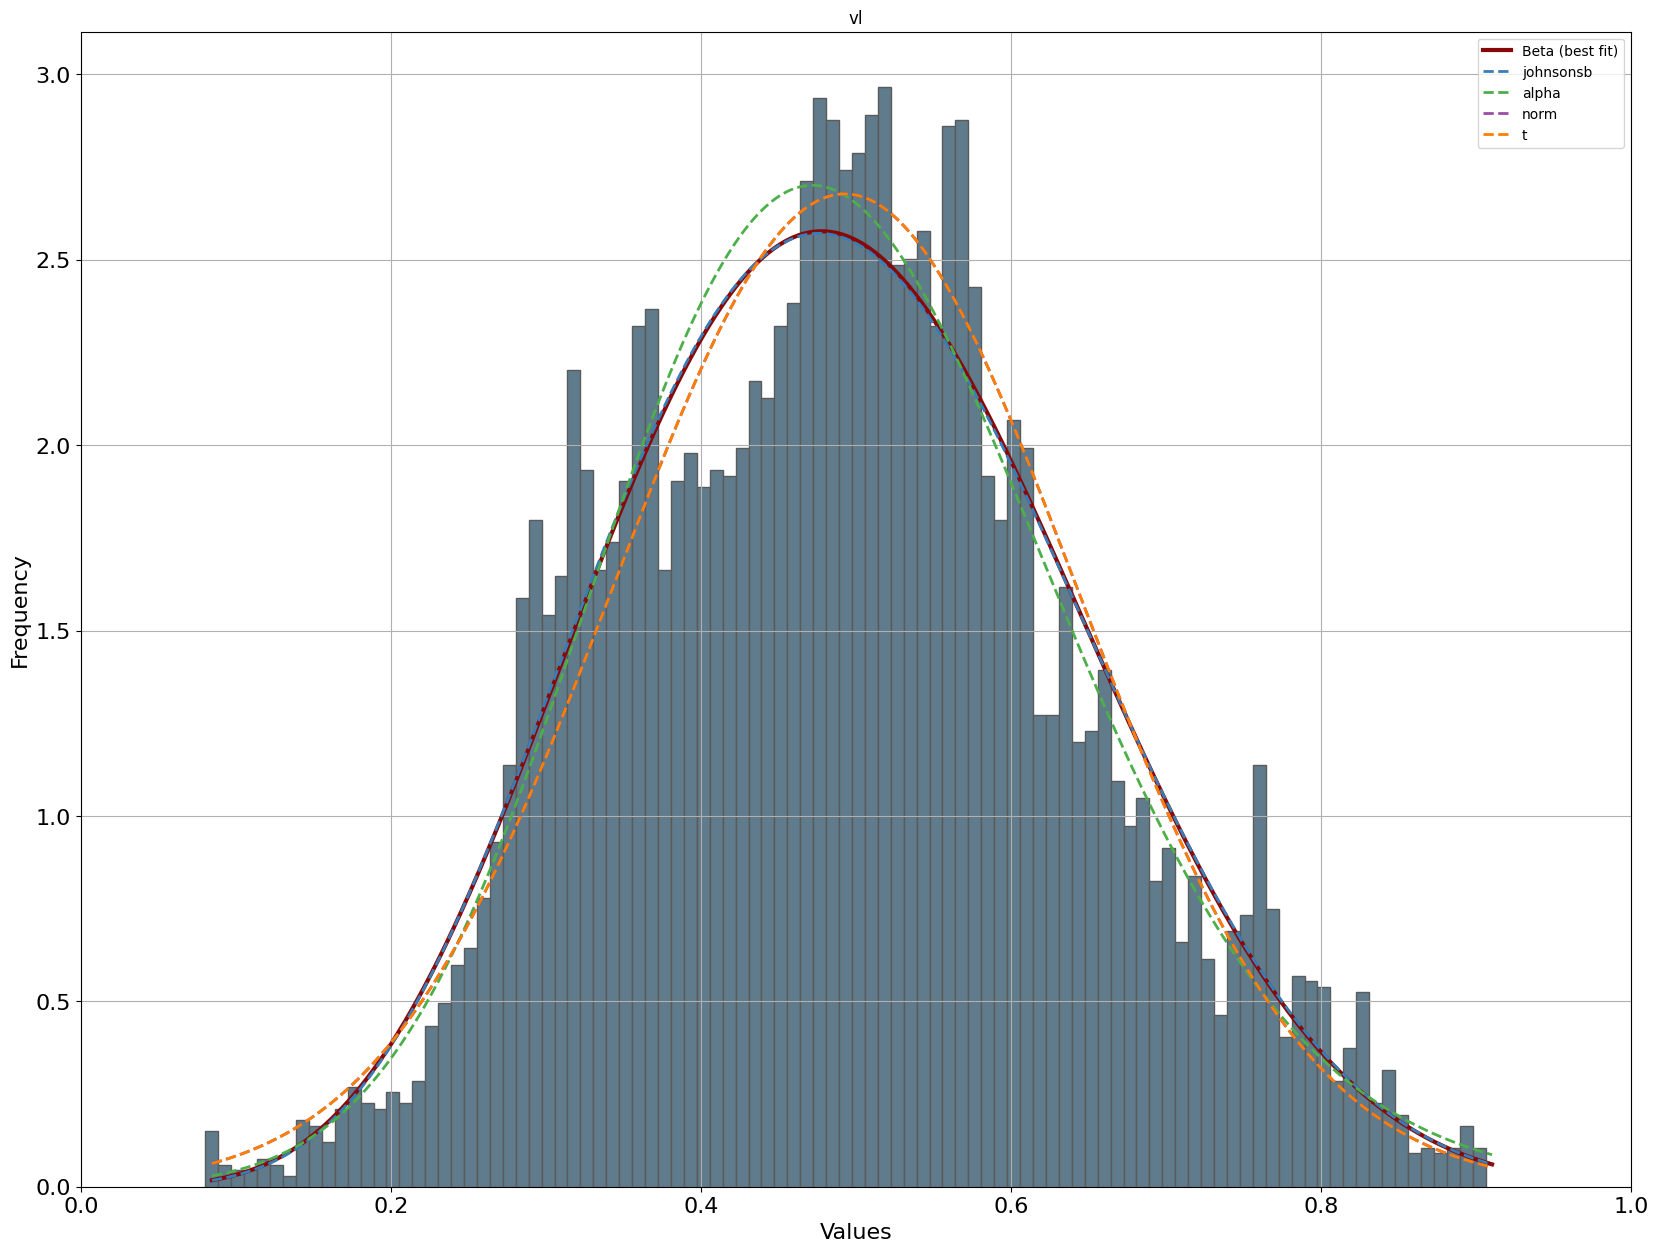

name score    loc   scale                                       arg   
0       norm 3.486  0.576   0.149                                        ()  \
1          t 3.486  0.576   0.149                     (1730361.5773027223,)   
2  johnsonsb 4.168 -0.515   1.908   (-0.911614792491916, 3.059200362616769)   
3       beta 4.249 -0.369   1.609  (16.014910387150657, 11.226076860117328)   
4      alpha 4.535 -3.440 106.918                      (26.65186882308808,)   

                                                                               params   
0                                           (0.5762789124865085, 0.14891612142170302)  \
1                         (1730361.5773027223, 0.576277891971541, 0.1489170284530395)   
2    (-0.911614792491916, 3.059200362616769, -0.5152387409896981, 1.9078757310833379)   
3  (16.014910387150657, 11.226076860117328, -0.36945947301502624, 1.6086894196888373)   
4                        (26.65186882308808, -3.4402416690710815, 106.91826680719512)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F62EFBD00>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68AA6430>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69B40880>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6602FEB0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F68AA9C40>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

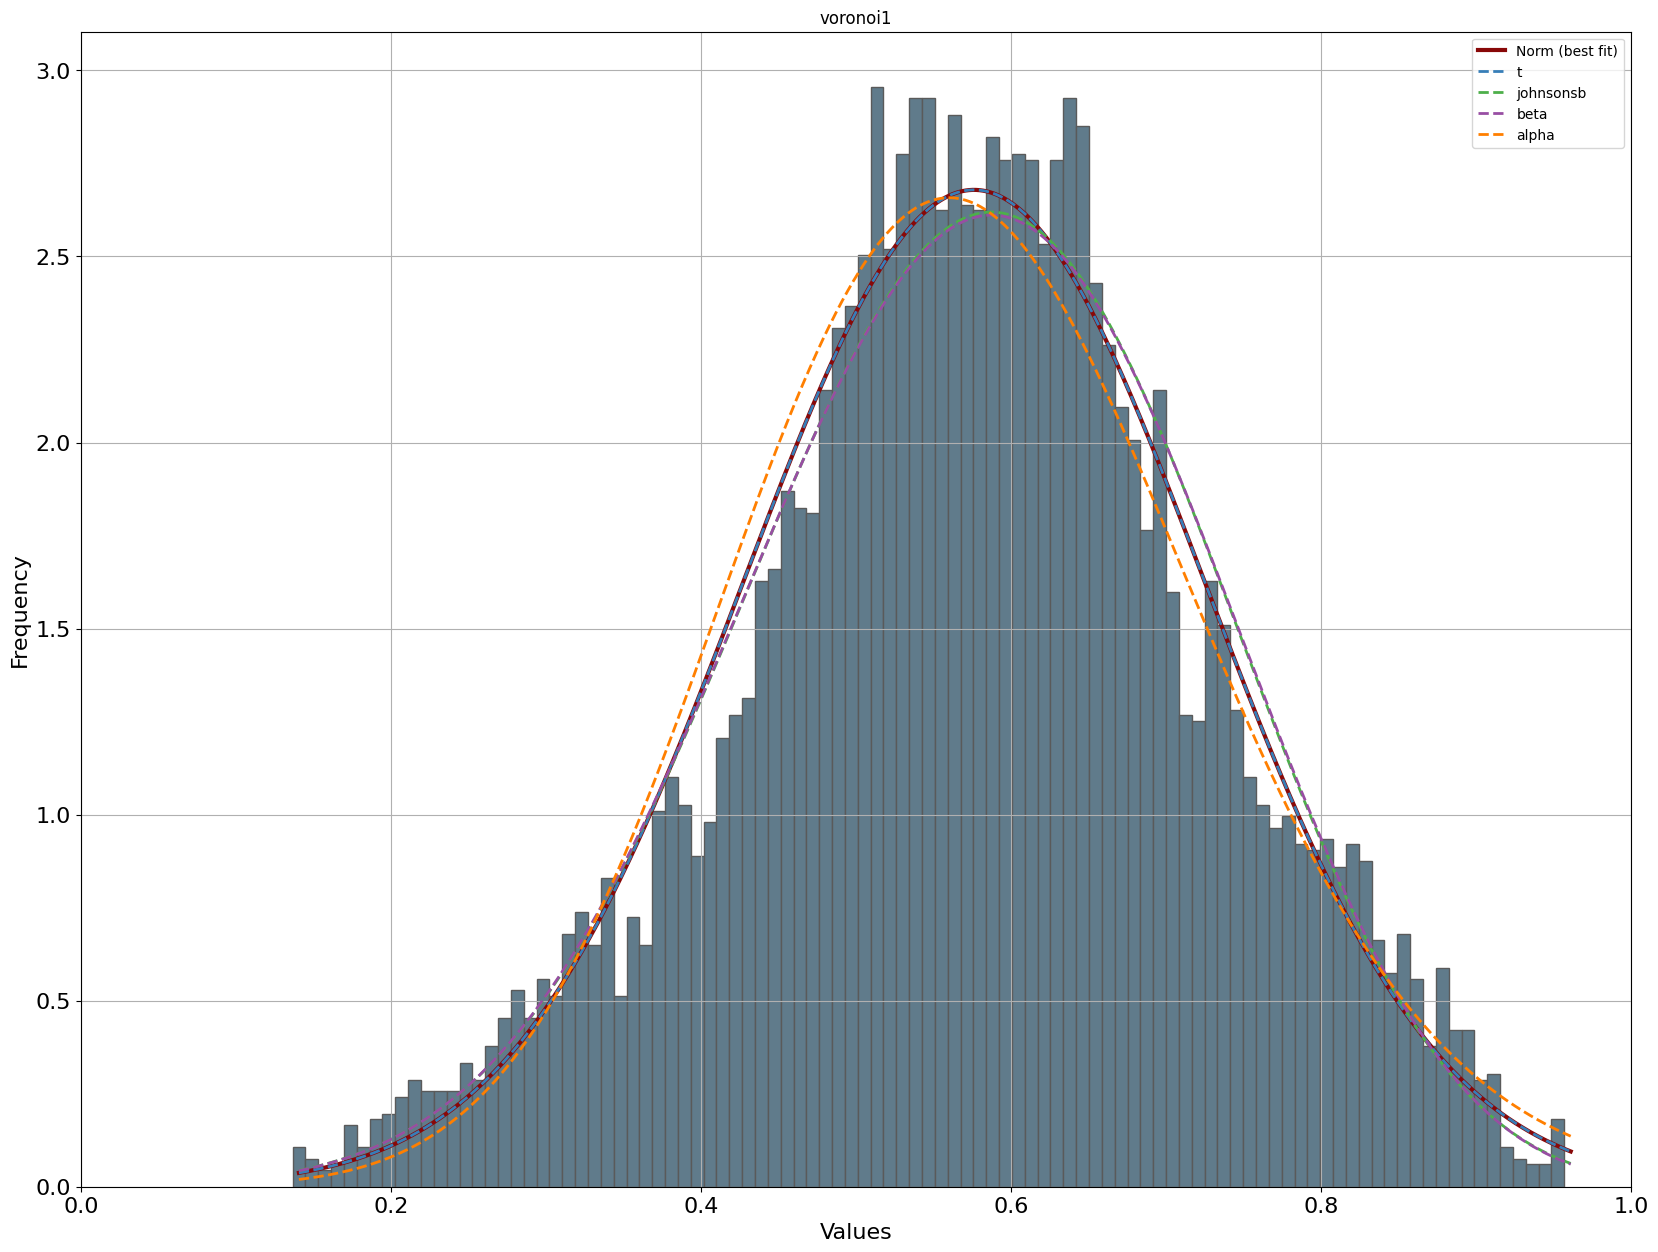

name score    loc  scale                                       arg   
0       norm 5.809  0.716  0.128                                        ()  \
1          t 5.809  0.716  0.128                      (4745679.147539491,)   
2  johnsonsb 6.252 -0.104  1.409  (-0.8878805222568409, 2.593630700335333)   
3       beta 6.311 -0.015  1.209   (12.305659237274664, 8.032541740360514)   
4      alpha 6.829 -2.665 88.045                     (26.094195096612133,)   

                                                                               params   
0                                           (0.7162877441197634, 0.12773520854712178)  \
1                        (4745679.147539491, 0.7162876209695553, 0.12773235415928874)   
2   (-0.8878805222568409, 2.593630700335333, -0.10362934095124594, 1.409098612871737)   
3  (12.305659237274664, 8.032541740360514, -0.015094286371540751, 1.2088954440110917)   
4                         (26.094195096612133, -2.6646008293088945, 88.0449323120468)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F625DD2B0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5B578400>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64AF6340>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64AF63D0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ACFB940>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

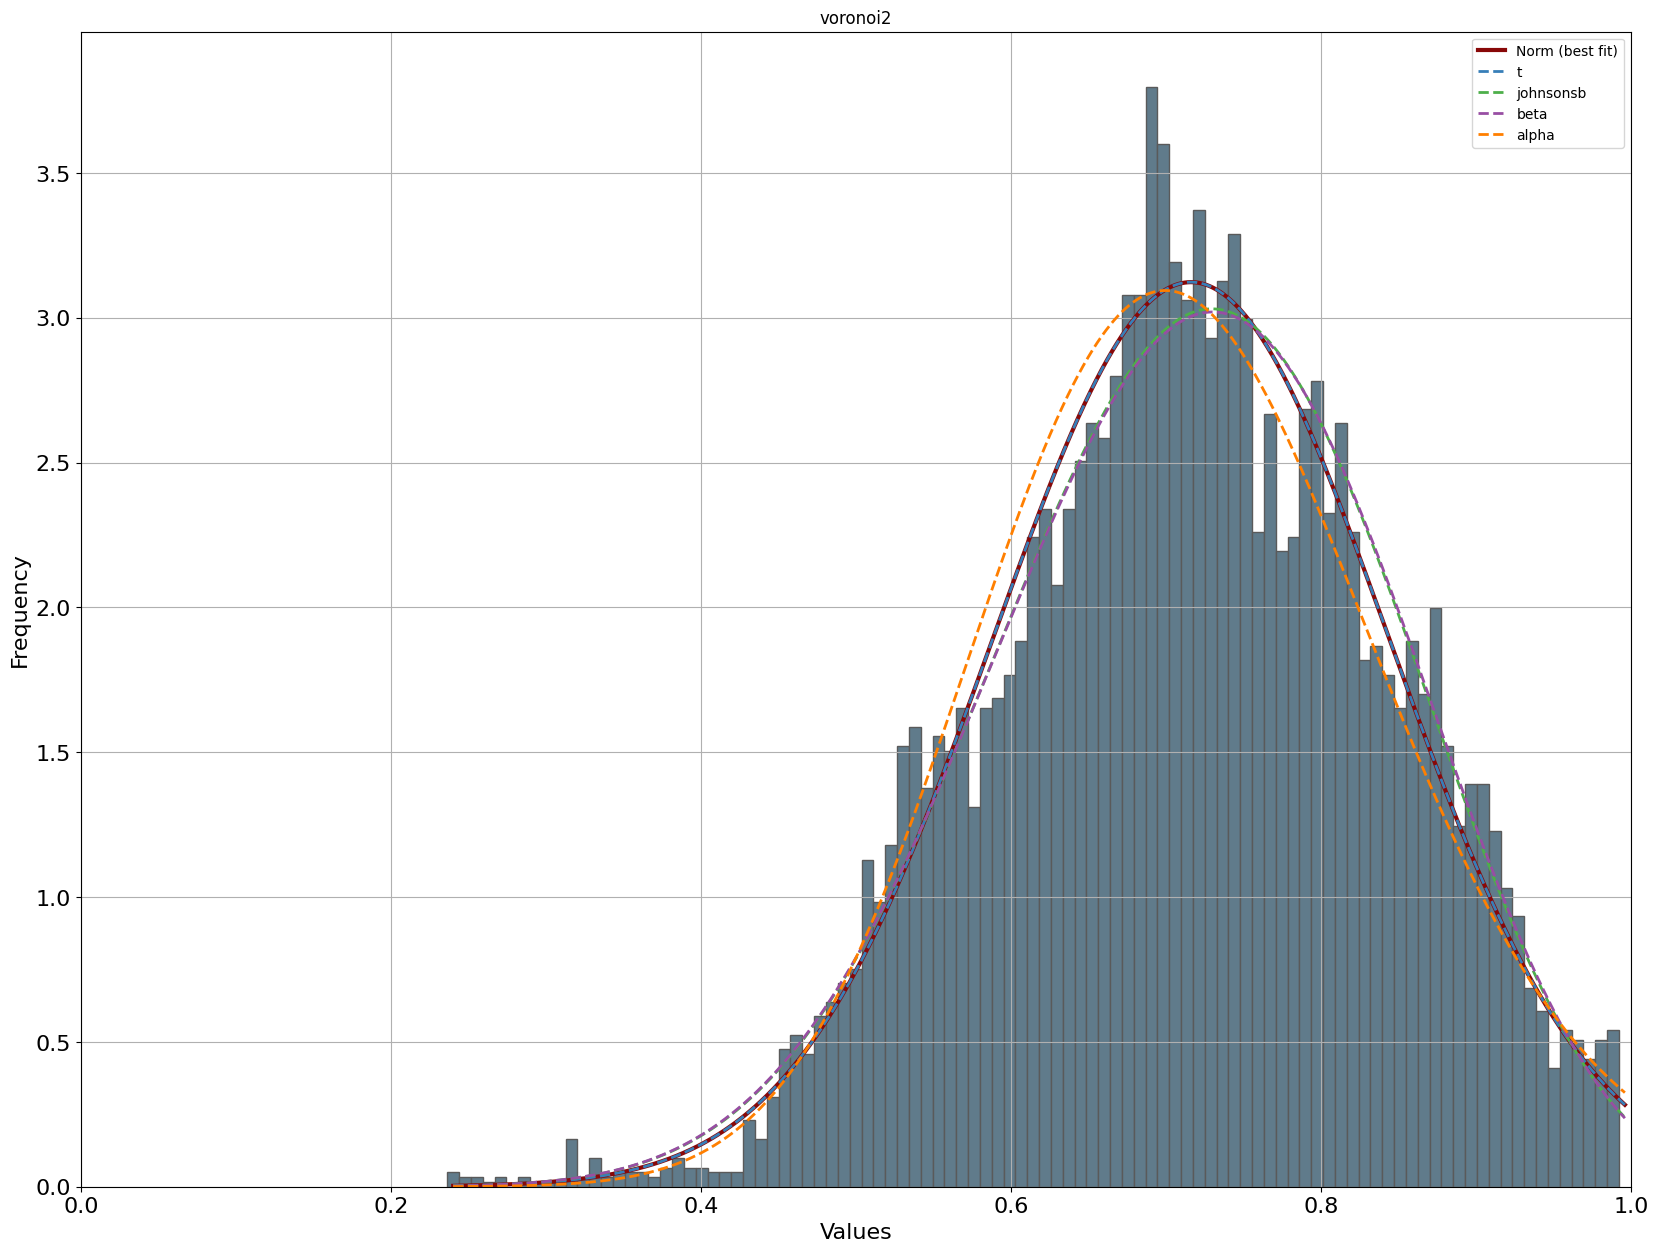

name   score    loc scale                                       arg   
0       beta   9.841  0.001 1.456  (1.1001119558088774, 10.372159729828768)  \
1  johnsonsb  17.902 -0.002 0.799  (1.5668394257332237, 0.8062251366894267)   
2      alpha  45.244 -0.168 0.835                     (3.0679695303573316,)   
3          t  87.179  0.116 0.090                      (4.038230932029943,)   
4       norm 107.672  0.140 0.122                                        ()   

                                                                                 params   
0   (1.1001119558088774, 10.372159729828768, 0.0005636760723664259, 1.4564951549361842)  \
1  (1.5668394257332237, 0.8062251366894267, -0.0018624209032840422, 0.7989163134394399)   
2                        (3.0679695303573316, -0.16827529626136853, 0.8353440192388257)   
3                         (4.038230932029943, 0.11648697006425657, 0.09022870777309466)   
4                                             (0.1401775061628141, 0.12226055460147113)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5A90B4C0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5AFBF280>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69C43490>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F6276ED60>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F69C66D90>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

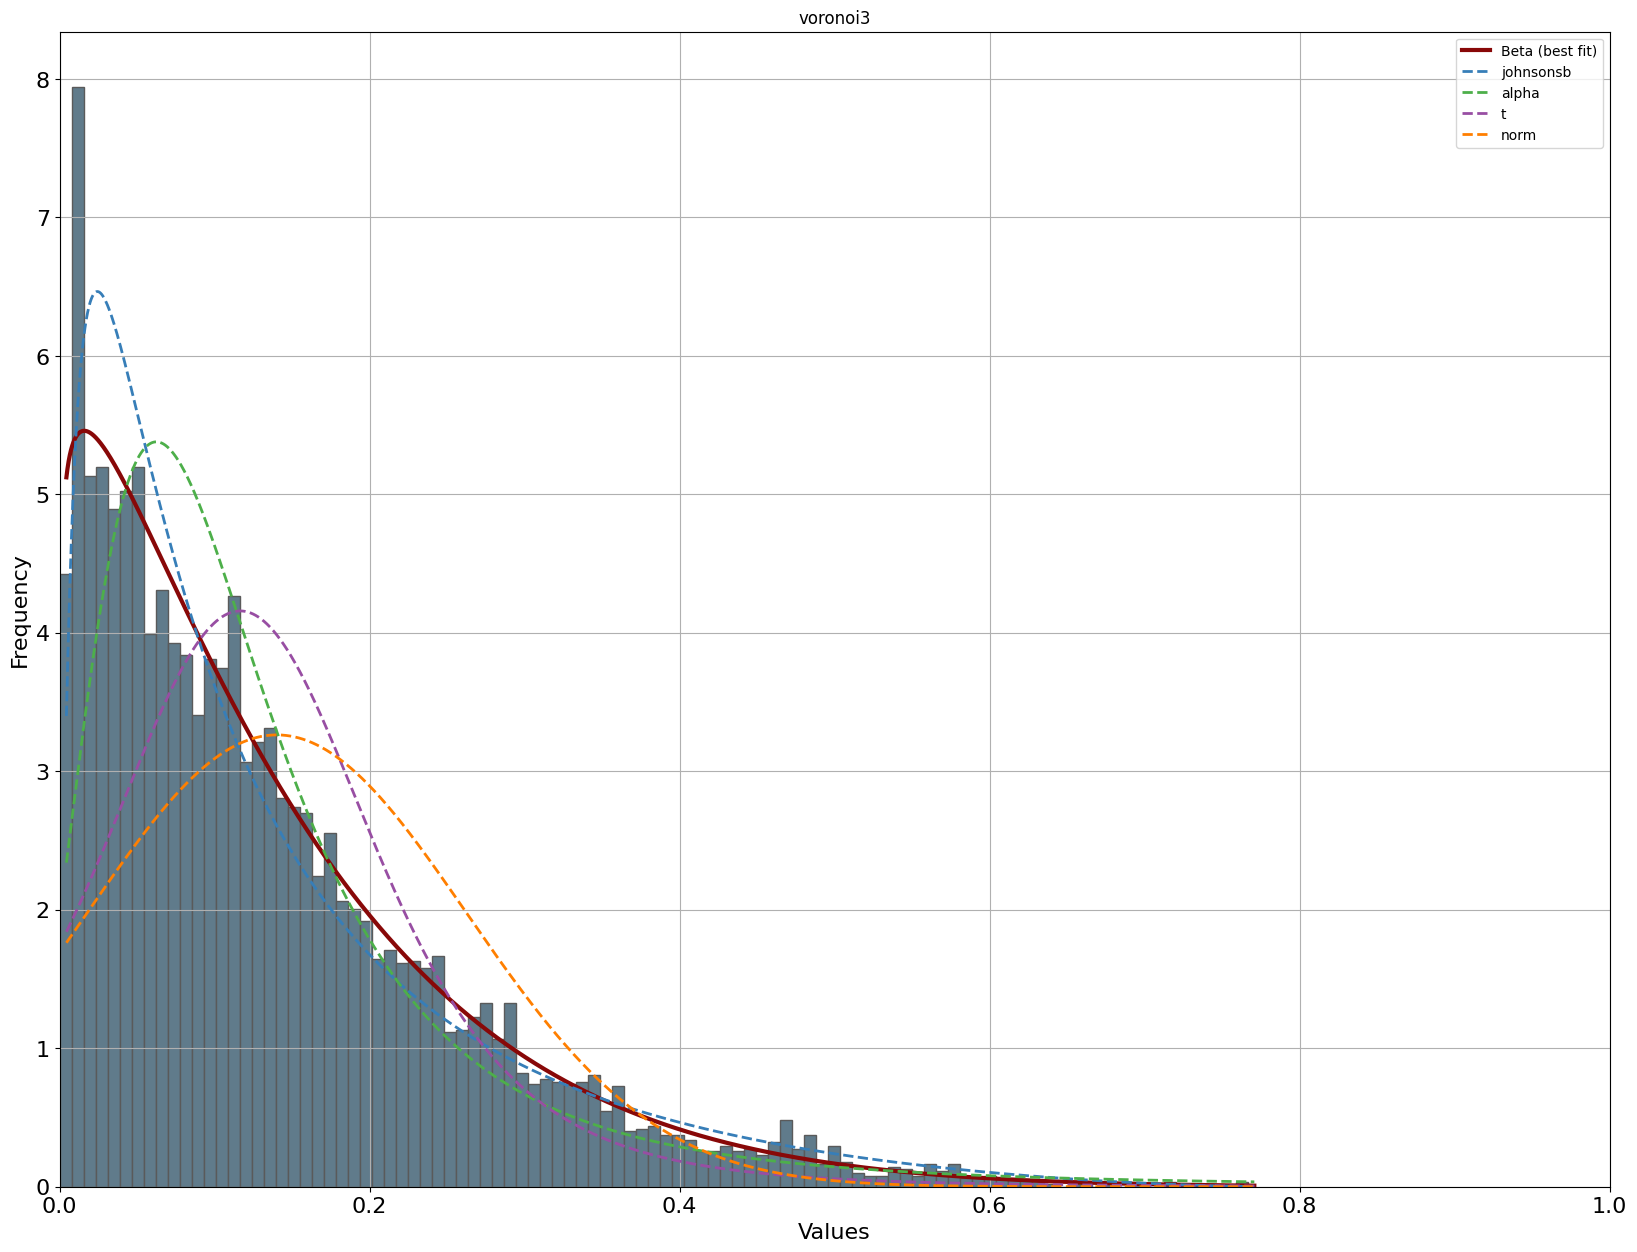

name score    loc  scale                                      arg   
0          t 4.863  0.462  0.134                    (1812767.9625113686,)  \
1       norm 4.863  0.462  0.134                                       ()   
2  johnsonsb 5.270 -0.447  1.918  (0.3706648105672333, 3.511954635381815)   
3       beta 5.276 -0.318  1.665  (17.66778911951687, 20.012526916337826)   
4      alpha 5.595 -2.578 68.638                    (22.625484490254166,)   

                                                                              params   
0                      (1812767.9625113686, 0.4623845811860575, 0.13356111869959533)  \
1                                          (0.4623867058127653, 0.13356149145555107)   
2  (0.3706648105672333, 3.511954635381815, -0.44720032468648385, 1.9183564593148628)   
3      (17.66778911951687, 20.012526916337826, -0.318143694253235, 1.66465945915665)   
4                        (22.625484490254166, -2.578114751851711, 68.63796850037369)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F689512B0>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F655F8E50>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5B2BEC70>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F626D4DC0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F626D4E80>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

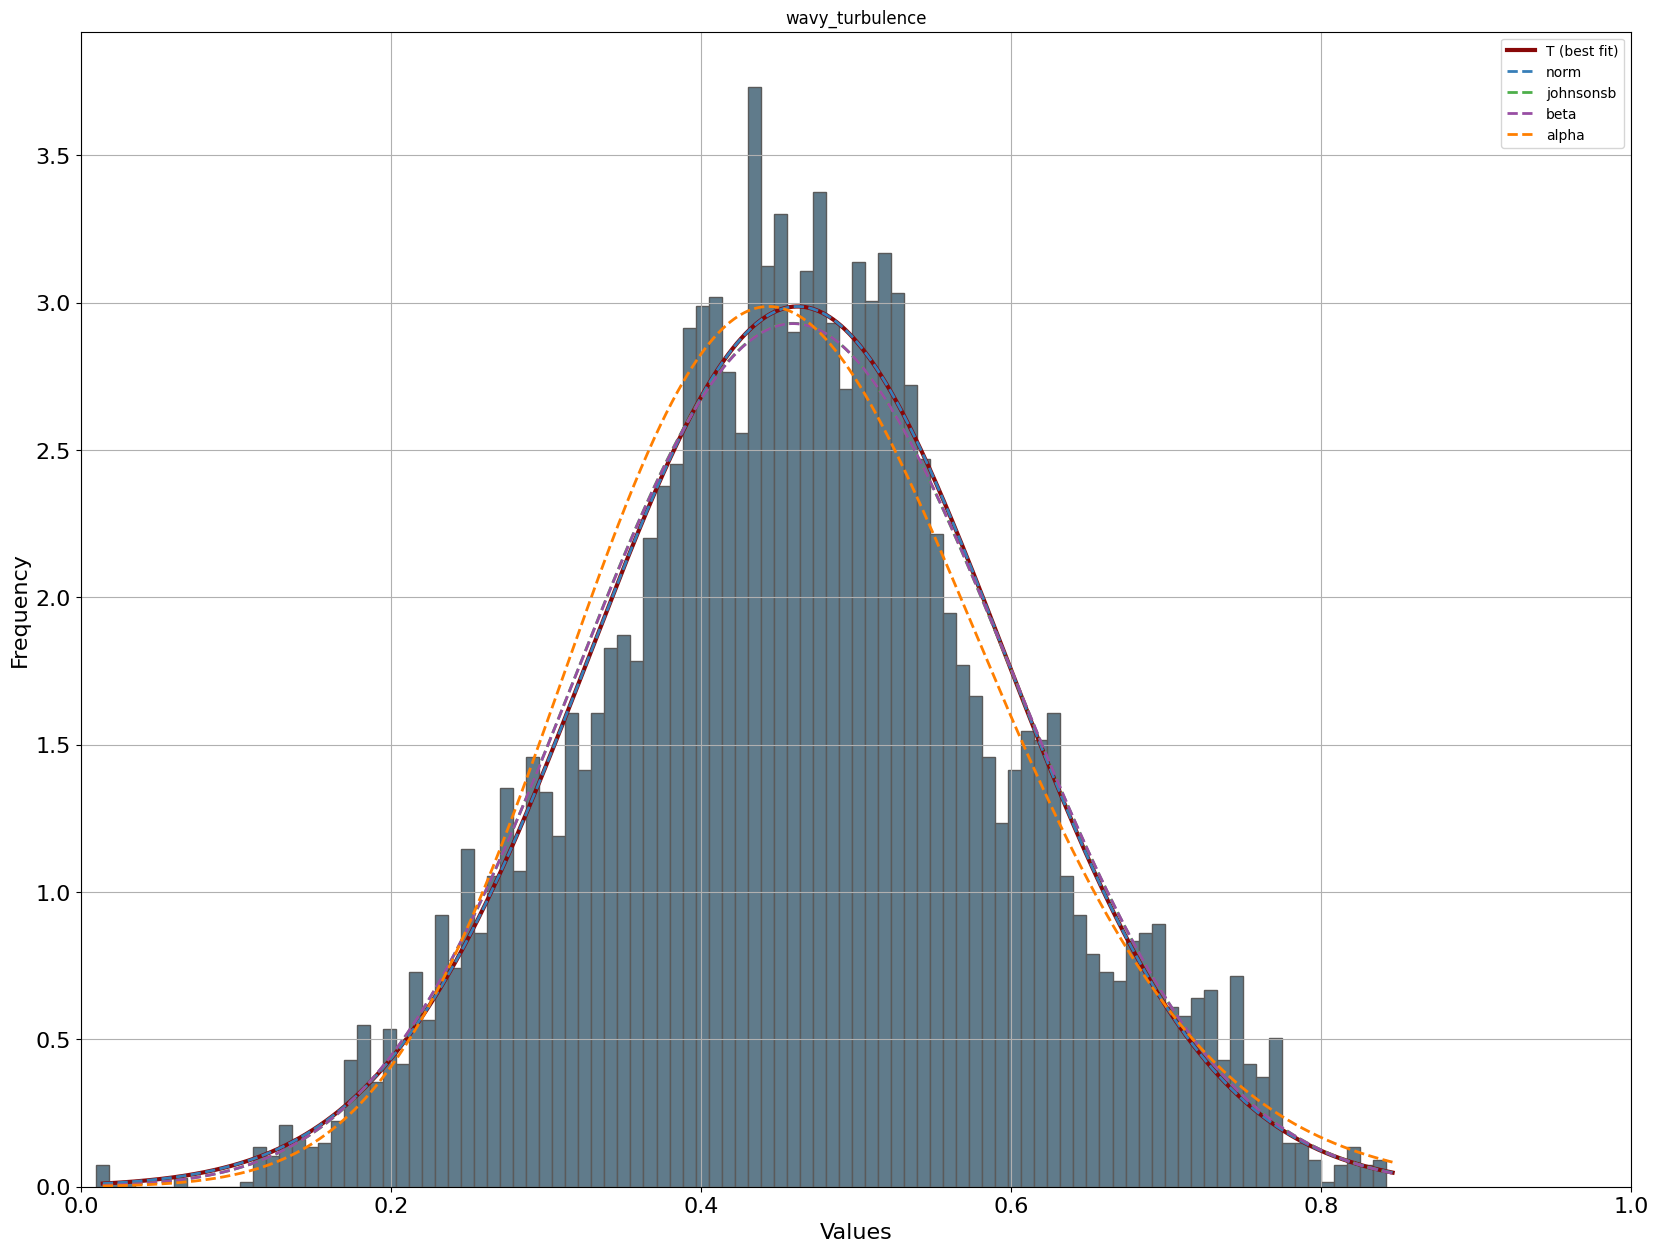

name  score     loc   scale   
0          t 34.161   0.616   0.100  \
1  johnsonsb 54.145 -11.636  14.377   
2       norm 54.175   0.613   0.146   
3      alpha 56.155  -4.931 205.955   
4       beta 60.625  -0.146   1.326   

                                         arg   
0                       (3.201506925235847,)  \
1  (-21.827777584058538, 12.457832880600439)   
2                                         ()   
3                       (37.17196019393802,)   
4     (10.32647002108886, 7.726704417759268)   

                                                                              params   
0                        (3.201506925235847, 0.6156255216060473, 0.1004026622852657)  \
1  (-21.827777584058538, 12.457832880600439, -11.63580696728118, 14.377258330315694)   
2                                           (0.6127413376794139, 0.1460168182607356)   
3                         (37.17196019393802, -4.931403063189176, 205.9545853656499)   
4   (10.32647002108886, 7.726704417759268, -0.14627286924788938, 1.3260473400988333)   

                                                                                   model   
0  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C0C6100>  \
1  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F64CD1070>   
2  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5ADD9670>   
3  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F5C1710A0>   
4  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011F65757400>   

  bootstrap_score bootstrap_pass    color  
0               0           None  #e41a1c  
1               0           None  #377eb8  
2               0           None  #4daf4a  
3               0           None  #984ea3  
4               0           None  #ff7f00

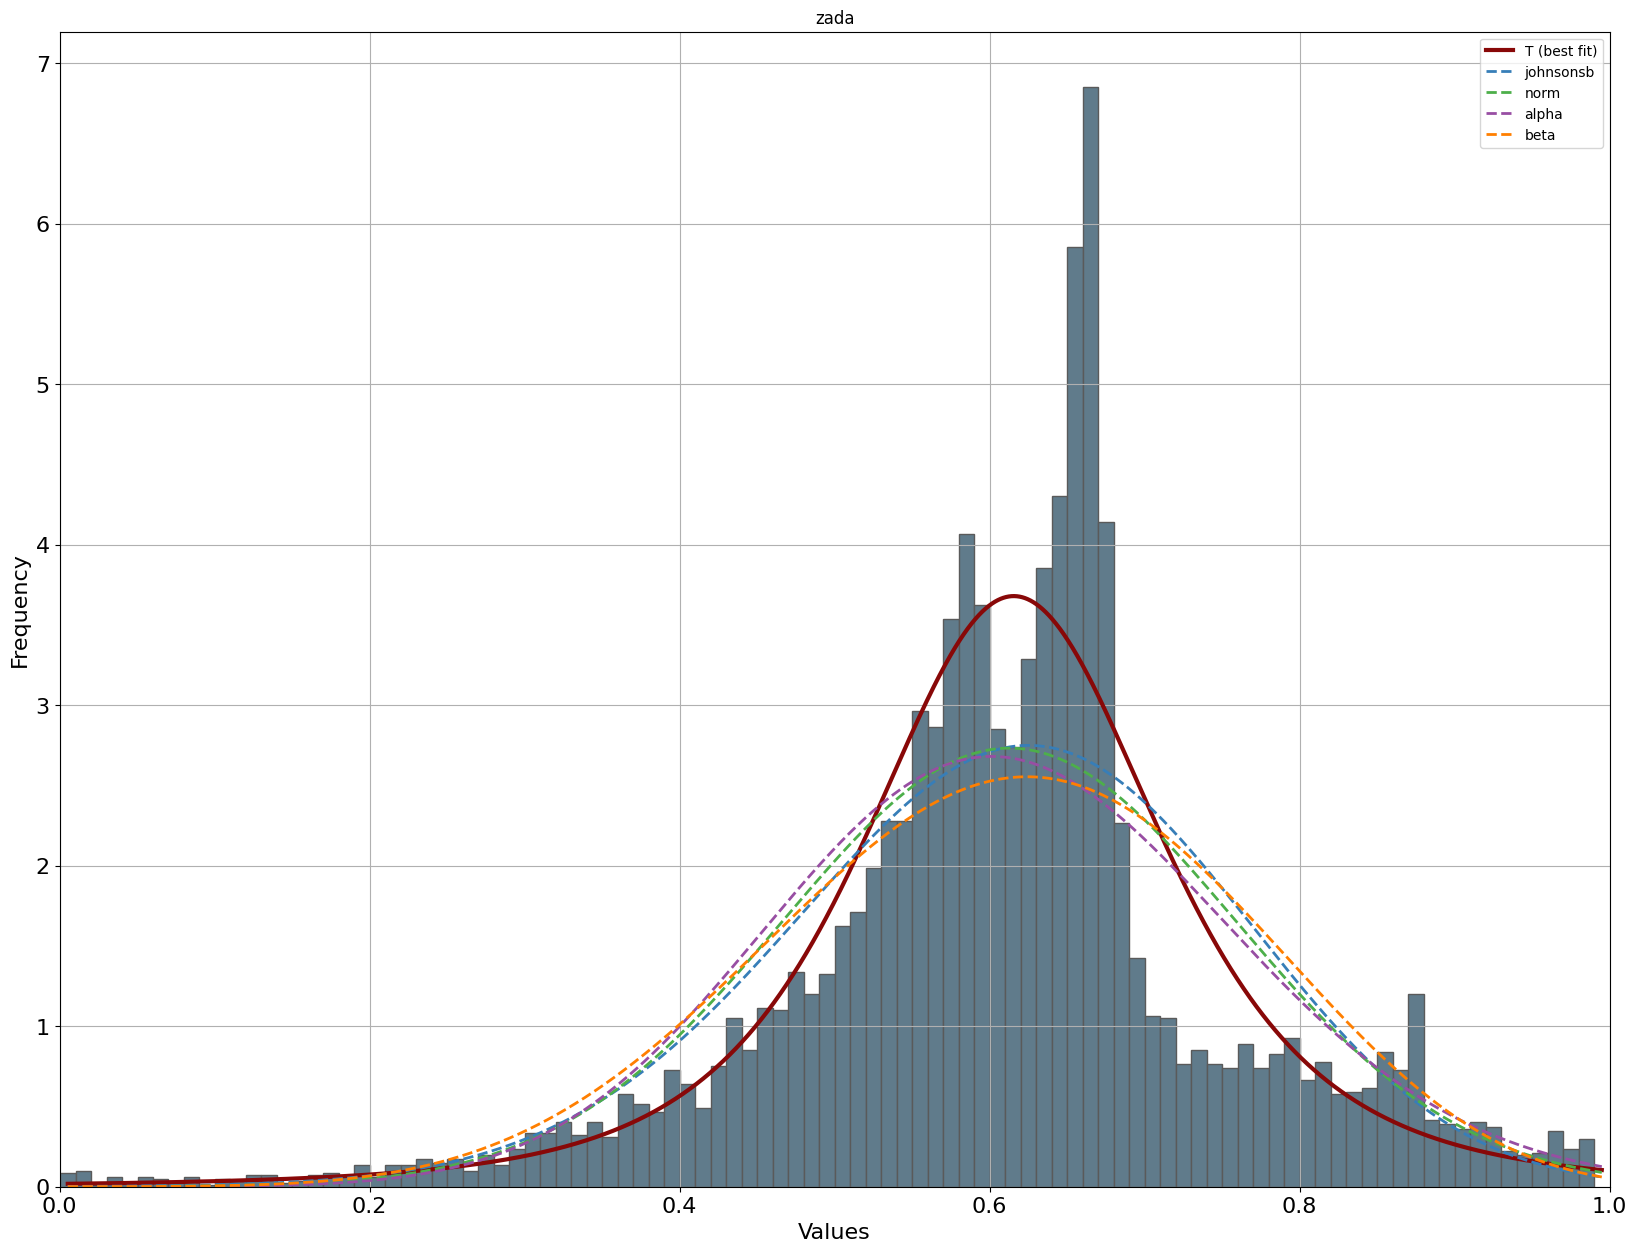

In [42]:
from distfit import distfit
import matplotlib.cm as cm
import matplotlib.colors as colors
# set length of ipython display
pd.set_option('display.max_colwidth', 100)

# get all .exr files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.exr')]

# for each exr file, read the pixel values into a numpy array and create a distribution graph for each
for f in files:
    img = OpenEXR.InputFile(f)
    dw = img.header()['dataWindow']
    size = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    data = img.channel('R', FLOAT)
    data = np.frombuffer(data, dtype=np.float32)
    data = np.reshape(data, size)
    data = data.flatten()
    # split extension from filename
    f = os.path.splitext(f)[0]
    # use only every 100th value to speed up fitting
    fit_data = data[::500]
    # only use gamma, beta and normal distributions
    common_distributions = ['norm', 'beta', 'alpha', 'arcsine', 't', 'johnsonsb']
    distributions = ['alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'gennorm', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'levy', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']
    if noise_types[f][0] != None:
        dist = distfit(distr=common_distributions, bins=100)
    else:
        continue
    result = dist.fit_transform(fit_data, verbose='warning')
    # change colors to cmap plasma, but it repeats every 12th color as hex code
    cmap = cm.get_cmap('Set1')
    hex_colors = [colors.rgb2hex(cmap(i)[:3]) for i in np.linspace(0, 1, 10)]
    colors_list = hex_colors * (len(dist.summary) // 10 + 1)
    dist.summary['color'] = colors_list[:len(dist.summary)]

    # summary of 10 best fits, but dont truncate the display
    display(result['summary'].head(5))
    # display(result['model']['params'])
    dist.plot(chart='pdf', n_top = 4, cii_properties=None, emp_properties=None)
    # plt.hist(data, bins=100, density=True)
    # keep plot range between 0 and 1
    plt.xlim(0, 1)
    # plt.show()
    # print mean and standard deviation
    plt.title(f)
    plt.show()

In [ ]:
# get all .exr files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.exr')]

# for each exr file, read the pixel values into a numpy array and create a distribution graph for each
for f in files:
    img = OpenEXR.InputFile(f)
    dw = img.header()['dataWindow']
    size = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    data = img.channel('R', FLOAT)
    data = np.frombuffer(data, dtype=np.float32)
    data = np.reshape(data, size)
    data = data.flatten()
    # split extension from filename
    f = os.path.splitext(f)[0]
    plt.hist(data, bins=100, density=True)
    # keep plot range between 0 and 1
    plt.xlim(0, 1)
    # print mean and standard deviation
    plt.title(f)
    plt.show()